<a href="https://colab.research.google.com/github/shiuli-19/Liver-Disease-Prediction-Using-Indian-Patient-Dataset/blob/main/IndianLiverDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the CSV file
df = pd.read_csv('indian_liver_patient.csv')

# Display the first few rows
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [ ]:
print("Dataset Info:")
print(df.info())

print("\nMissing values in the dataset:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

Missing values in the dataset:
Age                           0
Gender  

In [ ]:
# Display column names before standardization
print("Column names before standardization:")
print(df.columns)

# Standardizing column names: removing spaces and making them consistent
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Display column names after standardization
print("\nColumn names after standardization:")
print(df.columns)

Column names before standardization:
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

Column names after standardization:
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [ ]:
# Converting 'Gender' column
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Converting 'Dataset' column to 'Result' for clarity (optional)
# Mapping: 1 -> Disease (keep as 1), 2 -> No disease (convert to 0)
df['Result'] = df['Dataset'].map({1: 1, 2: 0})

# Dropping the original 'Dataset' column if you want to keep only 'Result'
# df = df.drop('Dataset', axis=1)

print(df.head())


   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Result  
0      3.3                        0.90  

#### Handling Missing Values
- **Numerical Columns** → Fill with **median** (robust against outliers)
- **Categorical Columns** → Fill with **mode** (most frequent value)
- **Why Median Instead of Mean?**
- Mean is highly sensitive to extreme values (outliers).
- Median is robust to outliers and represents the central tendency more accurately for skewed data.

In [ ]:
df.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
Result                        0
dtype: int64

In [ ]:
# Calculate the median of the column
median_value = df['Albumin_and_Globulin_Ratio'].median()

# Fill missing values with the median
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(median_value)

# Check for remaining missing values
print("\nRemaining missing values in the dataset:")
print(df.isnull().sum())



Remaining missing values in the dataset:
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
Result                        0
dtype: int64


#### **Correlations**
- To better understand feature relationships, we analyze the correlations between numeric variables.
- Correlation values range from **-1 to 1**, representing the strength and direction of relationships between two features.

- **Positive correlation**: As one feature increases, the other also increases (e.g., height and weight).
- **Negative correlation**: As one feature increases, the other decreases (e.g., screen time and sleep hours).
- **Correlations close to -1 or 1** indicate a **strong relationship**.
- **Correlations near 0** suggest a **weak or no relationship** between features.
- **A correlation of exactly 0** means the features are **completely independent** of each other.


In [ ]:
# Check the unique values and their counts in the Dataset column
print(df['Dataset'].value_counts())


Dataset
1    416
2    167
Name: count, dtype: int64


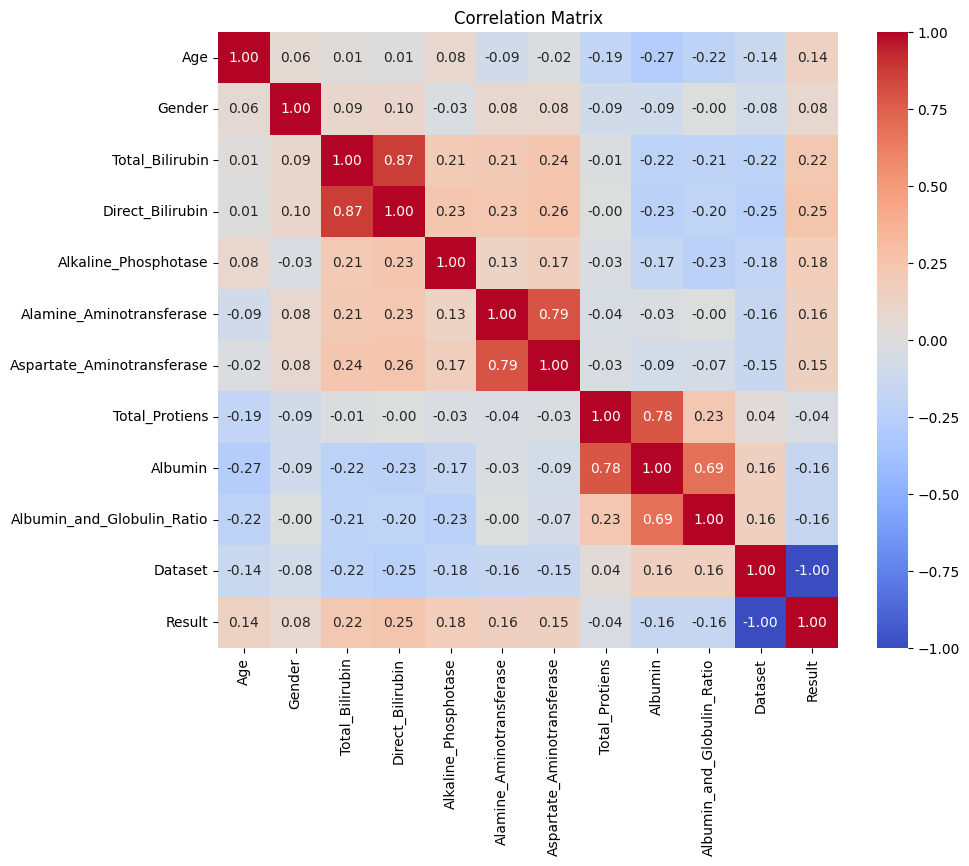


Feature importance based on correlation with target:

Dataset                      -1.000000
Direct_Bilirubin              0.246046
Total_Bilirubin               0.220208
Alkaline_Phosphotase          0.184866
Alamine_Aminotransferase      0.163416
Albumin_and_Globulin_Ratio   -0.162144
Albumin                      -0.161388
Aspartate_Aminotransferase    0.151934
Age                           0.137351
Gender                        0.082416
Total_Protiens               -0.035008
Name: Result, dtype: float64


In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# === Step 1: Correlation Matrix ===
# Calculate correlation (numerical columns only)
corr = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# === Step 2: Feature importance based on correlation with target ===
cor_target = corr['Result'].drop('Result')  # Drop target itself
cor_target_sorted = cor_target.abs().sort_values(ascending=False)

print("\nFeature importance based on correlation with target:\n")
print(cor_target[cor_target_sorted.index])  # Retains sign of correlation


In [ ]:
df = df.drop('Dataset', axis=1)

In [ ]:
# === Step 2: Train-Test Split ===
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Result', axis=1)
y = df['Result']

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()

# Scale training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Scale test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Feature scaling completed.")
print("\nFirst few rows of scaled training data:")
print(X_train_scaled.head())

Feature scaling completed.

First few rows of scaled training data:
        Age    Gender  Total_Bilirubin  Direct_Bilirubin  \
0  0.405461  0.572394        -0.015378         -0.028549   
1  1.343927  0.572394        -0.459492         -0.458969   
2 -0.908393 -1.747047        -0.439305         -0.458969   
3 -0.595571  0.572394        -0.459492         -0.458969   
4 -1.283780 -1.747047        -0.459492         -0.458969   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0              0.744199                 -0.317050                   -0.312615   
1             -0.217817                 -0.291126                   -0.348403   
2             -0.380132                 -0.275571                   -0.205252   
3             -0.380132                 -0.213354                   -0.330509   
4             -0.419721                 -0.374082                   -0.419978   

   Total_Protiens   Albumin  Albumin_and_Globulin_Ratio  
0        0.479071 -0.95533

In [ ]:
"""# === Step 3: Min and Max of Original (Unscaled) Features ===
print("\nMin and Max of Original Features (Train Data):")
print(X_train.describe().loc[['min', 'max']])


# Dictionary of normal medical ranges (update your column names if needed)
normal_ranges = {
    "Total_Bilirubin": (0.30, 1.30),
    "Direct_Bilirubin": (0.10, 0.50),
    "Alkaline_Phosphotase": (107, 361.8),
    "Alamine_Aminotransferase": (10.0, 68.0),
    "Aspartate_Aminotransferase": (13.0, 52.8),
    "Total_Protiens": (6.0, 8.0),
    "Albumin": (3.5, 5.0),
    "Albumin_and_Globulin_Ratio": (1.0, 1.5)
}

print("\nNormal Medical Ranges:")
for feature, (low, high) in normal_ranges.items():
    print(f"{feature}: {low} to {high}")"""


'# === Step 3: Min and Max of Original (Unscaled) Features ===\nprint("\nMin and Max of Original Features (Train Data):")\nprint(X_train.describe().loc[[\'min\', \'max\']])\n\n\n# Dictionary of normal medical ranges (update your column names if needed)\nnormal_ranges = {\n    "Total_Bilirubin": (0.30, 1.30),\n    "Direct_Bilirubin": (0.10, 0.50),\n    "Alkaline_Phosphotase": (107, 361.8),\n    "Alamine_Aminotransferase": (10.0, 68.0),\n    "Aspartate_Aminotransferase": (13.0, 52.8),\n    "Total_Protiens": (6.0, 8.0),\n    "Albumin": (3.5, 5.0),\n    "Albumin_and_Globulin_Ratio": (1.0, 1.5)\n}\n\nprint("\nNormal Medical Ranges:")\nfor feature, (low, high) in normal_ranges.items():\n    print(f"{feature}: {low} to {high}")'

In [ ]:
"""print("\nChecking how many samples are outside the normal medical ranges:")

for feature, (low, high) in normal_ranges.items():
    out_of_range_count = ((X_train[feature] < low) | (X_train[feature] > high)).sum()
    print(f"{feature}: {out_of_range_count} samples out of range")"""


'print("\nChecking how many samples are outside the normal medical ranges:")\n\nfor feature, (low, high) in normal_ranges.items():\n    out_of_range_count = ((X_train[feature] < low) | (X_train[feature] > high)).sum()\n    print(f"{feature}: {out_of_range_count} samples out of range")'

In [ ]:
# Display statistical summary of the test dataset (before scaling)
print("\nStatistical summary of the test dataset:")
print(X_test.describe())


Statistical summary of the test dataset:
              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  117.000000  117.000000       117.000000        117.000000   
mean    45.649573    0.769231         4.583761          1.936752   
std     16.963102    0.423137         9.632899          3.616643   
min      8.000000    0.000000         0.600000          0.100000   
25%     32.000000    1.000000         0.800000          0.200000   
50%     46.000000    1.000000         1.000000          0.300000   
75%     60.000000    1.000000         2.900000          1.500000   
max     78.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            117.000000                117.000000   
mean             276.863248                 71.008547   
std              198.893140                133.289903   
min               63.000000                 12.000000   
25%              175.000000                 24.000000   
50%

In [ ]:
print(X_train.describe())


              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  466.000000  466.000000       466.000000        466.000000   
mean    44.519313    0.753219         2.976180          1.372961   
std     16.000694    0.431602         4.959016          2.558393   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    1.000000         0.800000          0.200000   
50%     45.000000    1.000000         1.000000          0.300000   
75%     57.000000    1.000000         2.600000          1.275000   
max     90.000000    1.000000        30.500000         17.100000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            466.000000                466.000000   
mean             294.019313                 83.150215   
std              252.866027                193.080002   
min               75.000000                 10.000000   
25%              176.250000                 23.000000   
50%              208.500000                 3

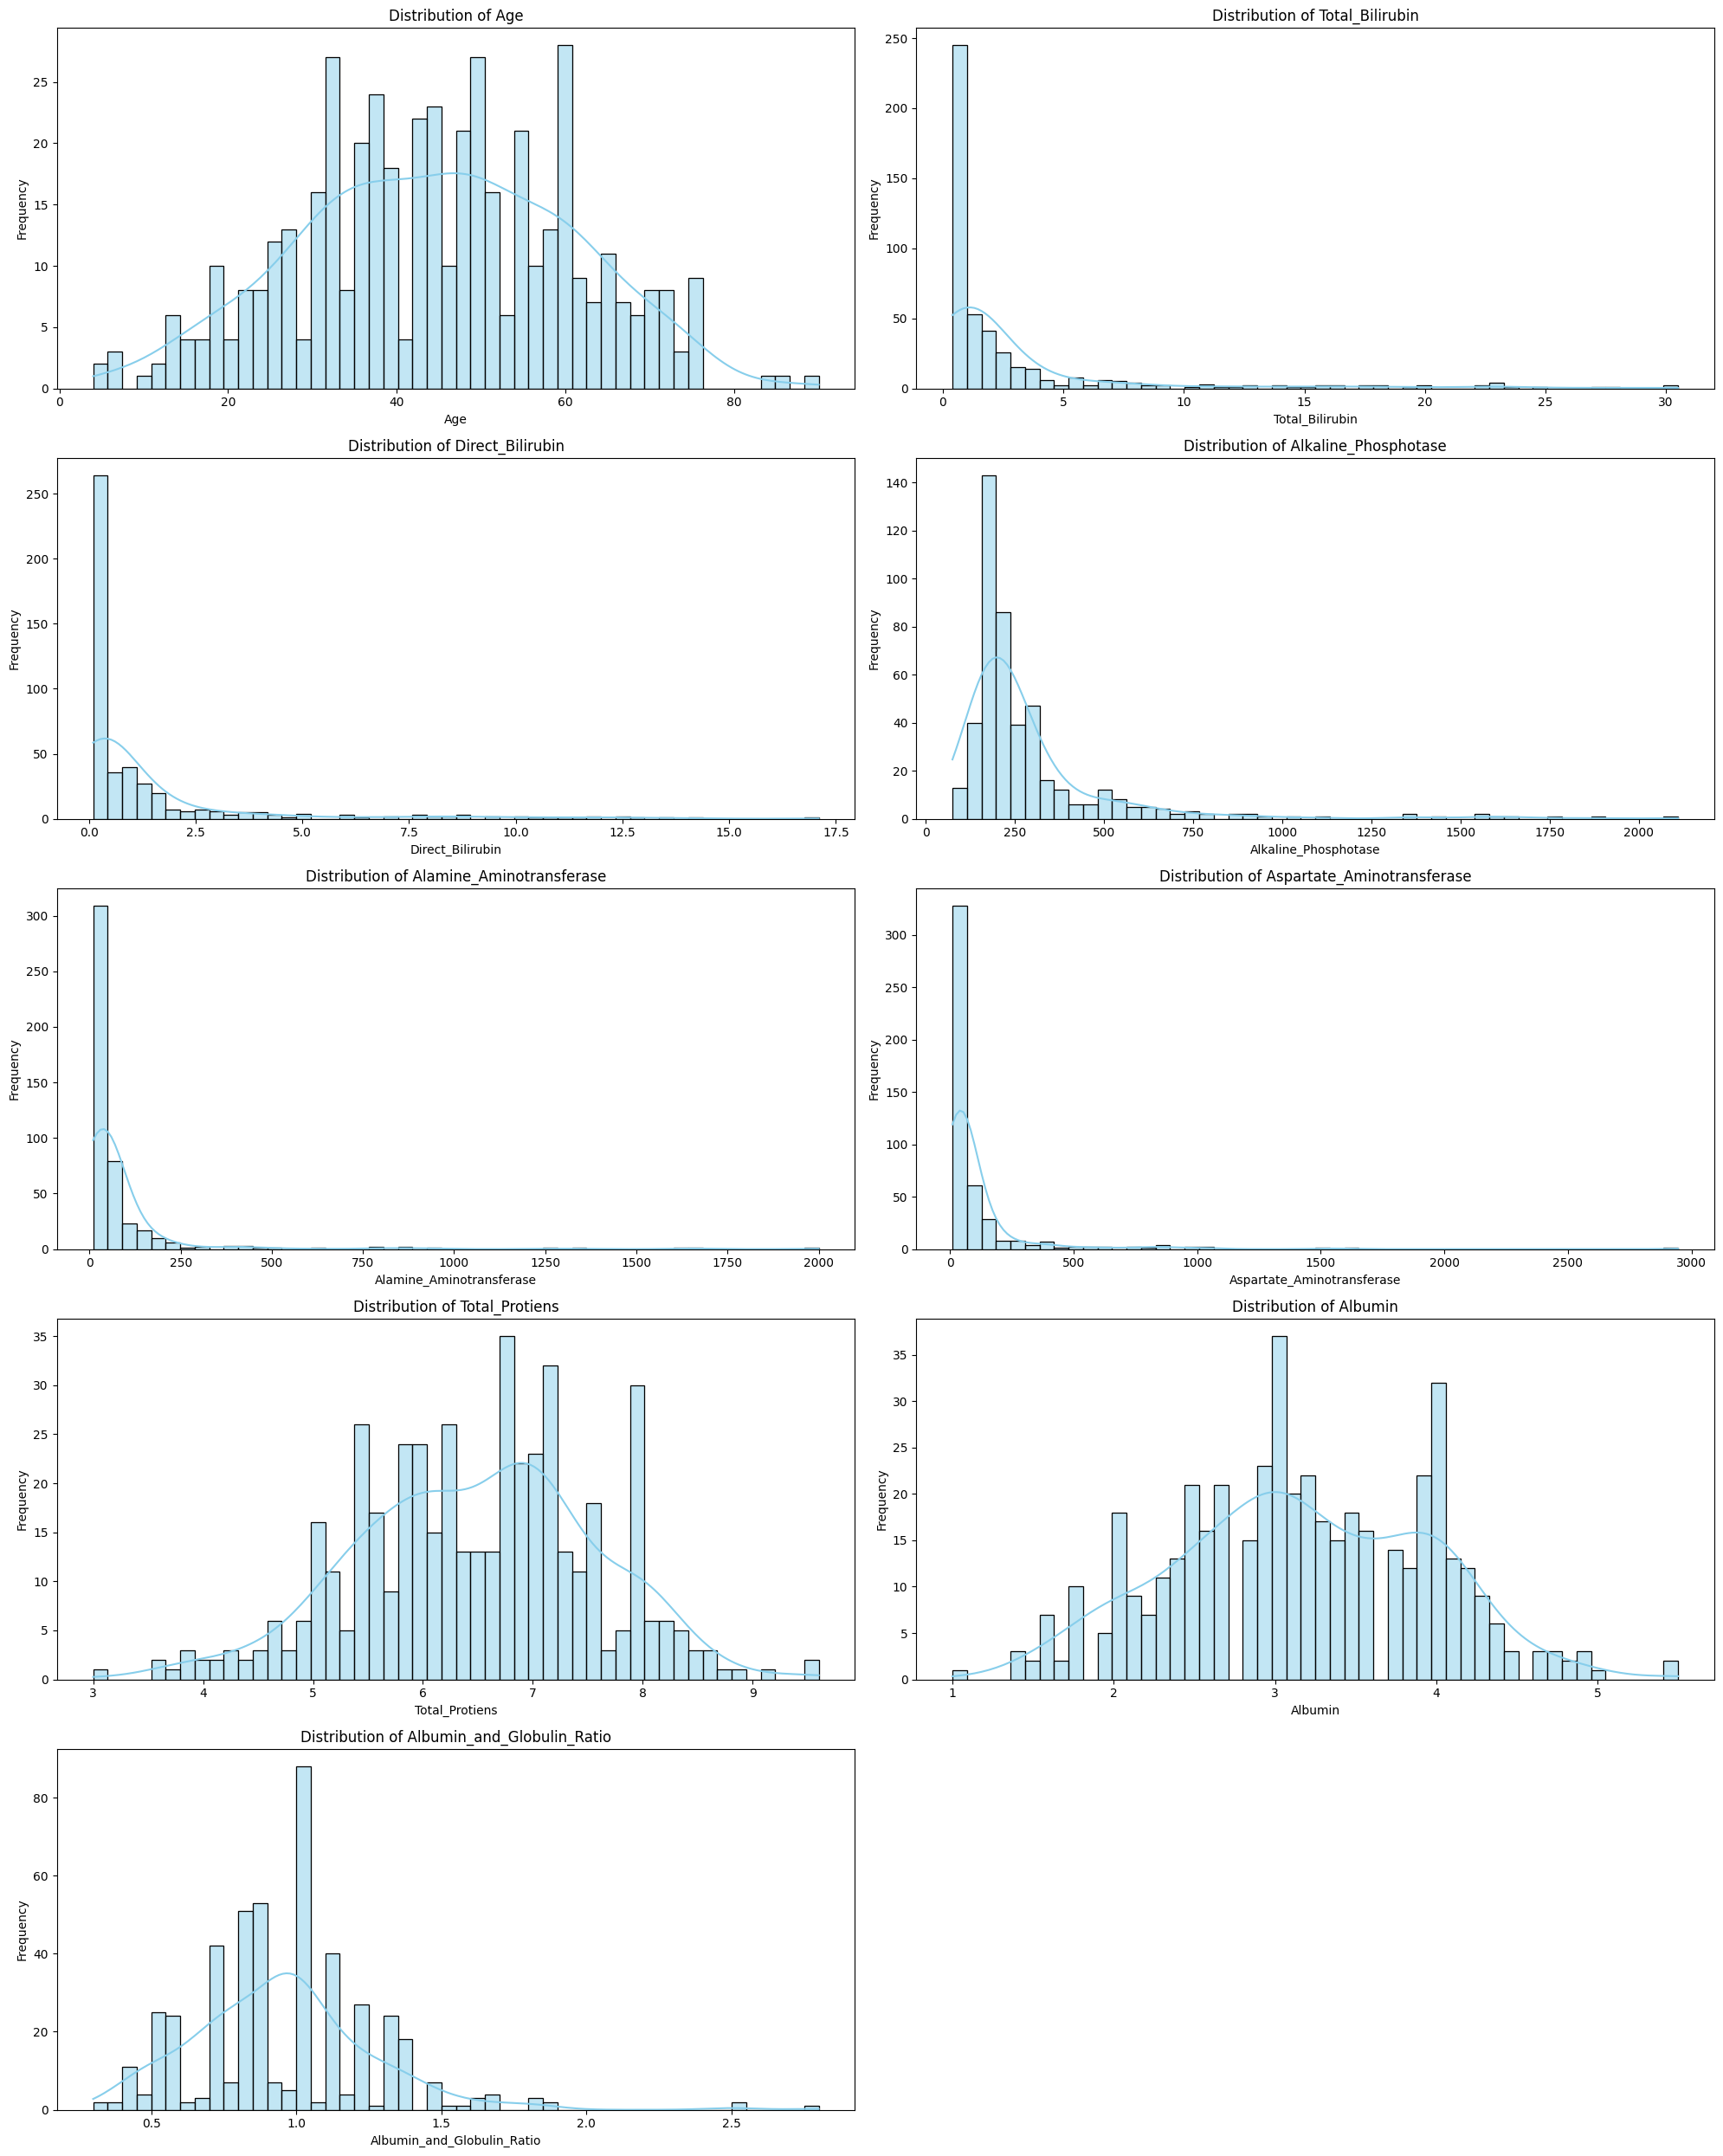

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Plot numerical feature distributions in training data ---

# Select numerical features (excluding Gender and Result)
numerical_features = X_train.columns.drop(['Gender'])  # Gender is numerical but categorical in meaning

plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(X_train[col].dropna(), kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


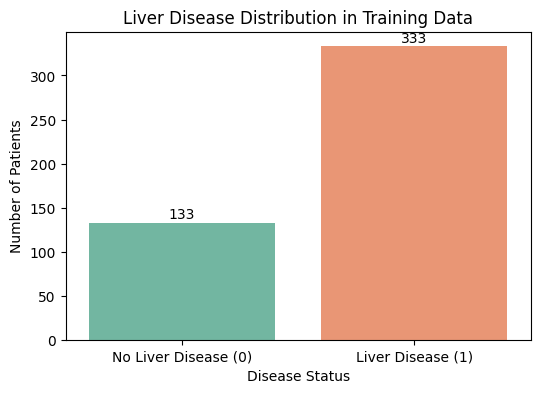

In [ ]:
# Combine X_train and y_train for plotting
train_plot_df = X_train.copy()
train_plot_df['Result'] = y_train

# --- Countplot of Liver Disease in Training Data ---
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Result", hue="Result", data=train_plot_df, palette="Set2", legend=False)
plt.xticks([0, 1], ["No Liver Disease (0)", "Liver Disease (1)"])
plt.title("Liver Disease Distribution in Training Data")
plt.ylabel("Number of Patients")
plt.xlabel("Disease Status")

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 5,
            '{:d}'.format(int(height)),
            ha="center")

plt.show()


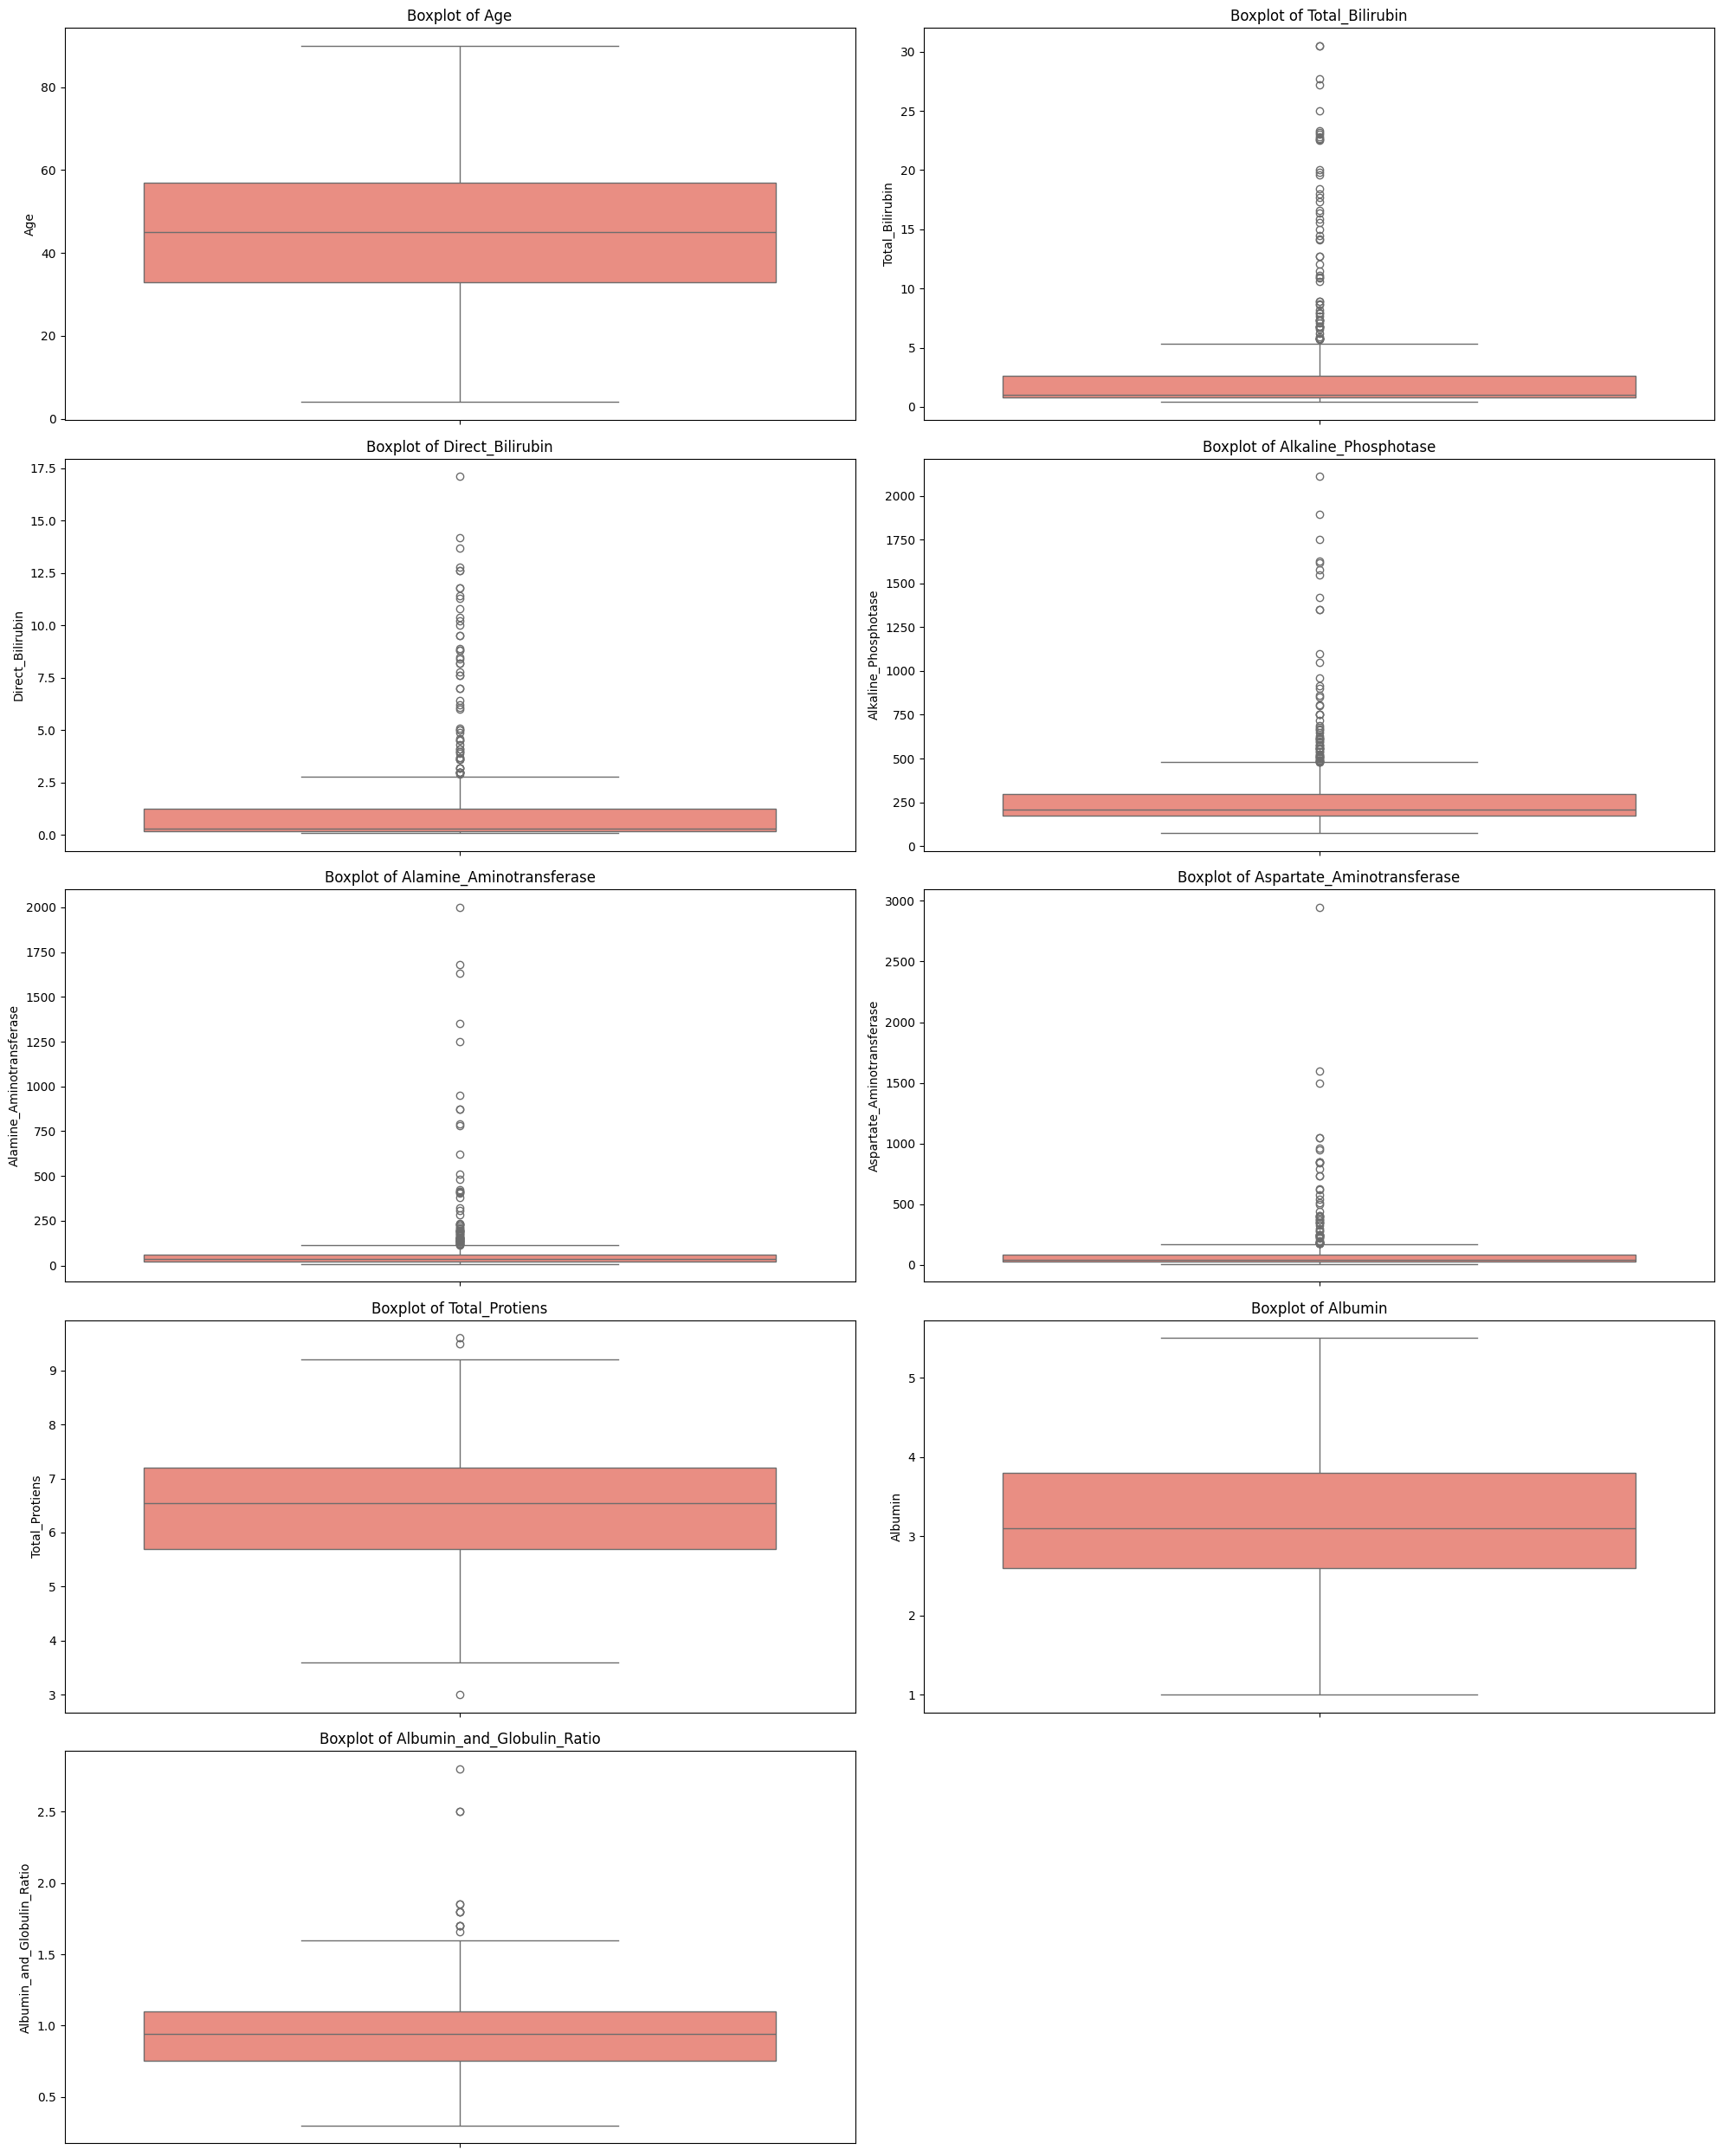

In [ ]:
# Select numerical features (excluding 'Gender' which is categorical in nature)
numerical_features = X_train.columns.drop(['Gender'])

# --- Boxplots for numerical features ---
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=X_train, y=col, color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

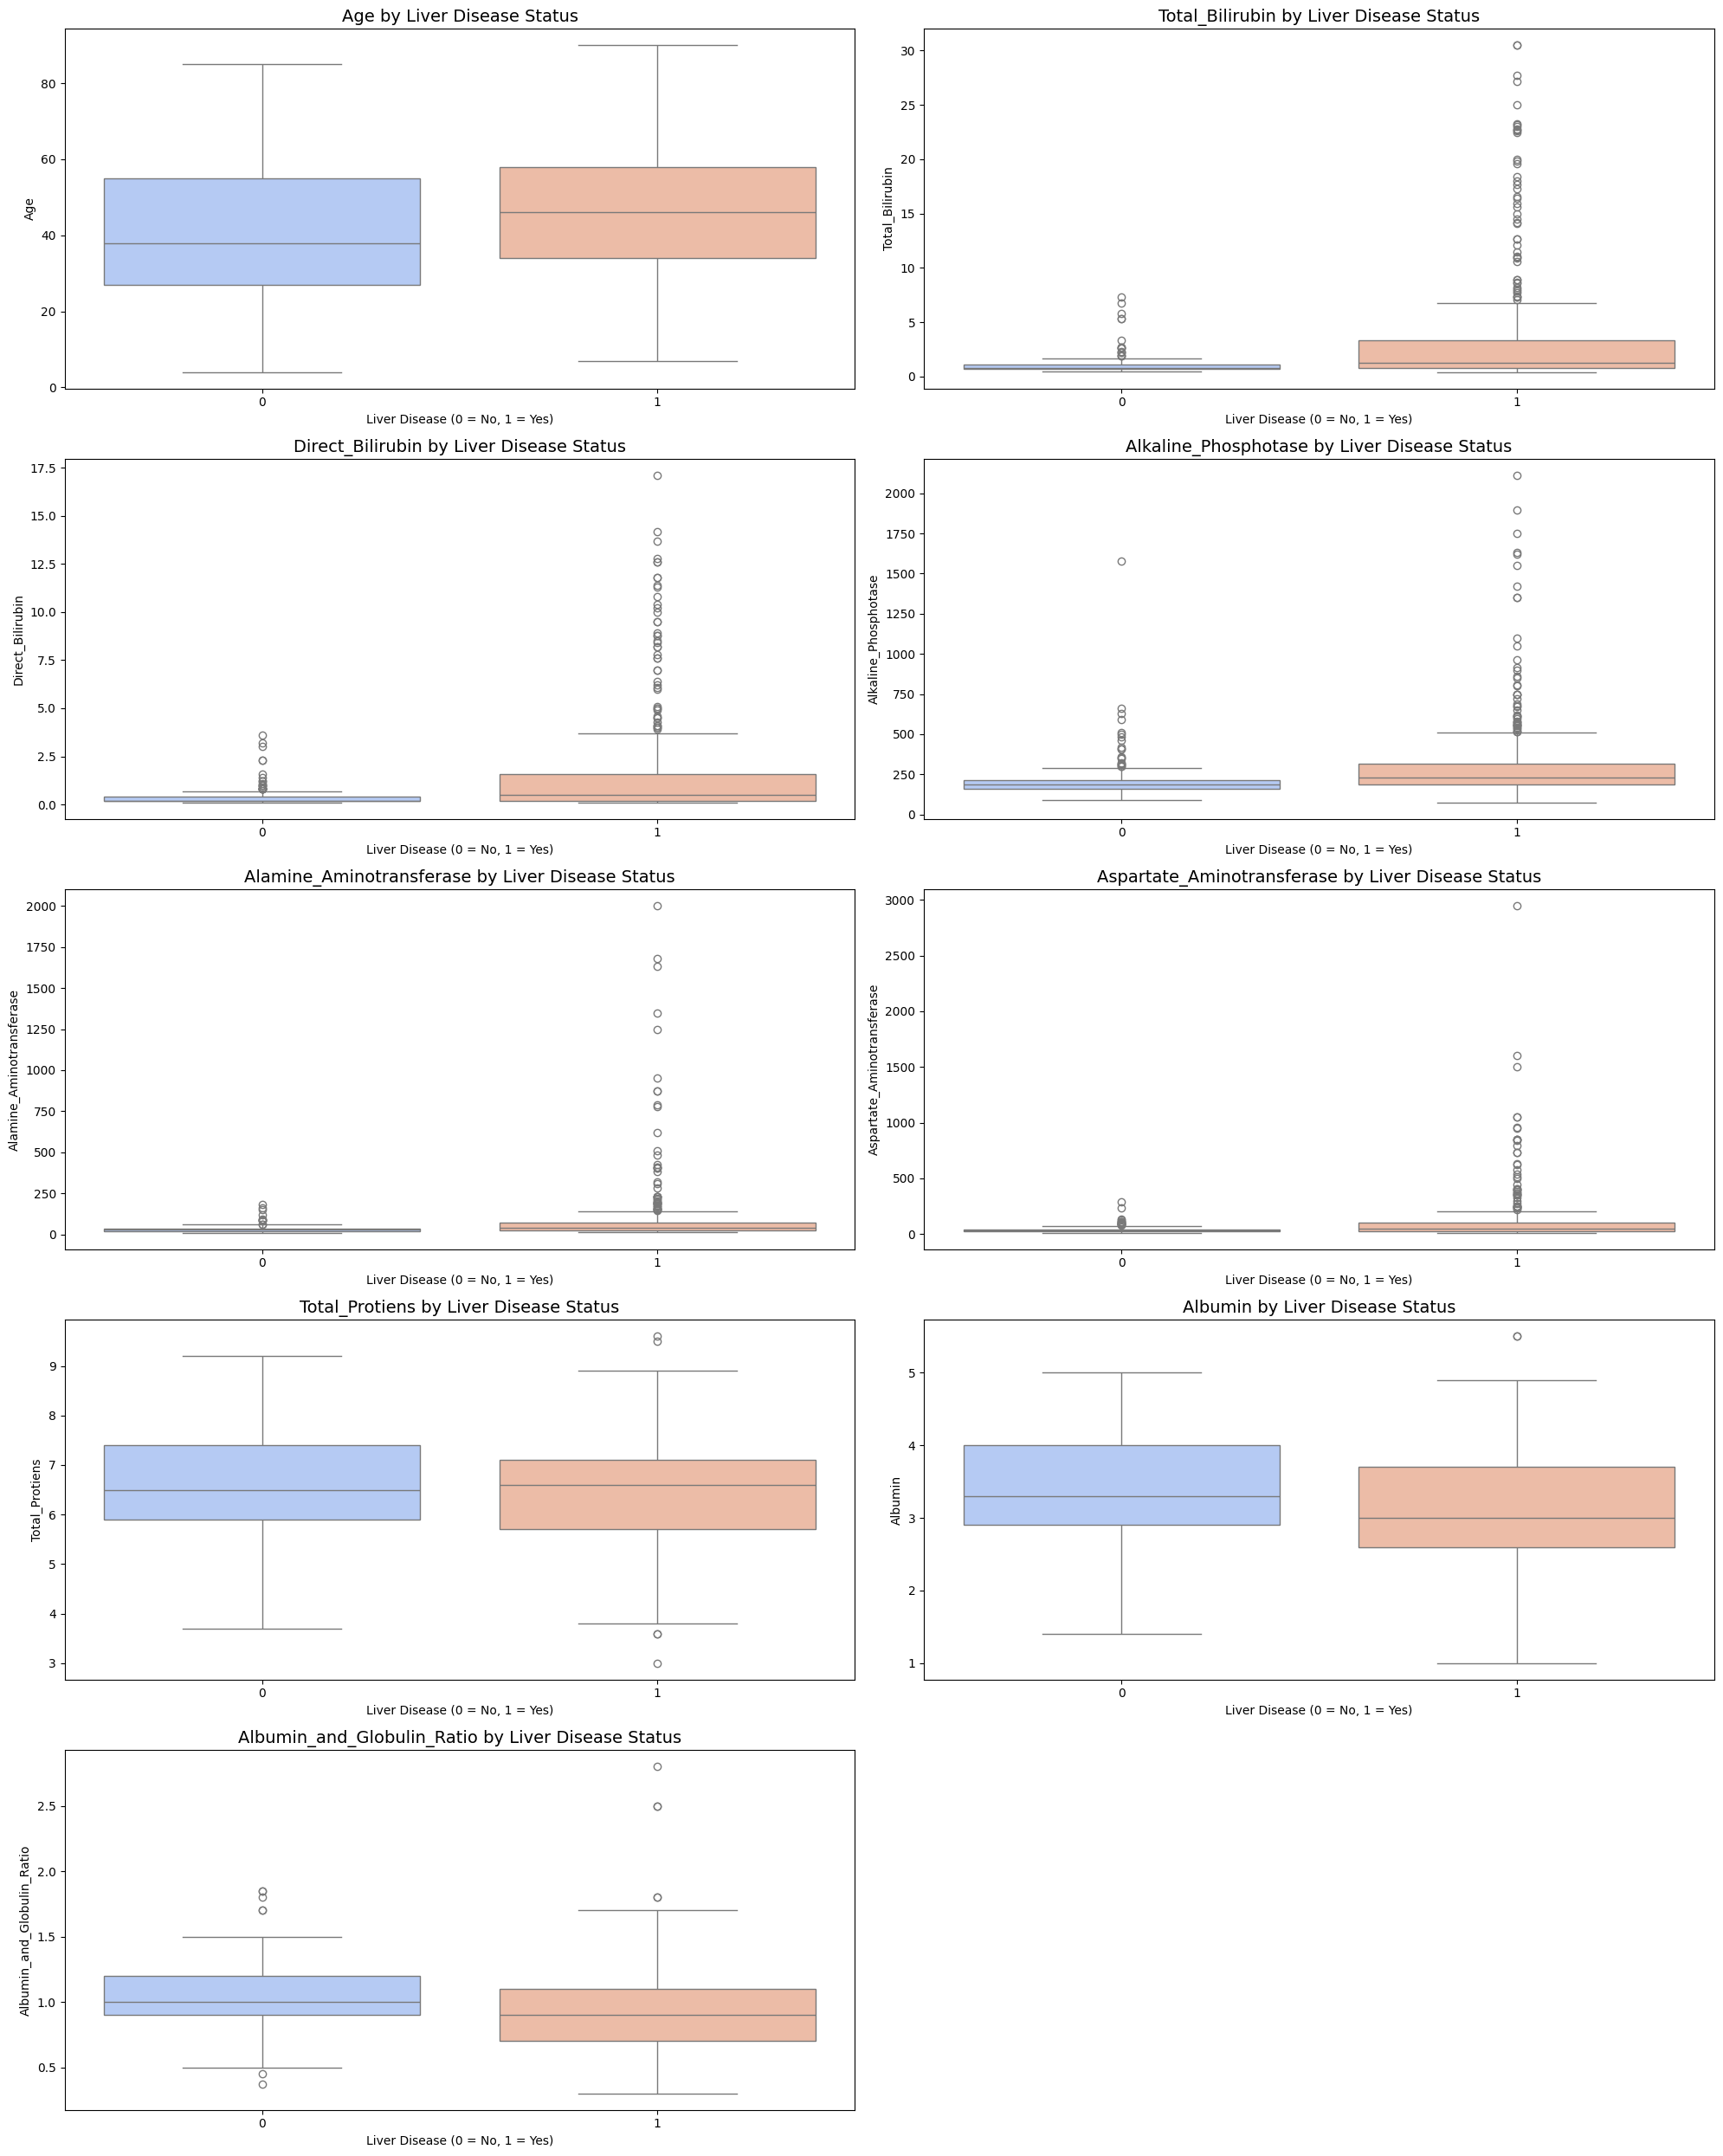

In [ ]:
# --- Boxplots of Numerical Features Grouped by Liver Disease Status ---
plt.figure(figsize=(20, 25))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(
        x='Result',
        y=col,
        data=train_plot_df,
        hue='Result',
        palette='coolwarm',
        dodge=False,
        legend=False  # Suppress legend since hue and x-axis are the same
    )
    plt.title(f'{col} by Liver Disease Status', fontsize=14)
    plt.xlabel('Liver Disease (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<Axes: ylabel='Albumin_and_Globulin_Ratio'>

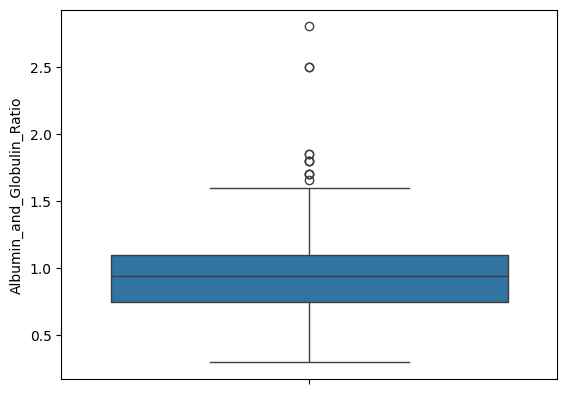

In [ ]:
sns.boxplot(data=X_train, y=col)


In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_train))
outlier_flags = (z_scores > 3)  # Threshold: 3 standard deviations
outliers_count = np.sum(outlier_flags)

print(f'Total outlier values across all features: {outliers_count}')



Total outlier values across all features: 70


In [ ]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping to all numerical features
for col in X_train.columns:
    X_train = cap_outliers(X_train, col)


In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(X_train))
outlier_flags = (z_scores > 3)  # Threshold: 3 standard deviations
outliers_count = np.sum(outlier_flags)

print(f'Total outlier values across all features: {outliers_count}')

Total outlier values across all features: 0


/tmp/ipython-input-23-1461339020.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(X_train))


### Random Forest with loop on tress

In [ ]:
# Assuming your original dataset is called df
df = df.drop_duplicates().reset_index(drop=True)

# Proceed with the split
X = df.drop(columns=['Result'])
y = df['Result']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Reset indices
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Recheck overlap
overlap = pd.merge(X_train, X_val, how='inner')
print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Number of overlapping rows (actual duplicates across train and val): {overlap.shape[0]}")


Training samples: 456
Validation samples: 114
Number of overlapping rows (actual duplicates across train and val): 0


### Logistic Regression

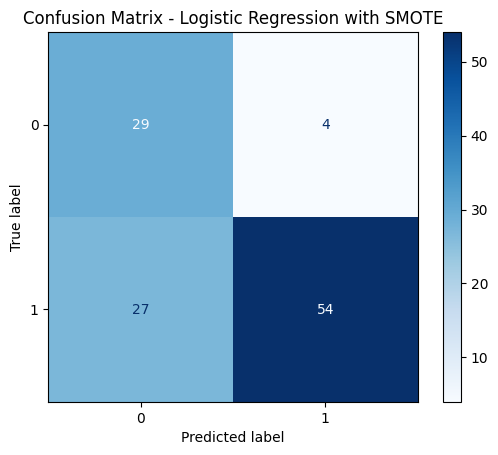

Classification Report - Logistic Regression with SMOTE:

              precision    recall  f1-score   support

           0       0.52      0.88      0.65        33
           1       0.93      0.67      0.78        81

    accuracy                           0.73       114
   macro avg       0.72      0.77      0.71       114
weighted avg       0.81      0.73      0.74       114



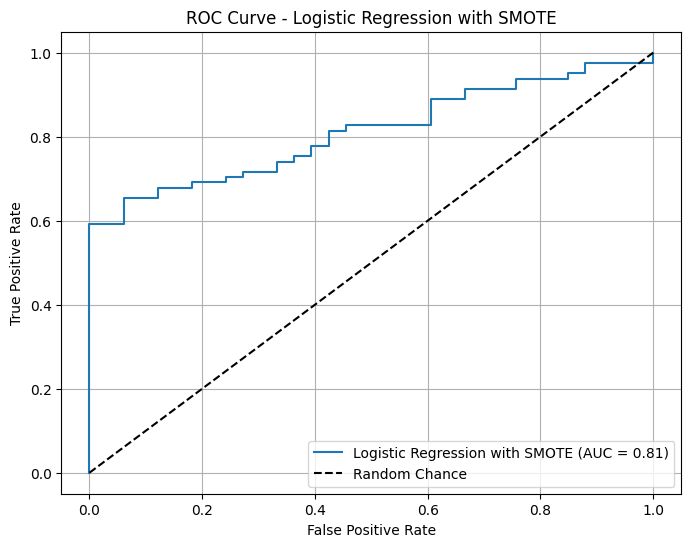

/tmp/ipython-input-25-2301011674.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_original, palette="Set2")
/tmp/ipython-input-25-2301011674.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


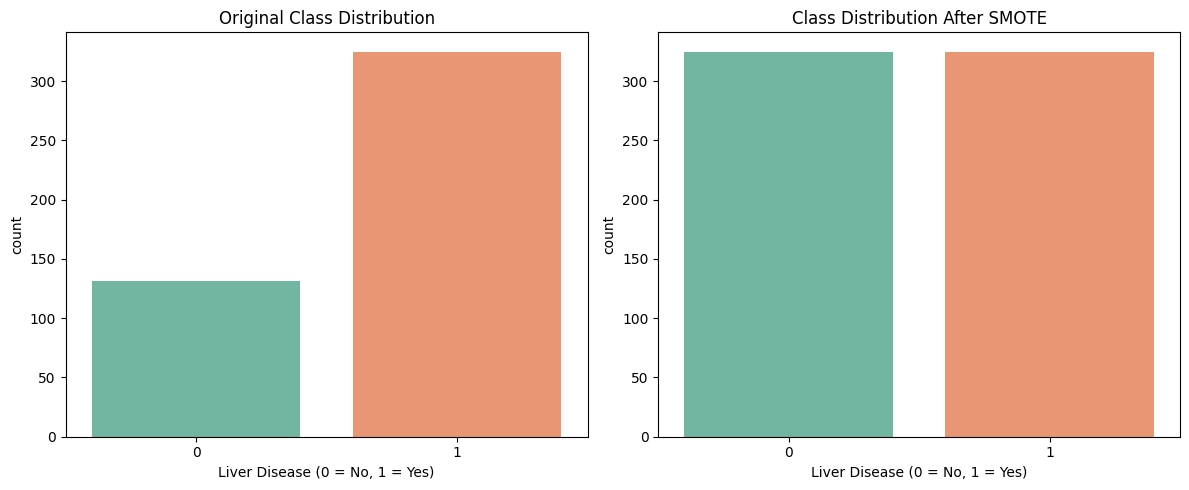

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns
import matplotlib.pyplot as plt

# You already have: X_train, X_val, y_train, y_val from your cleaned and split dataset

# Select numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# --- Step 1: Pipeline with SMOTE and Logistic Regression ---
smote_logreg_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# --- Step 2: Fit the Model ---
smote_logreg_pipeline.fit(X_train[numerical_features], y_train)

# --- Step 3: Predict and Evaluate on Validation Set ---
y_val_pred = smote_logreg_pipeline.predict(X_val[numerical_features])
y_val_proba = smote_logreg_pipeline.predict_proba(X_val[numerical_features])[:, 1]

# --- Step 4: Evaluation Metrics ---
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.grid(False)
plt.show()

# Classification Report
print("Classification Report - Logistic Regression with SMOTE:\n")
print(classification_report(y_val, y_val_pred))

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression with SMOTE (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# --- Step 5: Visualizing Class Distribution Before and After SMOTE ---
def plot_class_distribution(y_original, y_resampled):
    plt.figure(figsize=(12, 5))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_original, palette="Set2")
    plt.title("Original Class Distribution")
    plt.xlabel("Liver Disease (0 = No, 1 = Yes)")

    # After SMOTE
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_resampled, palette="Set2")
    plt.title("Class Distribution After SMOTE")
    plt.xlabel("Liver Disease (0 = No, 1 = Yes)")

    plt.tight_layout()
    plt.show()

# Preprocessing before SMOTE to visualize the resampled data
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(imputer.fit_transform(X_train[numerical_features]))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Plot class distributions
plot_class_distribution(y_train, y_resampled)


 ### SVM


================ SVM with linear kernel + SMOTE ================



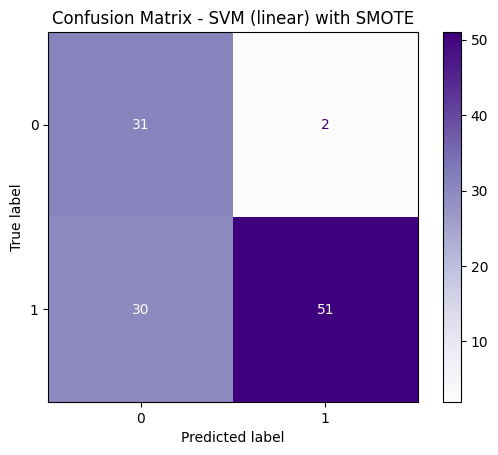

Classification Report - SVM (linear) with SMOTE:

              precision    recall  f1-score   support

           0       0.51      0.94      0.66        33
           1       0.96      0.63      0.76        81

    accuracy                           0.72       114
   macro avg       0.74      0.78      0.71       114
weighted avg       0.83      0.72      0.73       114

Recall for class 1 (Liver Disease): 0.6296


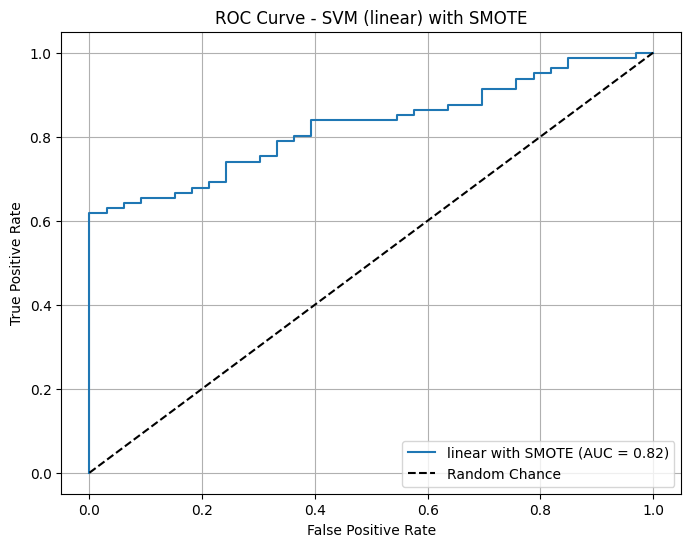


================ SVM with poly kernel + SMOTE ================



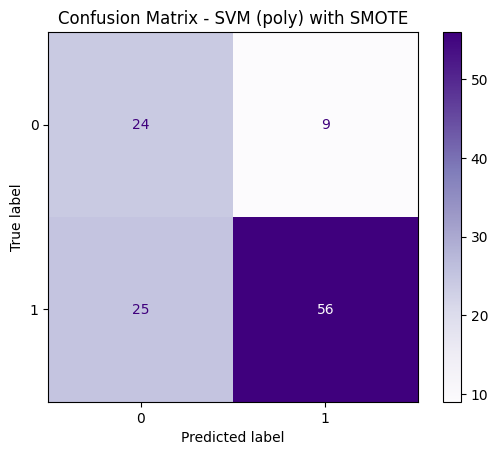

Classification Report - SVM (poly) with SMOTE:

              precision    recall  f1-score   support

           0       0.49      0.73      0.59        33
           1       0.86      0.69      0.77        81

    accuracy                           0.70       114
   macro avg       0.68      0.71      0.68       114
weighted avg       0.75      0.70      0.71       114

Recall for class 1 (Liver Disease): 0.6914


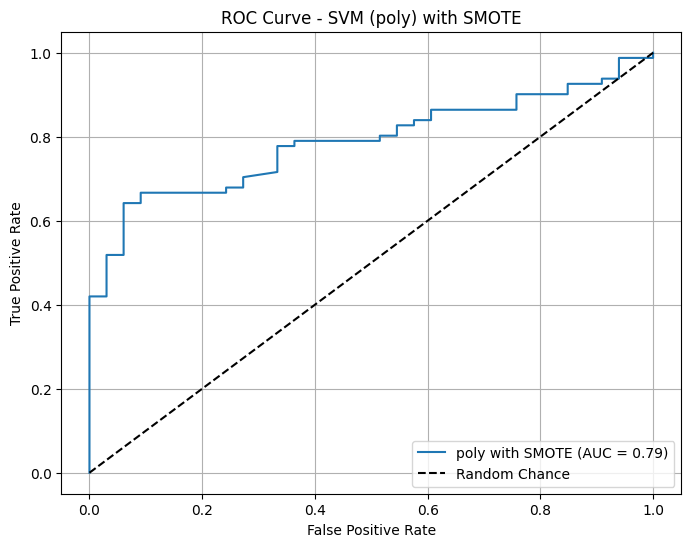


================ SVM with rbf kernel + SMOTE ================



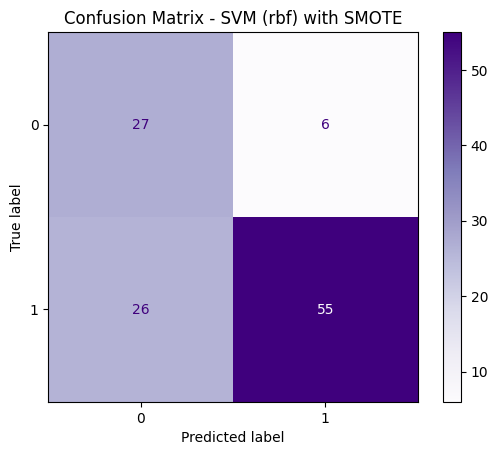

Classification Report - SVM (rbf) with SMOTE:

              precision    recall  f1-score   support

           0       0.51      0.82      0.63        33
           1       0.90      0.68      0.77        81

    accuracy                           0.72       114
   macro avg       0.71      0.75      0.70       114
weighted avg       0.79      0.72      0.73       114

Recall for class 1 (Liver Disease): 0.6790


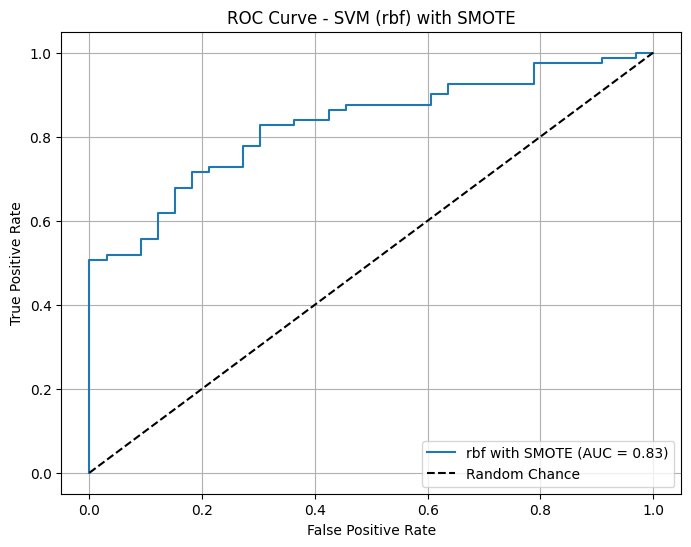


================ SVM with sigmoid kernel + SMOTE ================



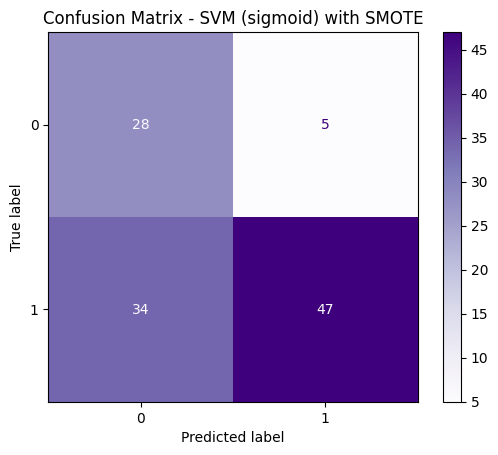

Classification Report - SVM (sigmoid) with SMOTE:

              precision    recall  f1-score   support

           0       0.45      0.85      0.59        33
           1       0.90      0.58      0.71        81

    accuracy                           0.66       114
   macro avg       0.68      0.71      0.65       114
weighted avg       0.77      0.66      0.67       114

Recall for class 1 (Liver Disease): 0.5802


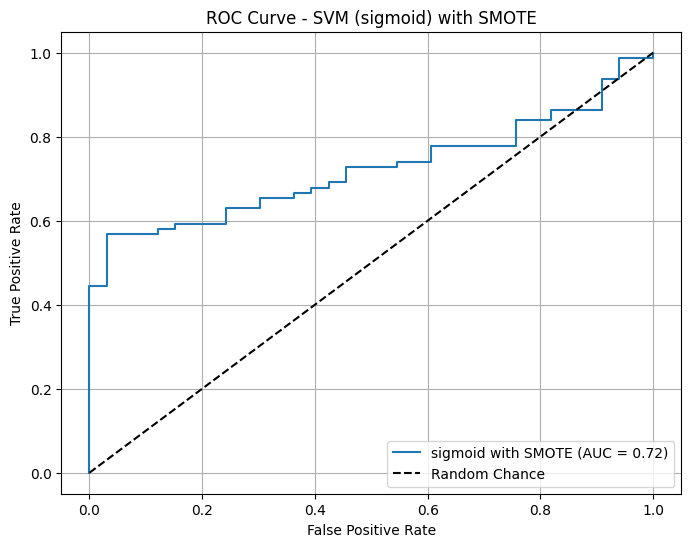


Best SVM Kernel with SMOTE: 'poly' with Recall = 0.6914


In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of kernels to try
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Track best model
svm_results = {}

# Numerical features (since you dropped duplicates and reset indices)
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

for kernel in svm_kernels:
    print(f"\n================ SVM with {kernel} kernel + SMOTE ================\n")

    # SMOTE + Preprocessing Pipeline
    svm_smote_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('svm', SVC(kernel=kernel, probability=True, random_state=42))
    ])

    # Train model
    svm_smote_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = svm_smote_pipeline.predict(X_val[numerical_features])
    y_val_proba = svm_smote_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix - SVM ({kernel}) with SMOTE")
    plt.grid(False)
    plt.show()

    # Classification Report
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    print(f"Classification Report - SVM ({kernel}) with SMOTE:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    # Extract recall for class 1 safely
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get('recall', 0)

    print(f"Recall for class 1 (Liver Disease): {recall:.4f}")

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{kernel} with SMOTE (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - SVM ({kernel}) with SMOTE')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Save results
    svm_results[kernel] = {
        'pipeline': svm_smote_pipeline,
        'recall': recall,
        'auc': roc_auc
    }

# Select best kernel based on recall
best_kernel = max(svm_results.items(), key=lambda x: x[1]['recall'])[0]
best_model = svm_results[best_kernel]['pipeline']
best_recall = svm_results[best_kernel]['recall']
print(f"\nBest SVM Kernel with SMOTE: '{best_kernel}' with Recall = {best_recall:.4f}")


### KNN


========================= KNN (k=2) with SMOTE =========================

 Classification Report for k=2 with SMOTE:

              precision    recall  f1-score   support

           0       0.42      0.70      0.52        33
           1       0.83      0.60      0.70        81

    accuracy                           0.63       114
   macro avg       0.62      0.65      0.61       114
weighted avg       0.71      0.63      0.65       114



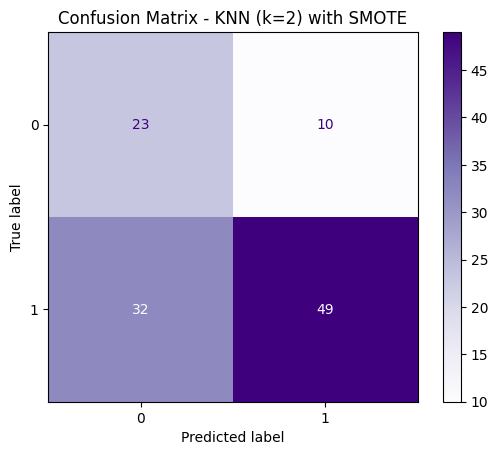

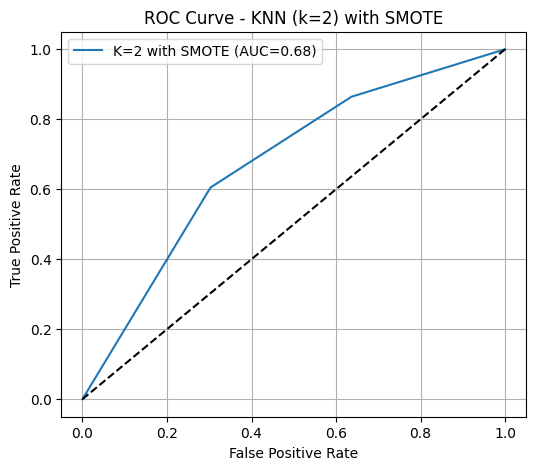


========================= KNN (k=3) with SMOTE =========================

 Classification Report for k=3 with SMOTE:

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        33
           1       0.82      0.65      0.73        81

    accuracy                           0.65       114
   macro avg       0.62      0.65      0.62       114
weighted avg       0.70      0.65      0.66       114



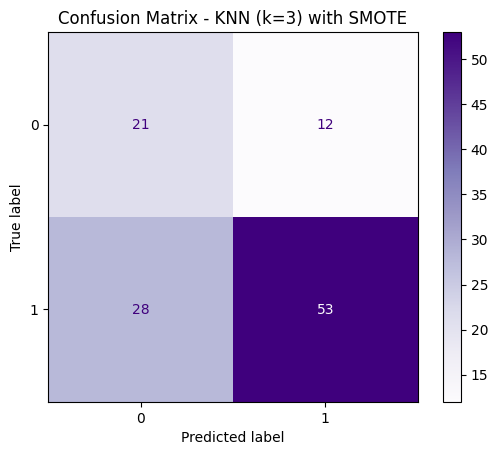

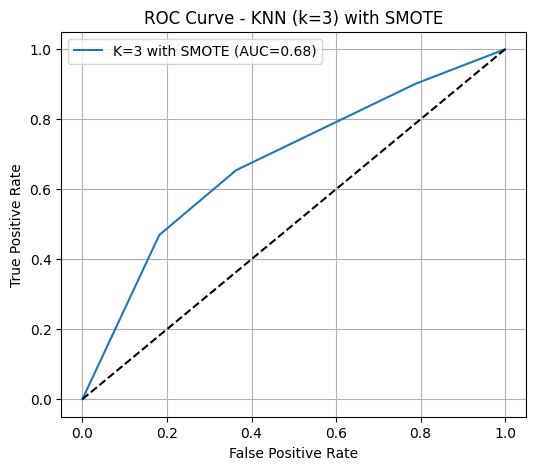


========================= KNN (k=4) with SMOTE =========================

 Classification Report for k=4 with SMOTE:

              precision    recall  f1-score   support

           0       0.38      0.70      0.49        33
           1       0.81      0.53      0.64        81

    accuracy                           0.58       114
   macro avg       0.59      0.61      0.57       114
weighted avg       0.69      0.58      0.60       114



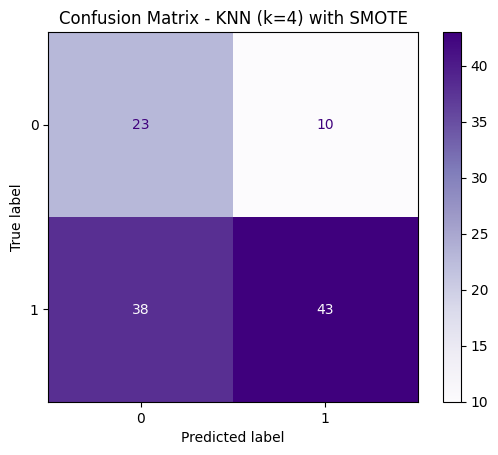

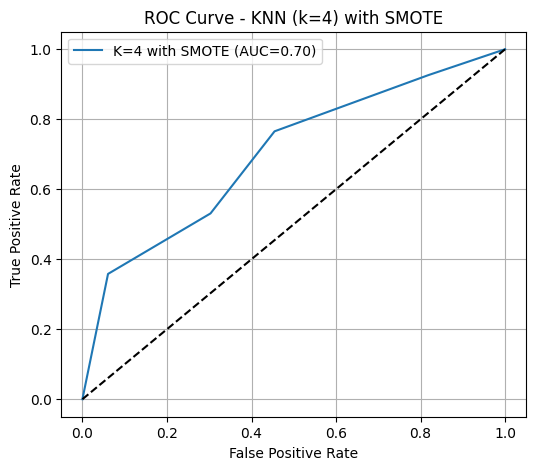


========================= KNN (k=5) with SMOTE =========================

 Classification Report for k=5 with SMOTE:

              precision    recall  f1-score   support

           0       0.40      0.61      0.48        33
           1       0.80      0.63      0.70        81

    accuracy                           0.62       114
   macro avg       0.60      0.62      0.59       114
weighted avg       0.68      0.62      0.64       114



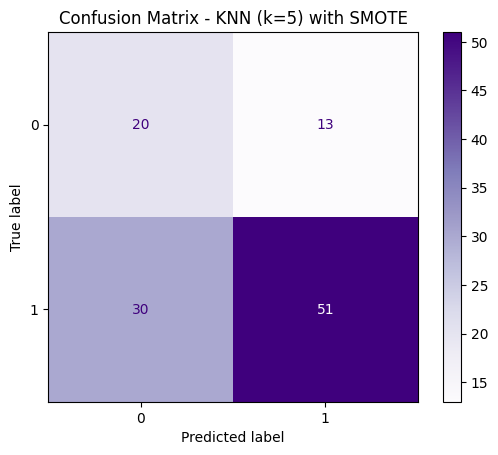

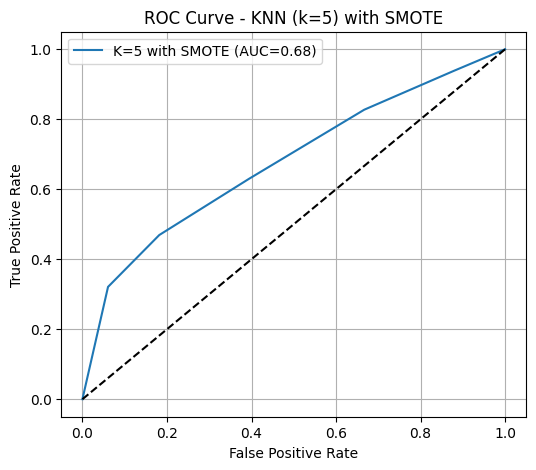


========================= KNN (k=6) with SMOTE =========================

 Classification Report for k=6 with SMOTE:

              precision    recall  f1-score   support

           0       0.39      0.67      0.49        33
           1       0.81      0.57      0.67        81

    accuracy                           0.60       114
   macro avg       0.60      0.62      0.58       114
weighted avg       0.69      0.60      0.62       114



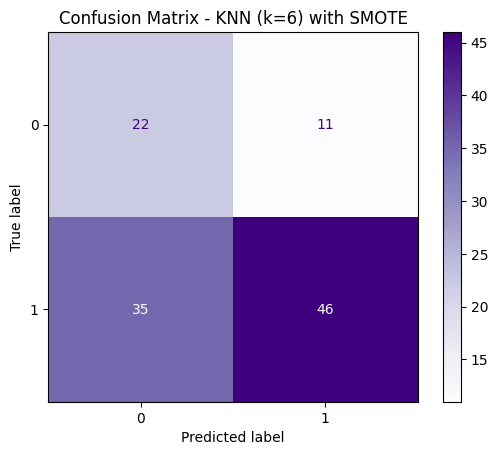

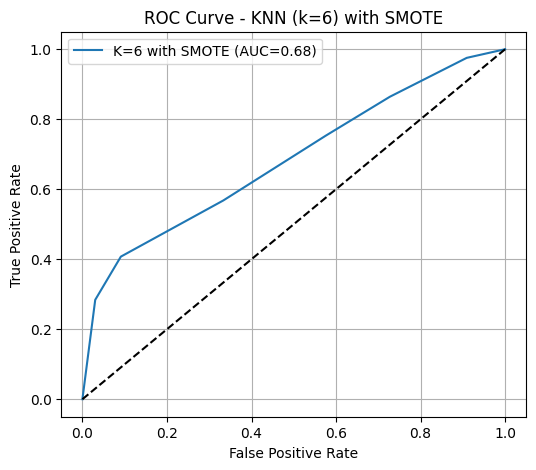


========================= KNN (k=7) with SMOTE =========================

 Classification Report for k=7 with SMOTE:

              precision    recall  f1-score   support

           0       0.42      0.61      0.49        33
           1       0.80      0.65      0.72        81

    accuracy                           0.64       114
   macro avg       0.61      0.63      0.61       114
weighted avg       0.69      0.64      0.66       114



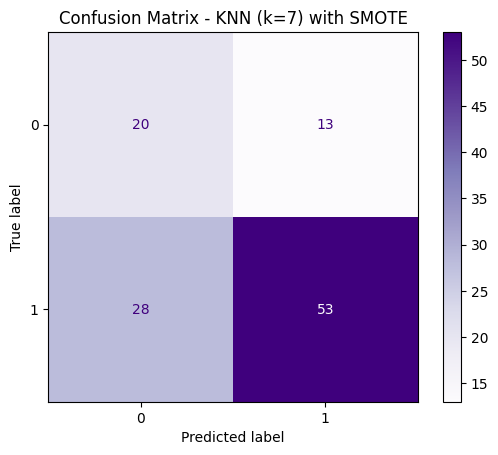

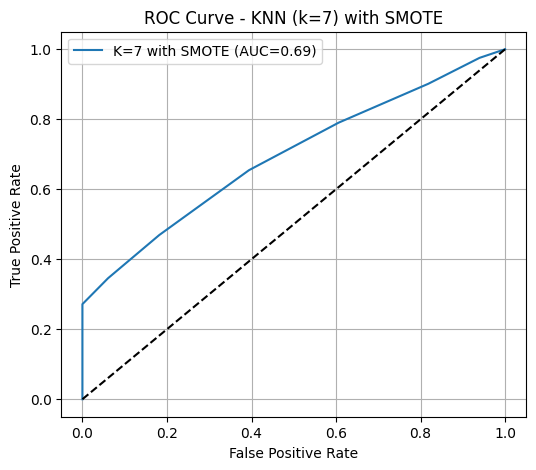


========================= KNN (k=8) with SMOTE =========================

 Classification Report for k=8 with SMOTE:

              precision    recall  f1-score   support

           0       0.40      0.64      0.49        33
           1       0.80      0.60      0.69        81

    accuracy                           0.61       114
   macro avg       0.60      0.62      0.59       114
weighted avg       0.69      0.61      0.63       114



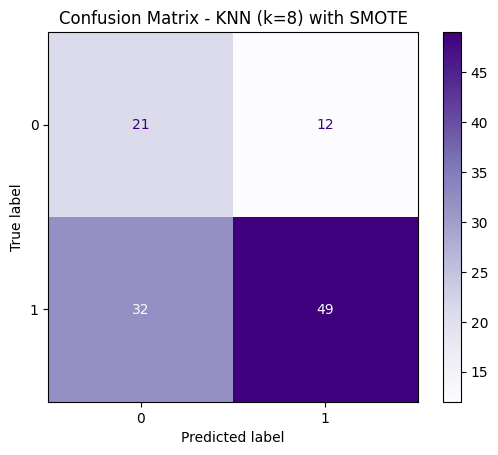

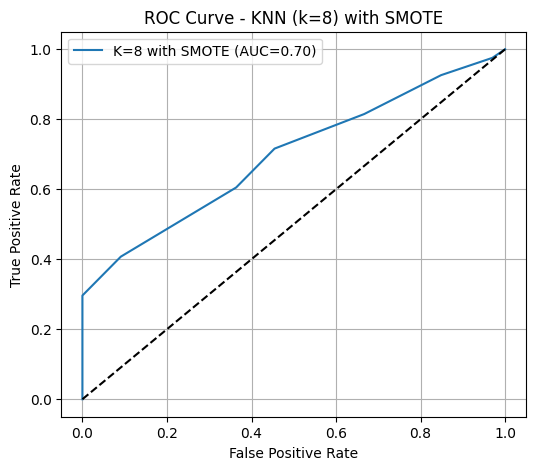


========================= KNN (k=9) with SMOTE =========================

 Classification Report for k=9 with SMOTE:

              precision    recall  f1-score   support

           0       0.40      0.64      0.49        33
           1       0.81      0.62      0.70        81

    accuracy                           0.62       114
   macro avg       0.61      0.63      0.60       114
weighted avg       0.69      0.62      0.64       114



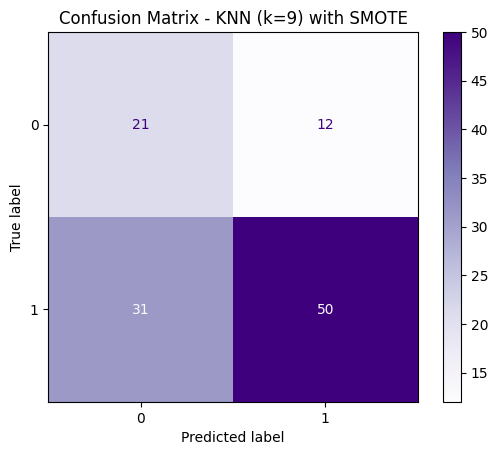

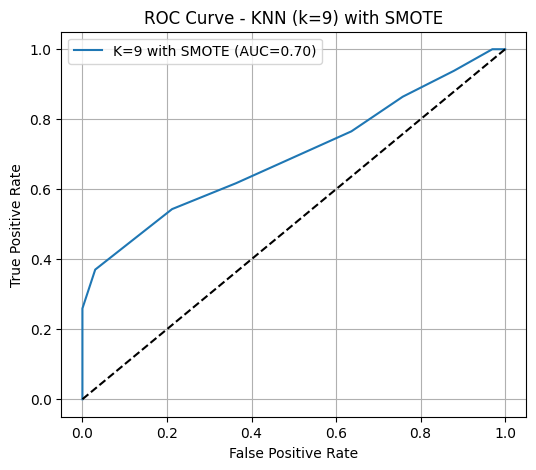


========================= KNN (k=10) with SMOTE =========================

 Classification Report for k=10 with SMOTE:

              precision    recall  f1-score   support

           0       0.39      0.67      0.49        33
           1       0.81      0.57      0.67        81

    accuracy                           0.60       114
   macro avg       0.60      0.62      0.58       114
weighted avg       0.69      0.60      0.62       114



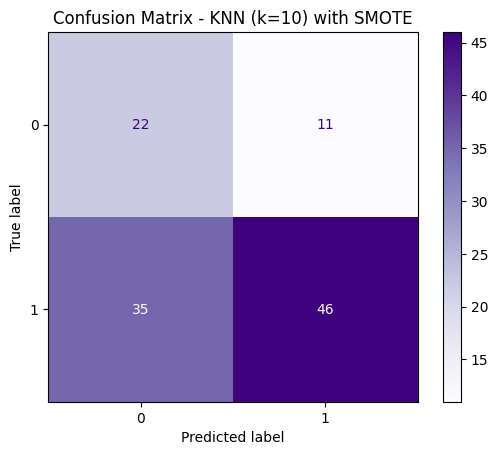

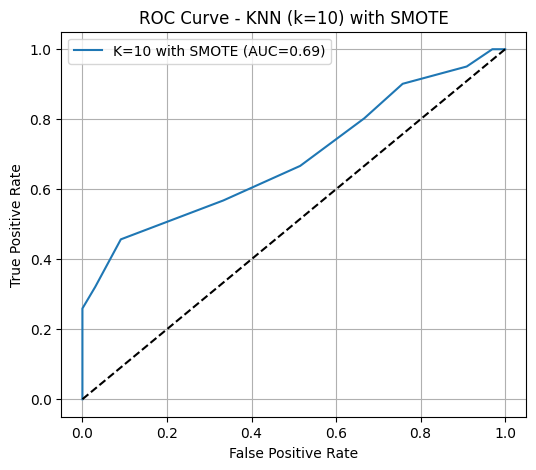


========================= KNN (k=11) with SMOTE =========================

 Classification Report for k=11 with SMOTE:

              precision    recall  f1-score   support

           0       0.37      0.58      0.45        33
           1       0.77      0.59      0.67        81

    accuracy                           0.59       114
   macro avg       0.57      0.58      0.56       114
weighted avg       0.66      0.59      0.61       114



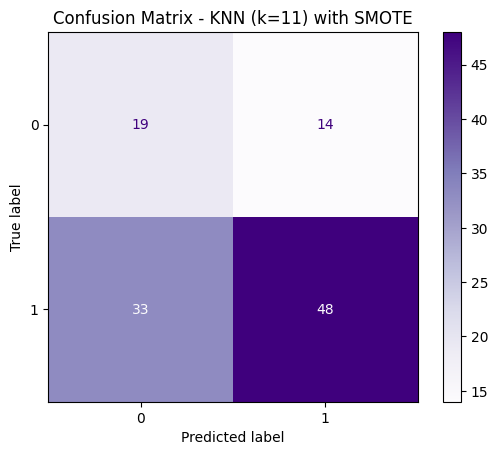

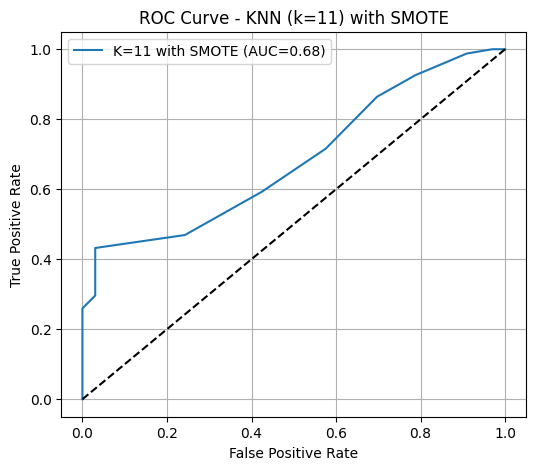


========================= KNN (k=12) with SMOTE =========================

 Classification Report for k=12 with SMOTE:

              precision    recall  f1-score   support

           0       0.38      0.73      0.50        33
           1       0.82      0.52      0.64        81

    accuracy                           0.58       114
   macro avg       0.60      0.62      0.57       114
weighted avg       0.70      0.58      0.60       114



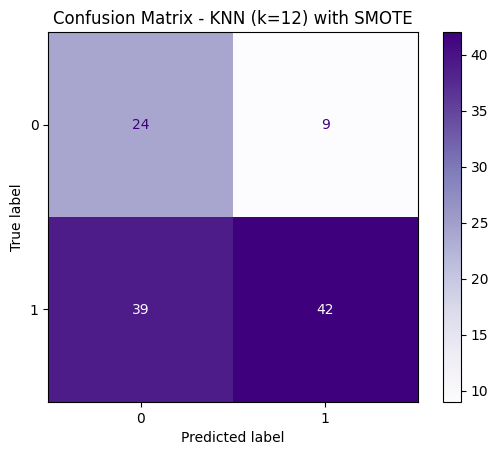

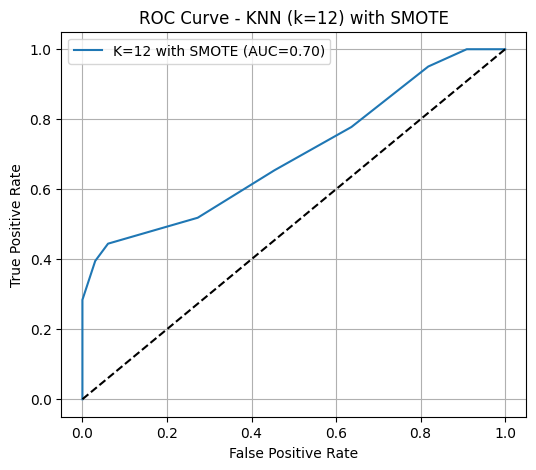


========================= KNN (k=13) with SMOTE =========================

 Classification Report for k=13 with SMOTE:

              precision    recall  f1-score   support

           0       0.40      0.64      0.49        33
           1       0.80      0.60      0.69        81

    accuracy                           0.61       114
   macro avg       0.60      0.62      0.59       114
weighted avg       0.69      0.61      0.63       114



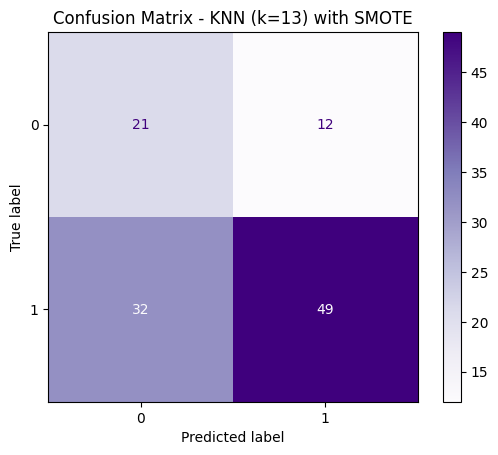

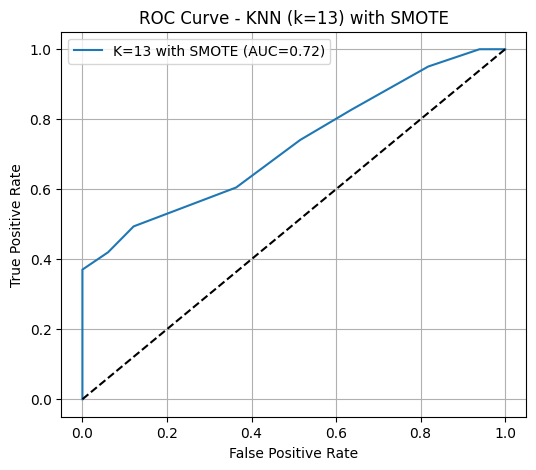


========================= KNN (k=14) with SMOTE =========================

 Classification Report for k=14 with SMOTE:

              precision    recall  f1-score   support

           0       0.43      0.79      0.55        33
           1       0.87      0.57      0.69        81

    accuracy                           0.63       114
   macro avg       0.65      0.68      0.62       114
weighted avg       0.74      0.63      0.65       114



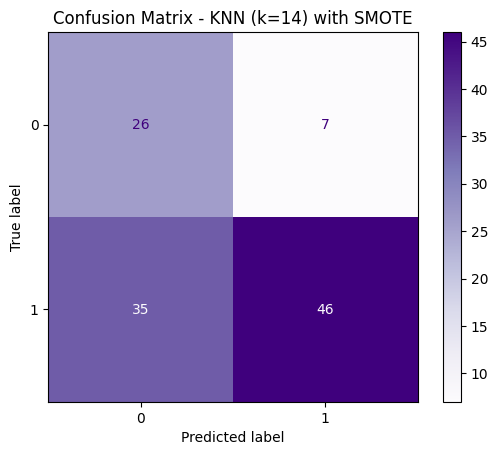

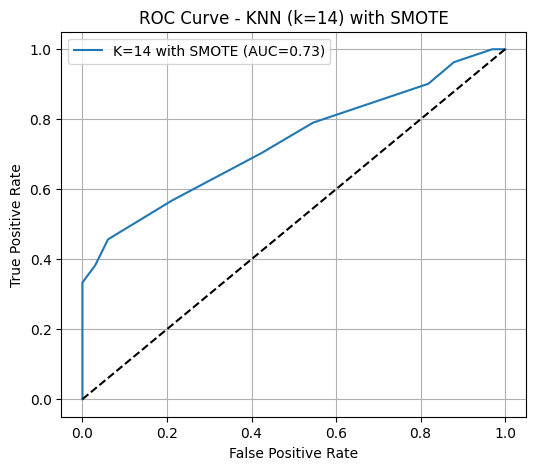


========================= KNN (k=15) with SMOTE =========================

 Classification Report for k=15 with SMOTE:

              precision    recall  f1-score   support

           0       0.46      0.79      0.58        33
           1       0.88      0.62      0.72        81

    accuracy                           0.67       114
   macro avg       0.67      0.70      0.65       114
weighted avg       0.76      0.67      0.68       114



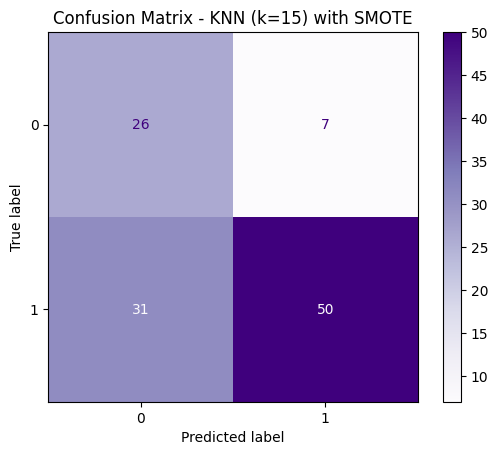

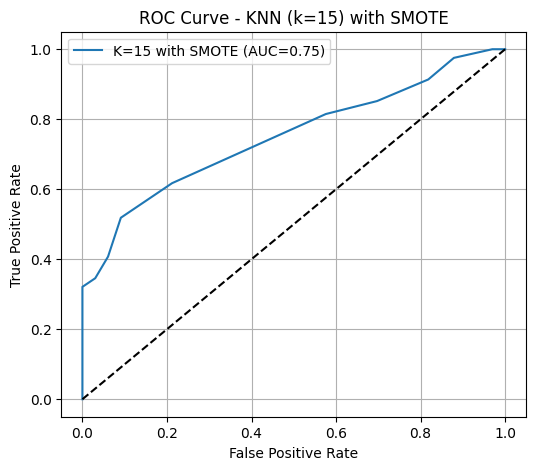


========================= KNN (k=16) with SMOTE =========================

 Classification Report for k=16 with SMOTE:

              precision    recall  f1-score   support

           0       0.44      0.85      0.58        33
           1       0.90      0.57      0.70        81

    accuracy                           0.65       114
   macro avg       0.67      0.71      0.64       114
weighted avg       0.77      0.65      0.66       114



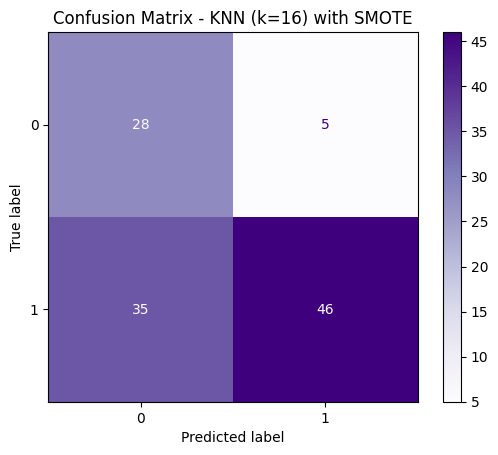

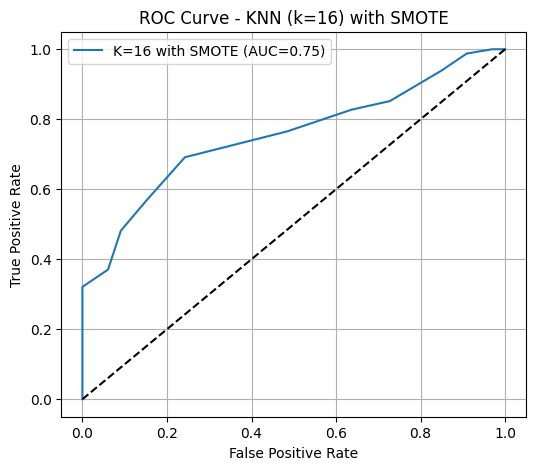


========================= KNN (k=17) with SMOTE =========================

 Classification Report for k=17 with SMOTE:

              precision    recall  f1-score   support

           0       0.45      0.79      0.57        33
           1       0.88      0.60      0.72        81

    accuracy                           0.66       114
   macro avg       0.66      0.70      0.64       114
weighted avg       0.75      0.66      0.67       114



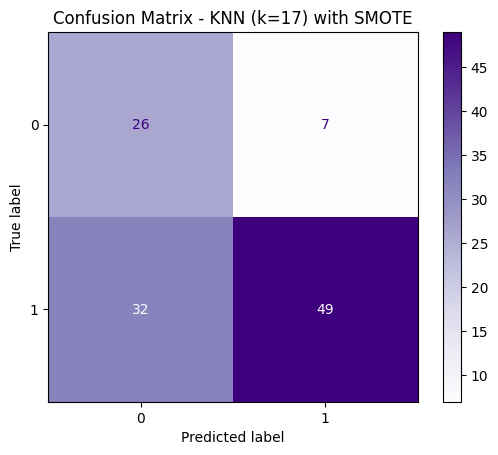

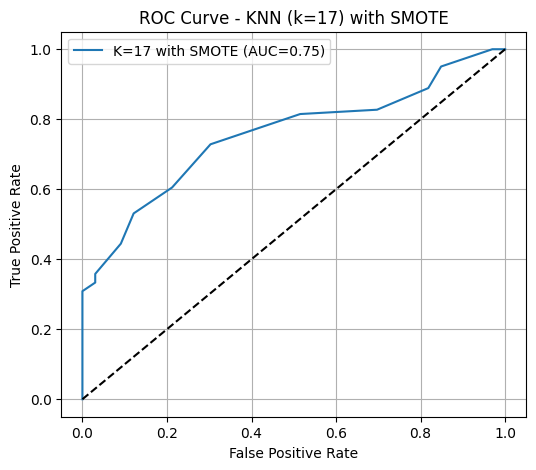


========================= KNN (k=18) with SMOTE =========================

 Classification Report for k=18 with SMOTE:

              precision    recall  f1-score   support

           0       0.44      0.85      0.58        33
           1       0.90      0.56      0.69        81

    accuracy                           0.64       114
   macro avg       0.67      0.70      0.63       114
weighted avg       0.77      0.64      0.66       114



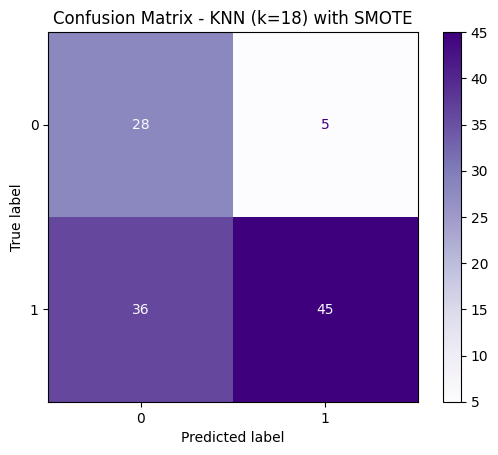

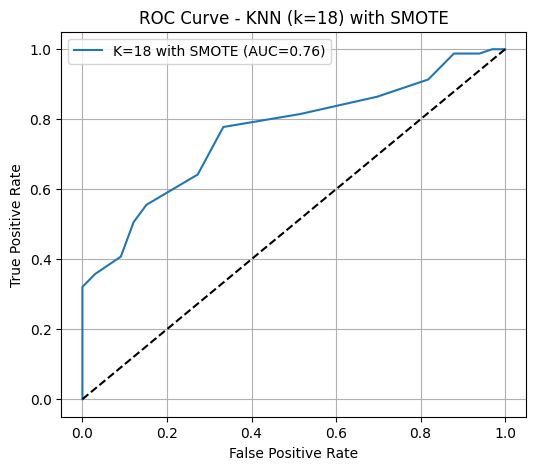


========================= KNN (k=19) with SMOTE =========================

 Classification Report for k=19 with SMOTE:

              precision    recall  f1-score   support

           0       0.45      0.79      0.57        33
           1       0.88      0.60      0.72        81

    accuracy                           0.66       114
   macro avg       0.66      0.70      0.64       114
weighted avg       0.75      0.66      0.67       114



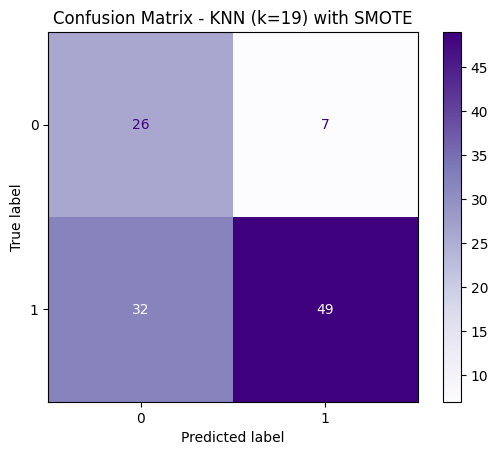

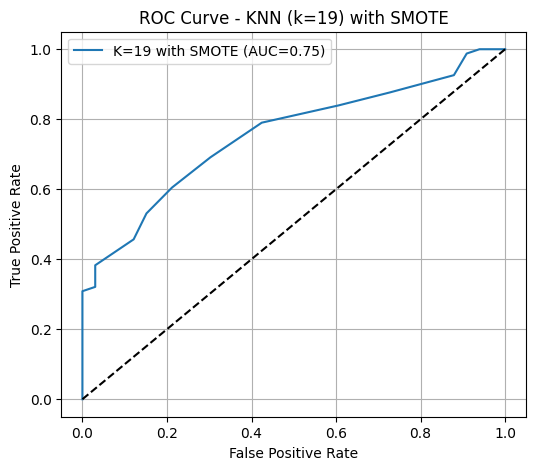


========================= KNN (k=20) with SMOTE =========================

 Classification Report for k=20 with SMOTE:

              precision    recall  f1-score   support

           0       0.45      0.82      0.58        33
           1       0.89      0.59      0.71        81

    accuracy                           0.66       114
   macro avg       0.67      0.71      0.65       114
weighted avg       0.76      0.66      0.67       114



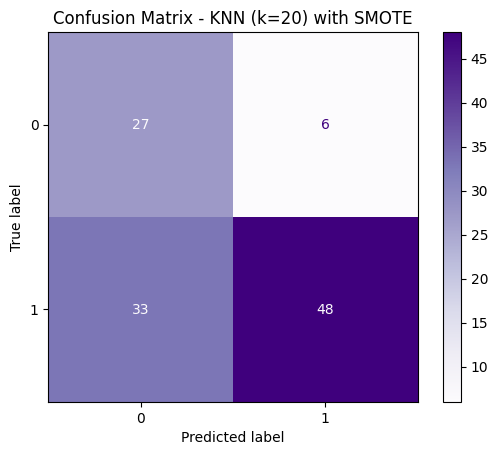

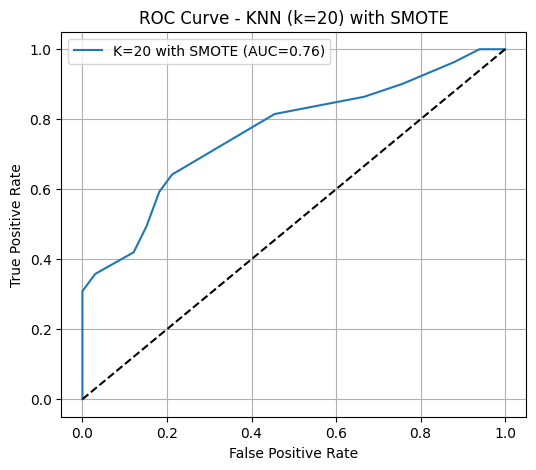


 KNN with SMOTE Summary (k=2 to 20):

     k  accuracy    recall       auc
0    3  0.649123  0.654321  0.676394
1    7  0.640351  0.654321  0.693416
2    5  0.622807  0.629630  0.677516
3    9  0.622807  0.617284  0.695473
4   15  0.666667  0.617284  0.750094
5   17  0.657895  0.604938  0.754396
6    2  0.631579  0.604938  0.675458
7   13  0.614035  0.604938  0.722222
8   19  0.657895  0.604938  0.754209
9    8  0.614035  0.604938  0.695847
10  20  0.657895  0.592593  0.762439
11  11  0.587719  0.592593  0.683315
12  16  0.649123  0.567901  0.753835
13   6  0.596491  0.567901  0.683128
14  10  0.596491  0.567901  0.687243
15  14  0.631579  0.567901  0.733259
16  18  0.640351  0.555556  0.762065
17   4  0.578947  0.530864  0.699401
18  12  0.578947  0.518519  0.698653


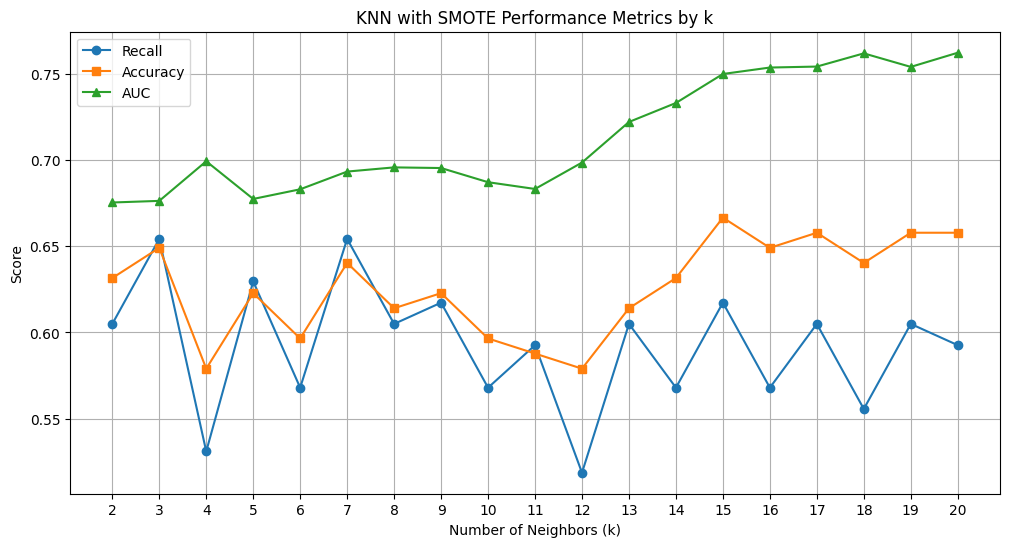


 Best k based on Recall: 3.0 (Recall = 0.6543, Accuracy = 0.6491, AUC = 0.6764)


/tmp/ipython-input-27-1853760113.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_data, palette="Set2")
/tmp/ipython-input-27-1853760113.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


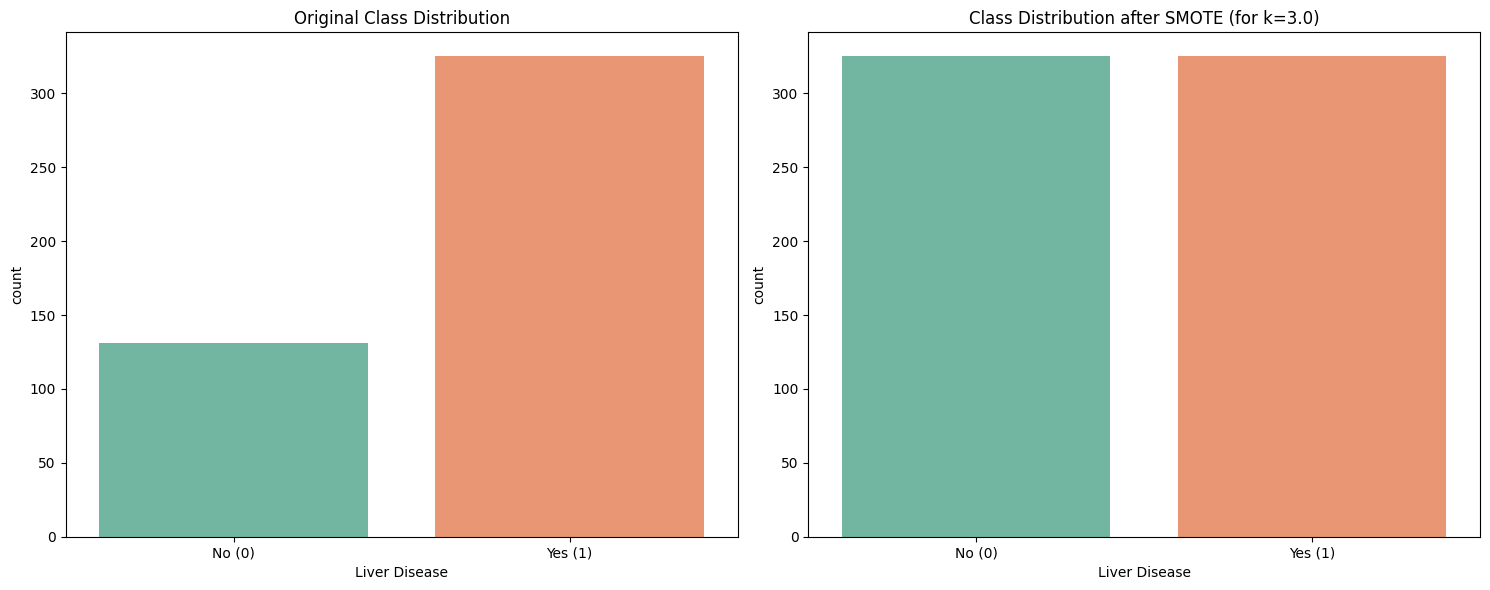

Original class distribution: [131 325]
After SMOTE: [325 325]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Select numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Store performance metrics
knn_results = []

for k in range(2, 21):
    print(f"\n========================= KNN (k={k}) with SMOTE =========================\n")

    # Pipeline with SMOTE
    knn_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train
    knn_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = knn_pipeline.predict(X_val[numerical_features])
    y_val_proba = knn_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Classification Report
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    print(f" Classification Report for k={k} with SMOTE:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    # Safely extract recall for class 1
    recall_key = next((key for key in report.keys() if str(key) in ['1', '1.0']), None)
    recall = report.get(recall_key, {}).get('recall', 0)

    accuracy = accuracy_score(y_val, y_val_pred)

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    knn_results.append({
        'k': k,
        'accuracy': accuracy,
        'recall': recall,
        'auc': roc_auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix - KNN (k={k}) with SMOTE")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'K={k} with SMOTE (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - KNN (k={k}) with SMOTE')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Results Summary
knn_df = pd.DataFrame(knn_results)
print("\n KNN with SMOTE Summary (k=2 to 20):\n")
print(knn_df.sort_values(by='recall', ascending=False).reset_index(drop=True))

# Plot metrics vs k
plt.figure(figsize=(12, 6))
plt.plot(knn_df['k'], knn_df['recall'], 'o-', label='Recall')
plt.plot(knn_df['k'], knn_df['accuracy'], 's-', label='Accuracy')
plt.plot(knn_df['k'], knn_df['auc'], '^-', label='AUC')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN with SMOTE Performance Metrics by k')
plt.grid(True)
plt.legend()
plt.xticks(range(2, 21))
plt.show()

# Best K selection
best_k_row = knn_df.loc[knn_df['recall'].idxmax()]
best_k = best_k_row['k']
print(f"\n Best k based on Recall: {best_k} (Recall = {best_k_row['recall']:.4f}, Accuracy = {best_k_row['accuracy']:.4f}, AUC = {best_k_row['auc']:.4f})")

# Visualizing SMOTE effect for best k
def visualize_smote_effect(X_train_data, y_train_data, best_k_value):
    plt.figure(figsize=(15, 6))

    # Original class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train_data, palette="Set2")
    plt.title("Original Class Distribution")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    # Preprocessing
    imputer = SimpleImputer(strategy='median')
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X_train_data[numerical_features]))

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_processed, y_train_data)

    # Resampled class distribution
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_resampled, palette="Set2")
    plt.title(f"Class Distribution after SMOTE (for k={best_k_value})")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    plt.tight_layout()
    plt.show()

    print(f"Original class distribution: {np.bincount(y_train_data)}")
    print(f"After SMOTE: {np.bincount(y_resampled)}")

# Visualize for best k
visualize_smote_effect(X_train, y_train, best_k)


### Decision Tree


 Classification Report - Decision Tree (with SMOTE):

              precision    recall  f1-score   support

           0       0.44      0.52      0.47        33
           1       0.79      0.73      0.76        81

    accuracy                           0.67       114
   macro avg       0.61      0.62      0.61       114
weighted avg       0.69      0.67      0.67       114

 Recall (class 1 - Liver Disease): 0.7284
 Accuracy: 0.6667


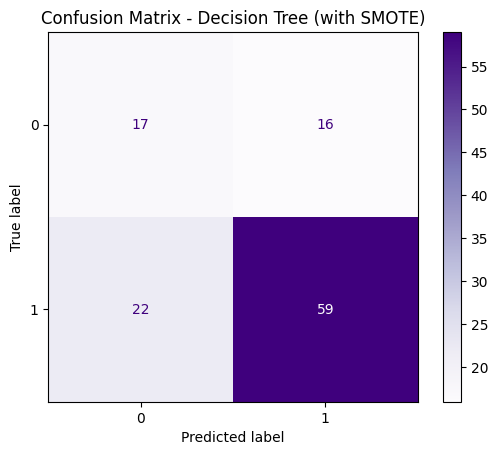

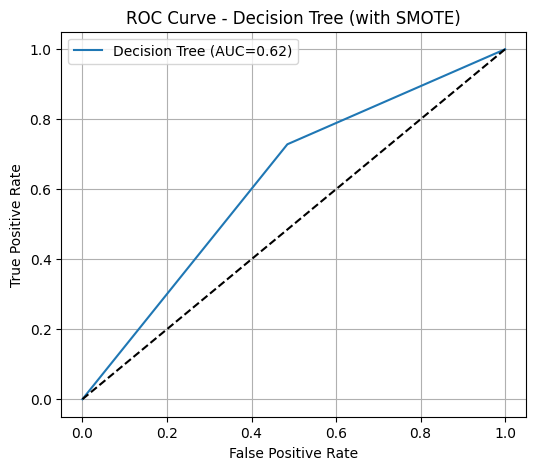

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # imblearn's Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Select numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Define the pipeline with SMOTE
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Train the model
dt_pipeline.fit(X_train[numerical_features], y_train)

# Predict on validation set
y_val_pred = dt_pipeline.predict(X_val[numerical_features])
y_val_proba = dt_pipeline.predict_proba(X_val[numerical_features])[:, 1]

# Classification Report
report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
print("\n Classification Report - Decision Tree (with SMOTE):\n")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Safely extract recall and accuracy
recall_key = next((key for key in report.keys() if str(key) in ['1', '1.0']), None)
recall_class1 = report.get(recall_key, {}).get('recall', 0)
accuracy = accuracy_score(y_val, y_val_pred)

print(f" Recall (class 1 - Liver Disease): {recall_class1:.4f}")
print(f" Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree (with SMOTE)")
plt.grid(False)
plt.show()

# ROC & AUC
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree (with SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


### Random Forest


 Evaluating Random Forest with Varying Trees (SMOTE applied):


 Random Forest with 10 Trees:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        33
           1       0.78      0.81      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.62      0.62       114
weighted avg       0.69      0.70      0.70       114

 Recall (class 1): 0.8148
 Accuracy: 0.7018
 AUC: 0.7398


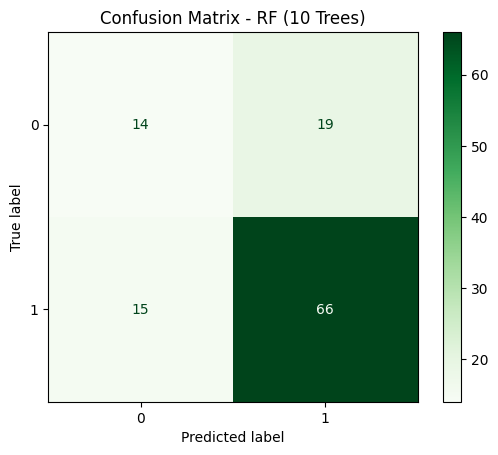

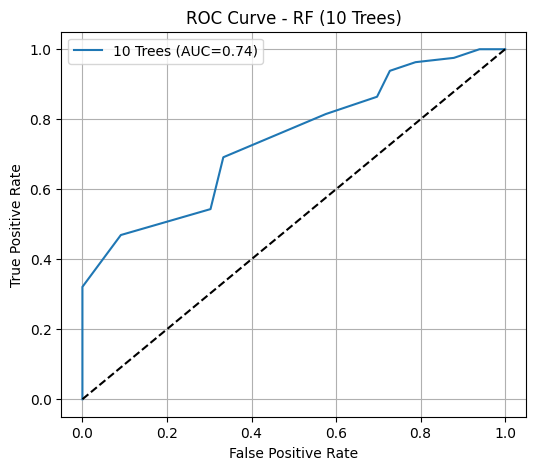


 Random Forest with 20 Trees:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.79      0.81      0.80        81

    accuracy                           0.71       114
   macro avg       0.64      0.63      0.64       114
weighted avg       0.70      0.71      0.71       114

 Recall (class 1): 0.8148
 Accuracy: 0.7105
 AUC: 0.7512


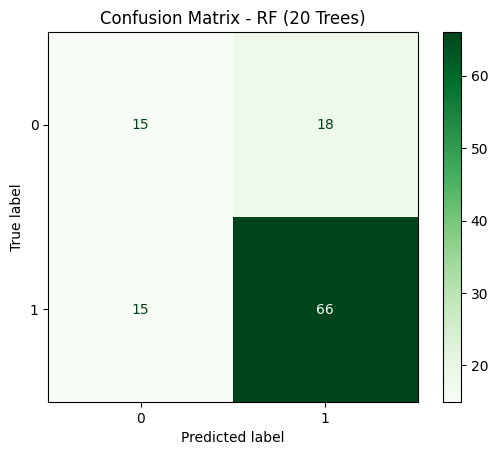

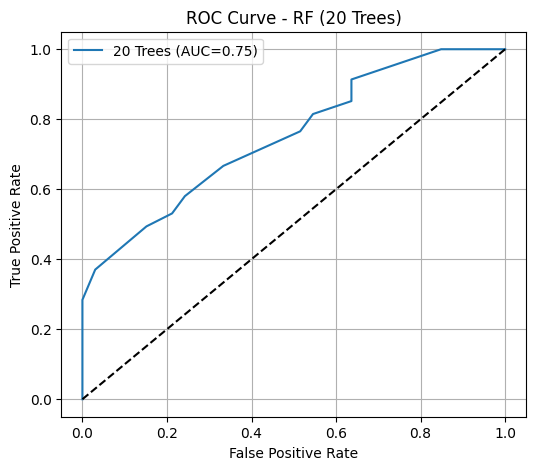


 Random Forest with 30 Trees:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        33
           1       0.79      0.83      0.81        81

    accuracy                           0.72       114
   macro avg       0.65      0.64      0.65       114
weighted avg       0.71      0.72      0.71       114

 Recall (class 1): 0.8272
 Accuracy: 0.7193
 AUC: 0.7675


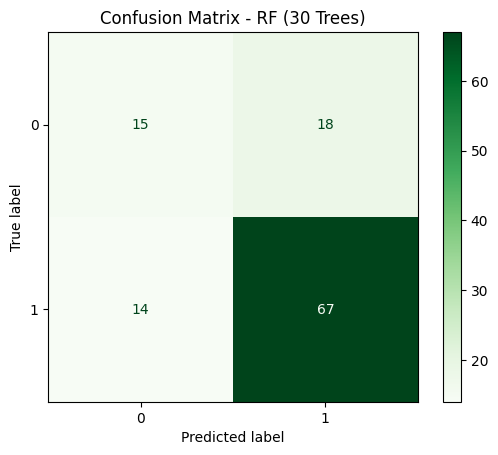

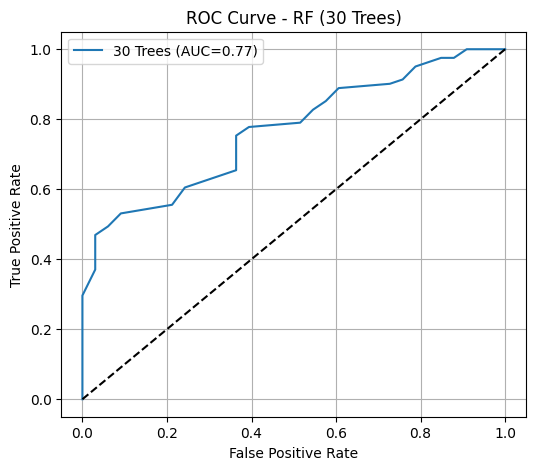


 Random Forest with 40 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7576


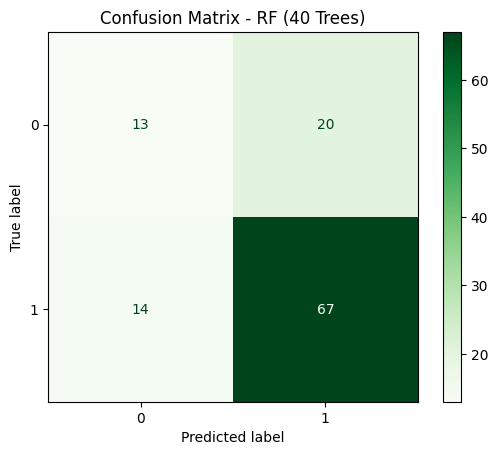

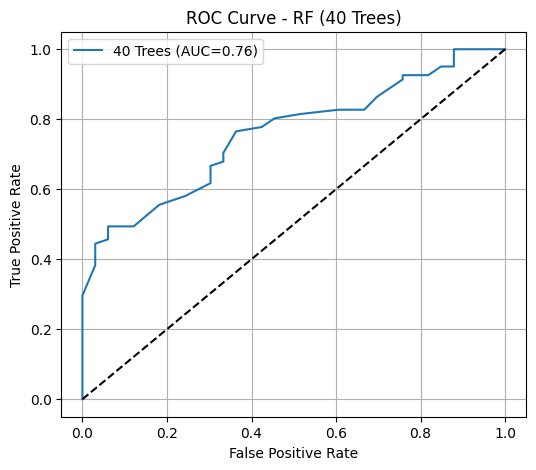


 Random Forest with 50 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7694


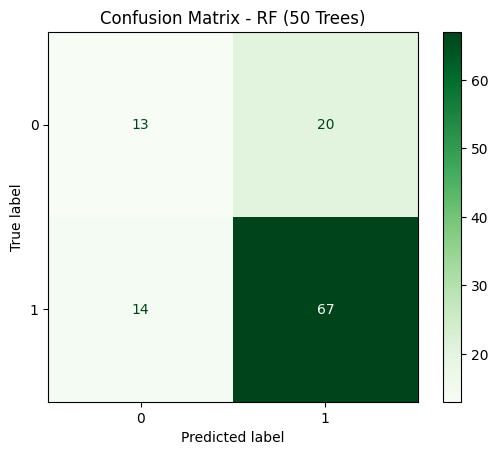

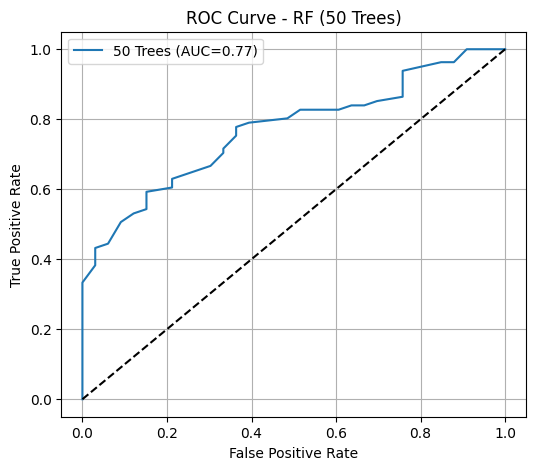


 Random Forest with 60 Trees:
              precision    recall  f1-score   support

           0       0.46      0.36      0.41        33
           1       0.76      0.83      0.79        81

    accuracy                           0.69       114
   macro avg       0.61      0.60      0.60       114
weighted avg       0.67      0.69      0.68       114

 Recall (class 1): 0.8272
 Accuracy: 0.6930
 AUC: 0.7643


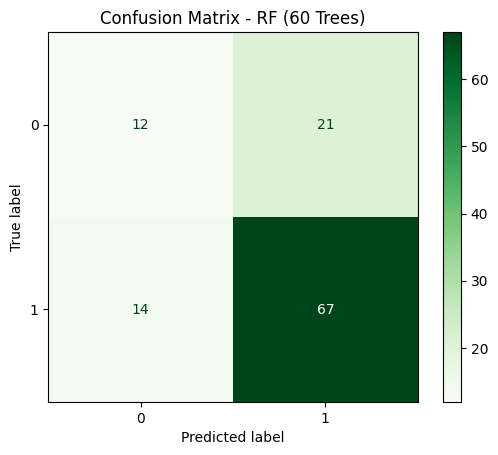

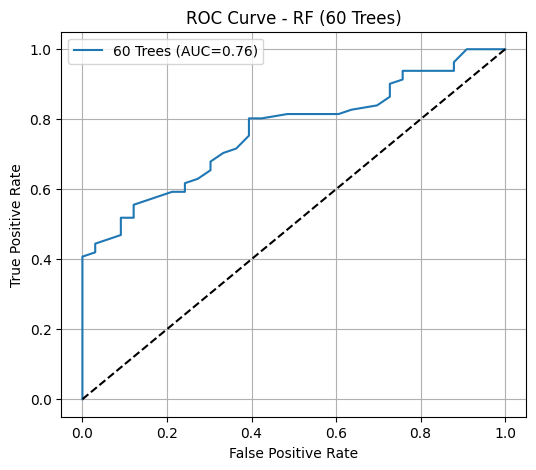


 Random Forest with 70 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7673


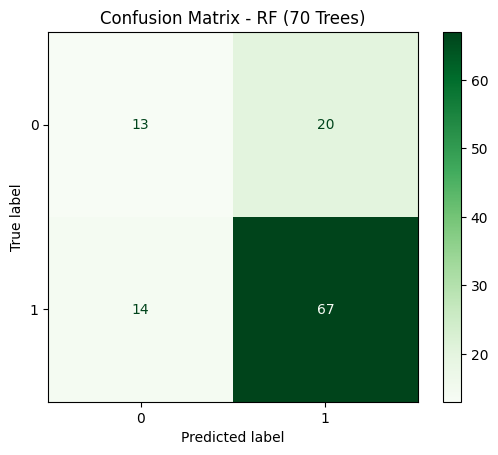

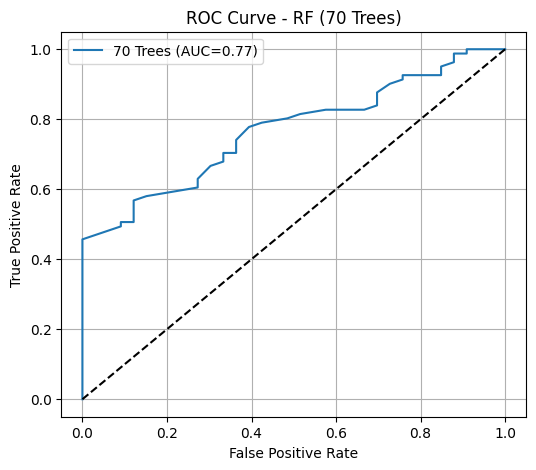


 Random Forest with 80 Trees:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        33
           1       0.78      0.83      0.80        81

    accuracy                           0.71       114
   macro avg       0.64      0.63      0.63       114
weighted avg       0.70      0.71      0.70       114

 Recall (class 1): 0.8272
 Accuracy: 0.7105
 AUC: 0.7613


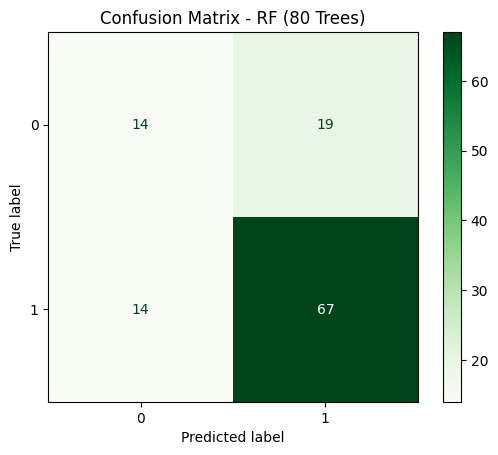

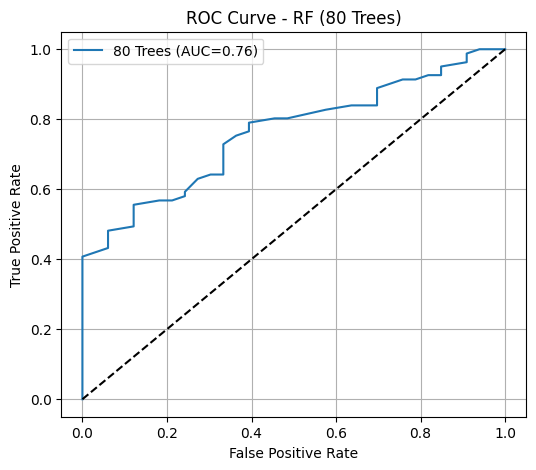


 Random Forest with 90 Trees:
              precision    recall  f1-score   support

           0       0.46      0.39      0.43        33
           1       0.77      0.81      0.79        81

    accuracy                           0.69       114
   macro avg       0.62      0.60      0.61       114
weighted avg       0.68      0.69      0.68       114

 Recall (class 1): 0.8148
 Accuracy: 0.6930
 AUC: 0.7535


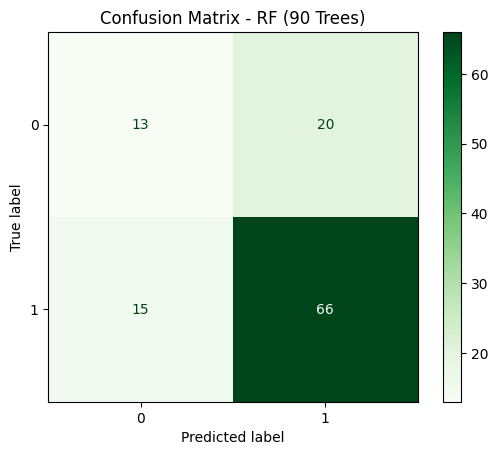

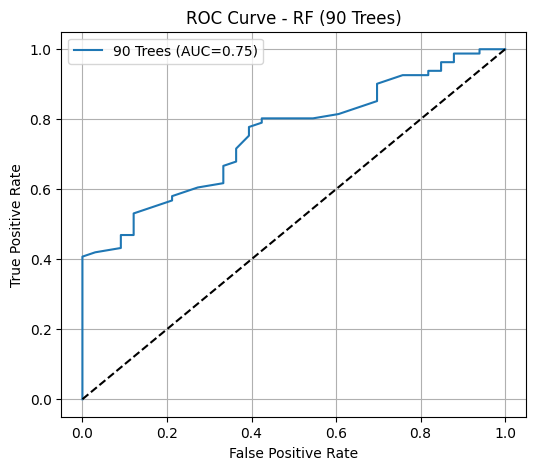


 Random Forest with 100 Trees:
              precision    recall  f1-score   support

           0       0.46      0.39      0.43        33
           1       0.77      0.81      0.79        81

    accuracy                           0.69       114
   macro avg       0.62      0.60      0.61       114
weighted avg       0.68      0.69      0.68       114

 Recall (class 1): 0.8148
 Accuracy: 0.6930
 AUC: 0.7529


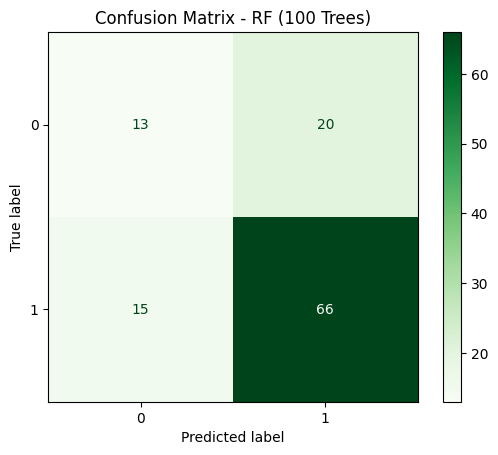

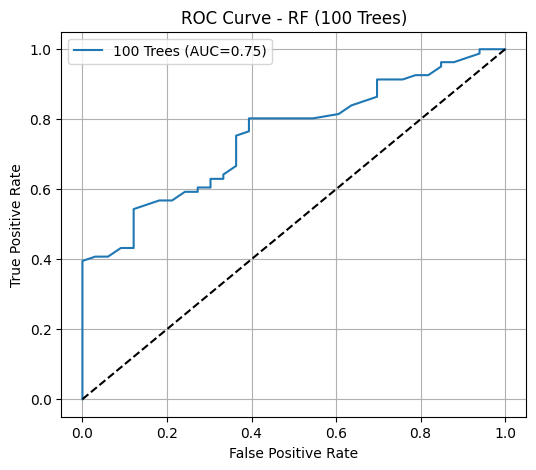


 Best Random Forest Model:
 Trees: 30
 Recall: 0.8272
 Accuracy: 0.7193
 AUC: 0.7675


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn's pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Select numerical features
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

rf_results = []

print("\n Evaluating Random Forest with Varying Trees (SMOTE applied):\n")
for n_trees in range(10, 110, 10):
    # Build imblearn pipeline with SMOTE
    rf_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=n_trees, class_weight='balanced', random_state=42))
    ])

    # Train
    rf_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = rf_pipeline.predict(X_val[numerical_features])
    y_val_proba = rf_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)

    # Safe recall extraction
    recall_key = next((key for key in report.keys() if str(key) in ['1', '1.0']), None)
    recall = report.get(recall_key, {}).get('recall', 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    rf_results.append({
        'n_trees': n_trees,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': rf_pipeline
    })

    # Output
    print(f"\n Random Forest with {n_trees} Trees:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix - RF ({n_trees} Trees)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_trees} Trees (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - RF ({n_trees} Trees)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best model based on recall
best_rf = max(rf_results, key=lambda x: x['recall'])

print("\n Best Random Forest Model:")
print(f" Trees: {best_rf['n_trees']}")
print(f" Recall: {best_rf['recall']:.4f}")
print(f" Accuracy: {best_rf['accuracy']:.4f}")
print(f" AUC: {best_rf['auc']:.4f}")



 Evaluating Random Forest with Varying Trees (SMOTE applied inside pipeline):


 Random Forest with 10 Trees:
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        33
           1       0.78      0.81      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.62      0.62       114
weighted avg       0.69      0.70      0.70       114

 Recall (class 1): 0.8148
 Accuracy: 0.7018
 AUC: 0.7398


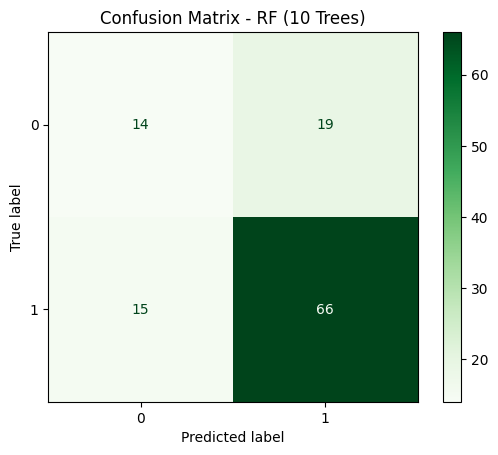

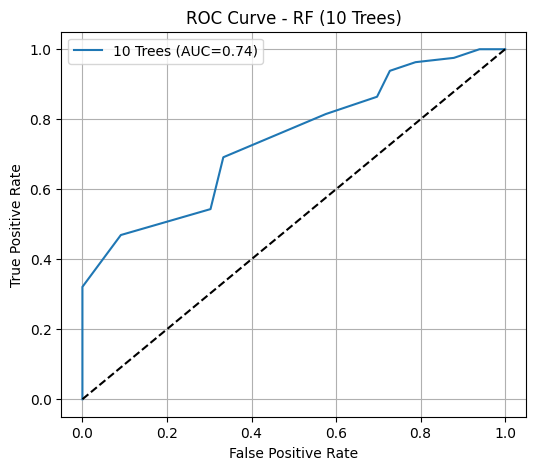


 Random Forest with 20 Trees:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.79      0.81      0.80        81

    accuracy                           0.71       114
   macro avg       0.64      0.63      0.64       114
weighted avg       0.70      0.71      0.71       114

 Recall (class 1): 0.8148
 Accuracy: 0.7105
 AUC: 0.7512


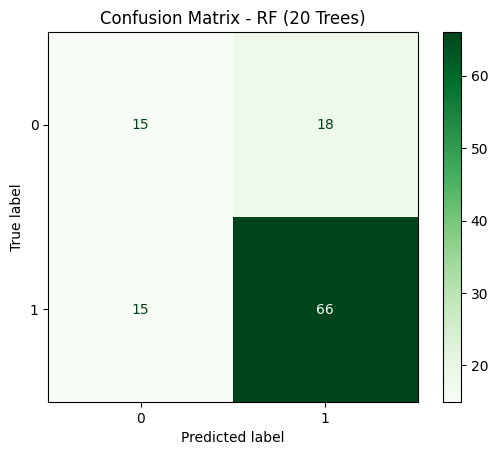

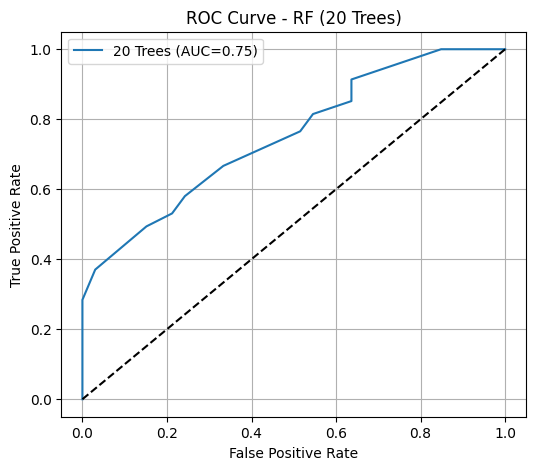


 Random Forest with 30 Trees:
              precision    recall  f1-score   support

           0       0.52      0.45      0.48        33
           1       0.79      0.83      0.81        81

    accuracy                           0.72       114
   macro avg       0.65      0.64      0.65       114
weighted avg       0.71      0.72      0.71       114

 Recall (class 1): 0.8272
 Accuracy: 0.7193
 AUC: 0.7675


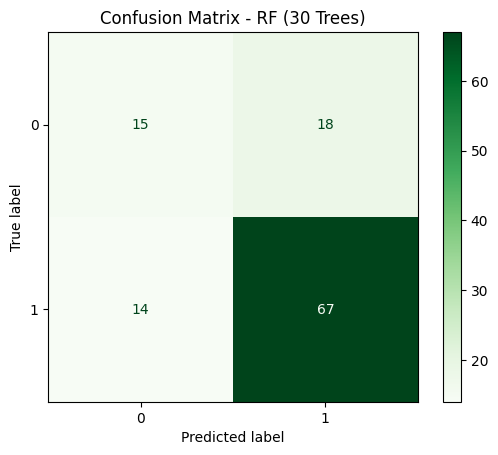

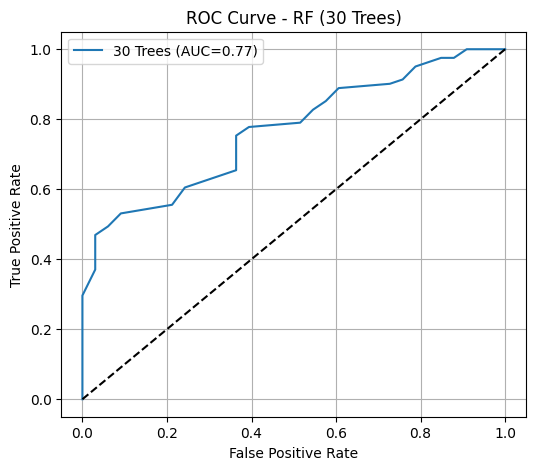


 Random Forest with 40 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7576


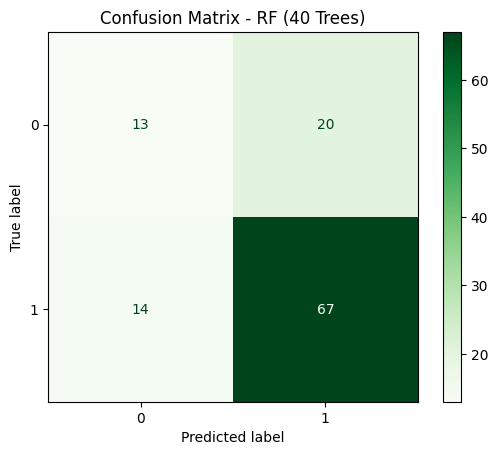

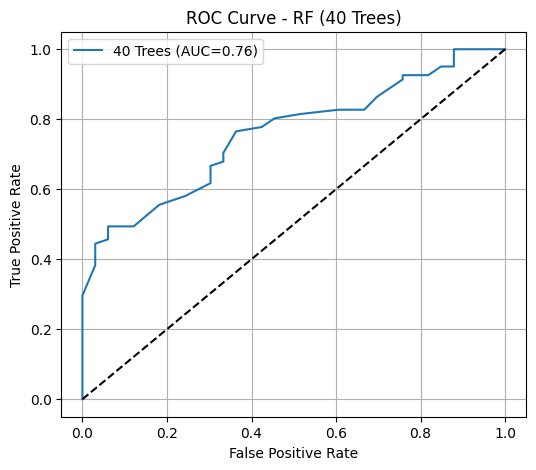


 Random Forest with 50 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7694


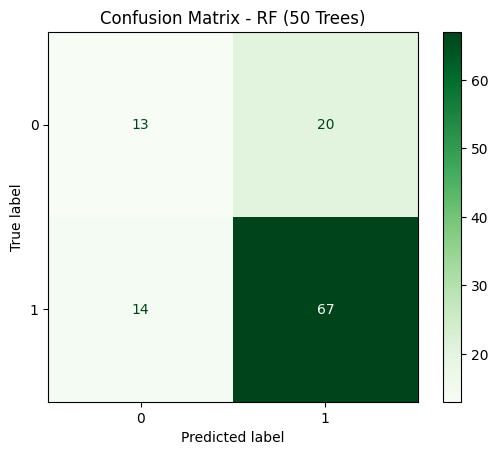

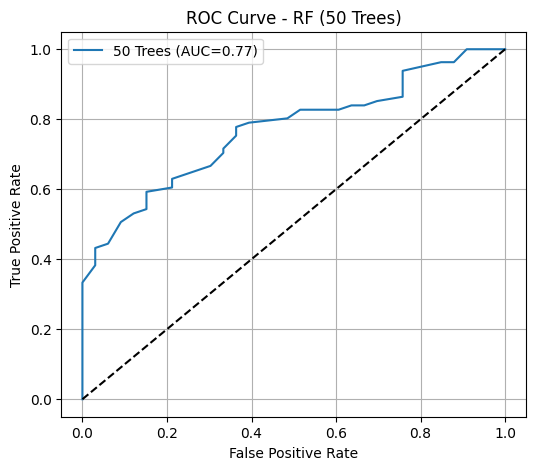


 Random Forest with 60 Trees:
              precision    recall  f1-score   support

           0       0.46      0.36      0.41        33
           1       0.76      0.83      0.79        81

    accuracy                           0.69       114
   macro avg       0.61      0.60      0.60       114
weighted avg       0.67      0.69      0.68       114

 Recall (class 1): 0.8272
 Accuracy: 0.6930
 AUC: 0.7643


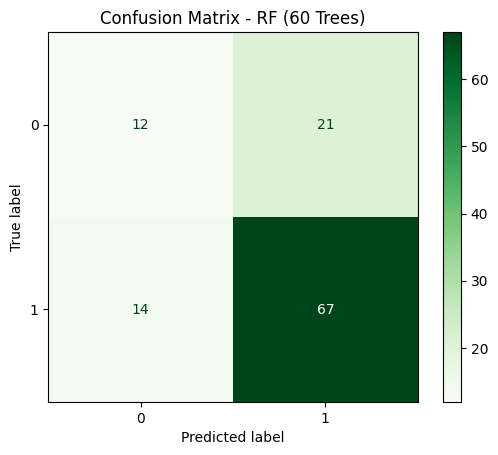

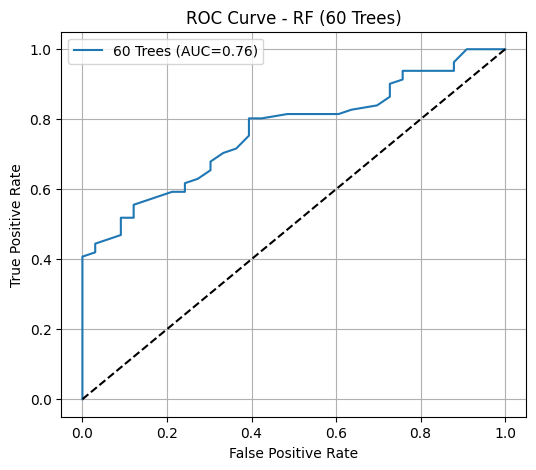


 Random Forest with 70 Trees:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        33
           1       0.77      0.83      0.80        81

    accuracy                           0.70       114
   macro avg       0.63      0.61      0.62       114
weighted avg       0.69      0.70      0.69       114

 Recall (class 1): 0.8272
 Accuracy: 0.7018
 AUC: 0.7673


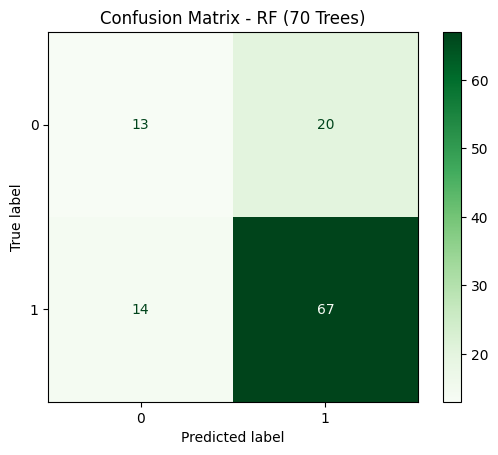

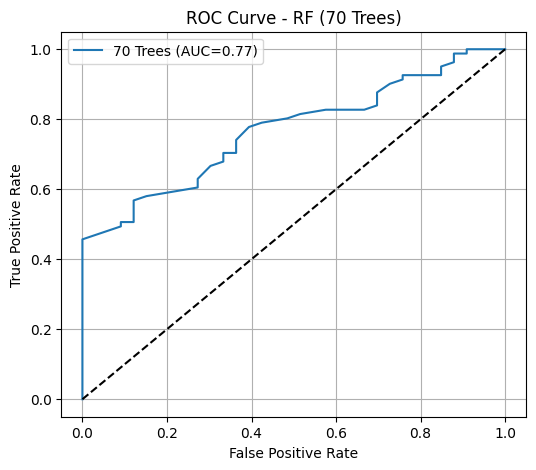


 Random Forest with 80 Trees:
              precision    recall  f1-score   support

           0       0.50      0.42      0.46        33
           1       0.78      0.83      0.80        81

    accuracy                           0.71       114
   macro avg       0.64      0.63      0.63       114
weighted avg       0.70      0.71      0.70       114

 Recall (class 1): 0.8272
 Accuracy: 0.7105
 AUC: 0.7613


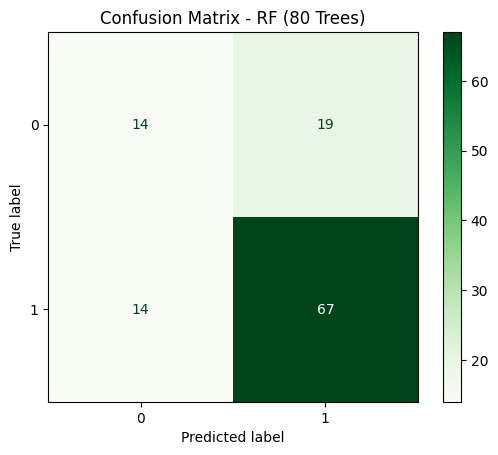

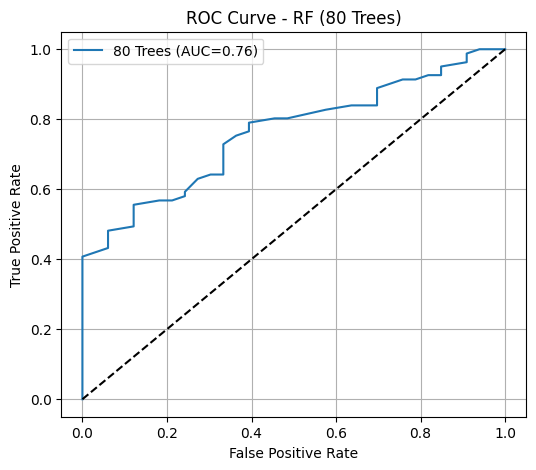


 Random Forest with 90 Trees:
              precision    recall  f1-score   support

           0       0.46      0.39      0.43        33
           1       0.77      0.81      0.79        81

    accuracy                           0.69       114
   macro avg       0.62      0.60      0.61       114
weighted avg       0.68      0.69      0.68       114

 Recall (class 1): 0.8148
 Accuracy: 0.6930
 AUC: 0.7535


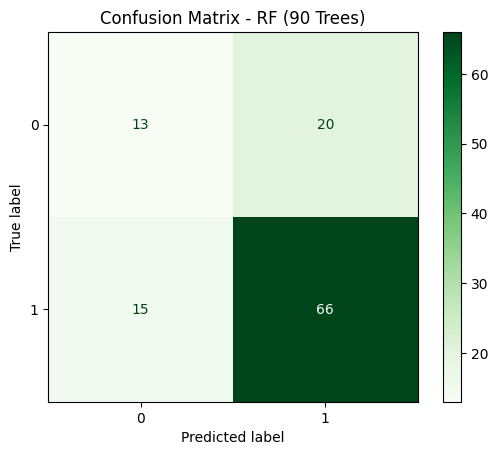

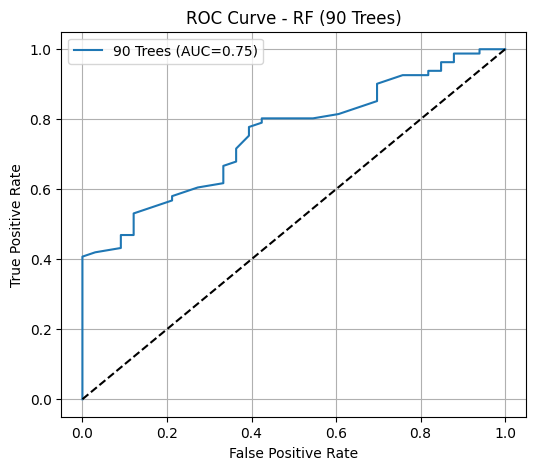


 Random Forest with 100 Trees:
              precision    recall  f1-score   support

           0       0.46      0.39      0.43        33
           1       0.77      0.81      0.79        81

    accuracy                           0.69       114
   macro avg       0.62      0.60      0.61       114
weighted avg       0.68      0.69      0.68       114

 Recall (class 1): 0.8148
 Accuracy: 0.6930
 AUC: 0.7529


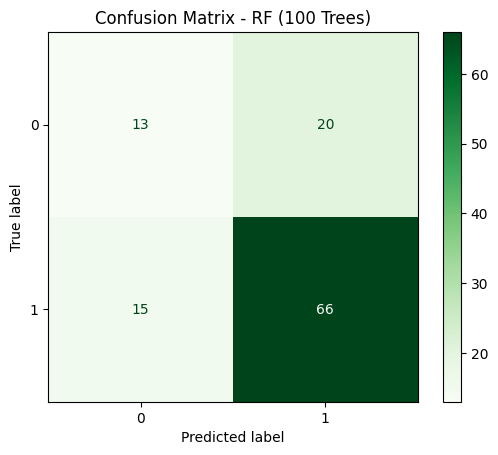

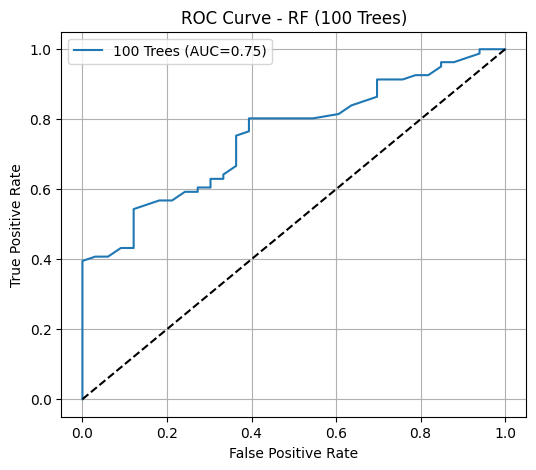


 Best Random Forest Model:
 Trees: 30
 Recall: 0.8272
 Accuracy: 0.7193
 AUC: 0.7675


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # Must use imblearn's pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

rf_results = []

print("\n Evaluating Random Forest with Varying Trees (SMOTE applied inside pipeline):\n")
for n_trees in range(10, 110, 10):
    # imblearn pipeline with SMOTE inside
    rf_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=n_trees, class_weight='balanced', random_state=42))
    ])

    # Train
    rf_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = rf_pipeline.predict(X_val[numerical_features])
    y_val_proba = rf_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    rf_results.append({
        'n_trees': n_trees,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': rf_pipeline
    })

    # Output
    print(f"\n Random Forest with {n_trees} Trees:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix - RF ({n_trees} Trees)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_trees} Trees (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - RF ({n_trees} Trees)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best model based on recall
best_rf = max(rf_results, key=lambda x: x['recall'])

print("\n Best Random Forest Model:")
print(f" Trees: {best_rf['n_trees']}")
print(f" Recall: {best_rf['recall']:.4f}")
print(f" Accuracy: {best_rf['accuracy']:.4f}")
print(f" AUC: {best_rf['auc']:.4f}")


 Evaluating AdaBoost with Varying Estimators (Using SMOTE inside pipeline):


 AdaBoost with 10 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        33
           1       0.89      0.70      0.79        81

    accuracy                           0.73       114
   macro avg       0.71      0.75      0.71       114
weighted avg       0.78      0.73      0.74       114

 Recall (class 1): 0.7037
 Accuracy: 0.7281
 AUC: 0.8028


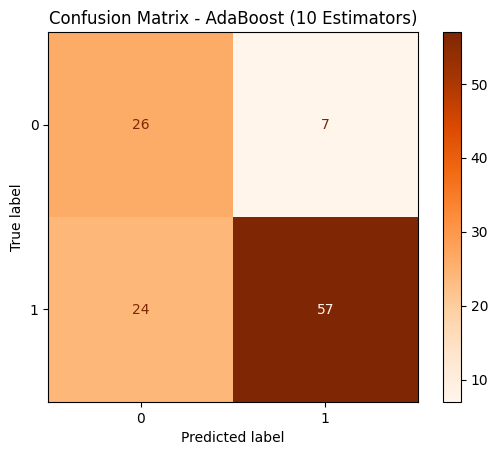

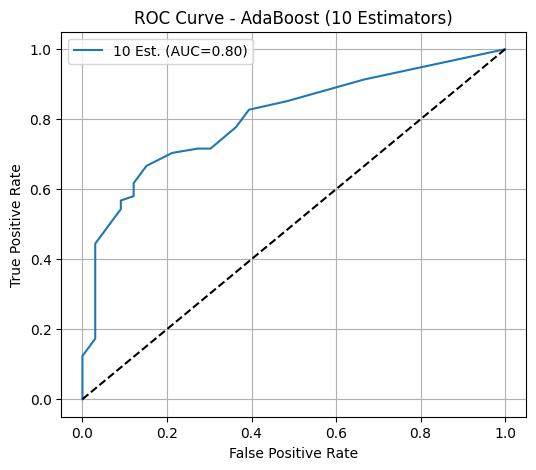


 AdaBoost with 20 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.79      0.63        33
           1       0.89      0.70      0.79        81

    accuracy                           0.73       114
   macro avg       0.71      0.75      0.71       114
weighted avg       0.78      0.73      0.74       114

 Recall (class 1): 0.7037
 Accuracy: 0.7281
 AUC: 0.8070


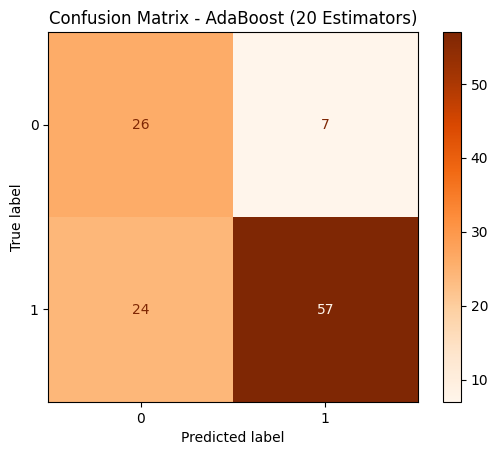

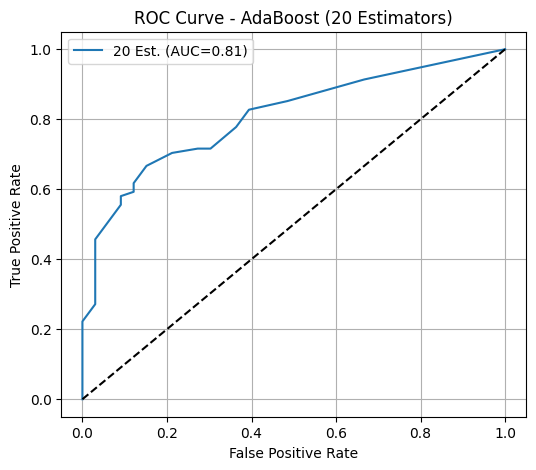


 AdaBoost with 30 Estimators:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        33
           1       0.86      0.78      0.82        81

    accuracy                           0.75       114
   macro avg       0.71      0.74      0.72       114
weighted avg       0.78      0.75      0.76       114

 Recall (class 1): 0.7778
 Accuracy: 0.7544
 AUC: 0.7969


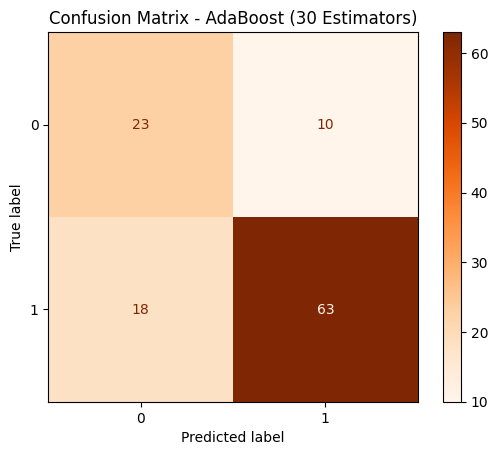

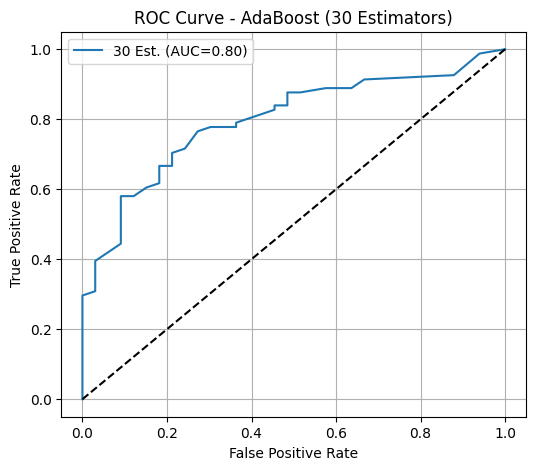


 AdaBoost with 40 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60        33
           1       0.86      0.74      0.79        81

    accuracy                           0.73       114
   macro avg       0.69      0.72      0.70       114
weighted avg       0.76      0.73      0.74       114

 Recall (class 1): 0.7407
 Accuracy: 0.7281
 AUC: 0.7948


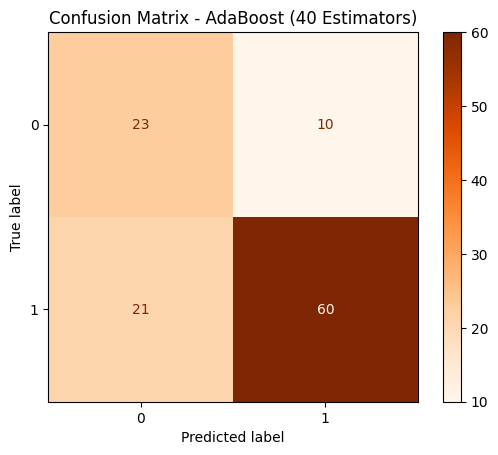

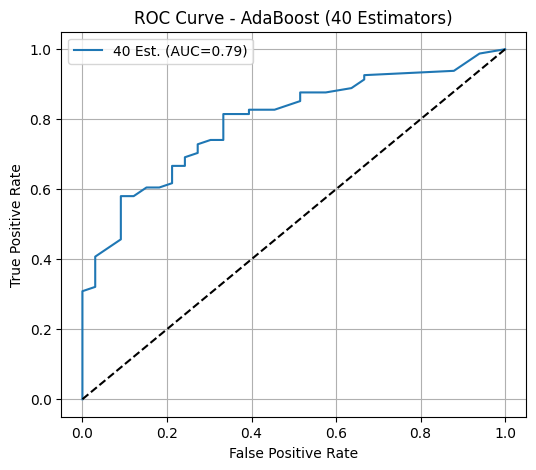


 AdaBoost with 50 Estimators:
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        33
           1       0.86      0.68      0.76        81

    accuracy                           0.69       114
   macro avg       0.67      0.70      0.67       114
weighted avg       0.75      0.69      0.71       114

 Recall (class 1): 0.6790
 Accuracy: 0.6930
 AUC: 0.7970


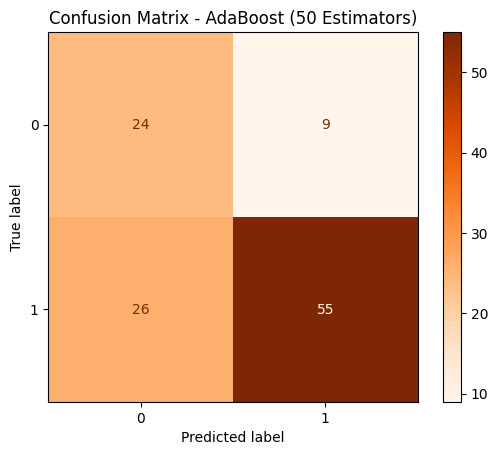

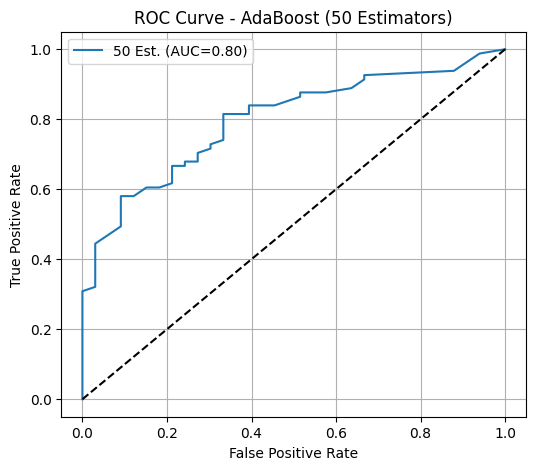


 AdaBoost with 60 Estimators:
              precision    recall  f1-score   support

           0       0.50      0.64      0.56        33
           1       0.83      0.74      0.78        81

    accuracy                           0.71       114
   macro avg       0.67      0.69      0.67       114
weighted avg       0.74      0.71      0.72       114

 Recall (class 1): 0.7407
 Accuracy: 0.7105
 AUC: 0.7871


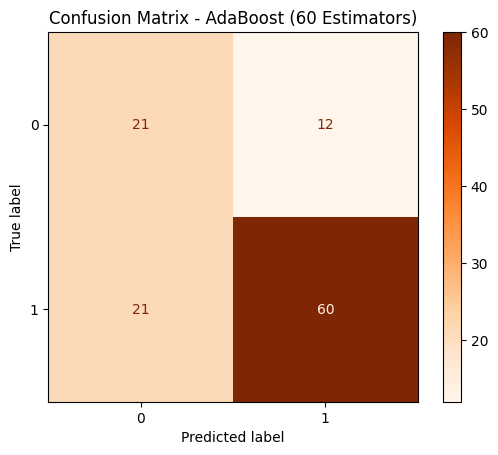

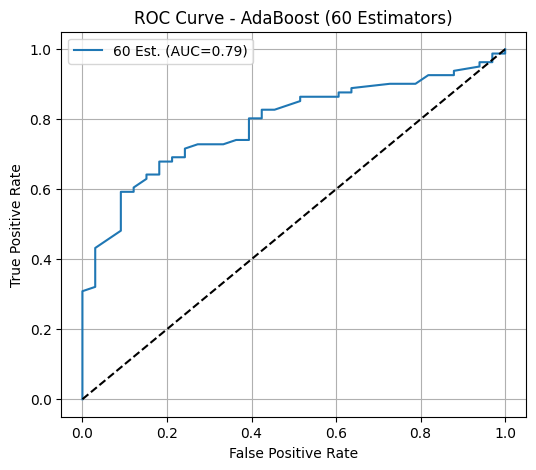


 AdaBoost with 70 Estimators:
              precision    recall  f1-score   support

           0       0.56      0.73      0.63        33
           1       0.87      0.77      0.82        81

    accuracy                           0.75       114
   macro avg       0.72      0.75      0.72       114
weighted avg       0.78      0.75      0.76       114

 Recall (class 1): 0.7654
 Accuracy: 0.7544
 AUC: 0.7774


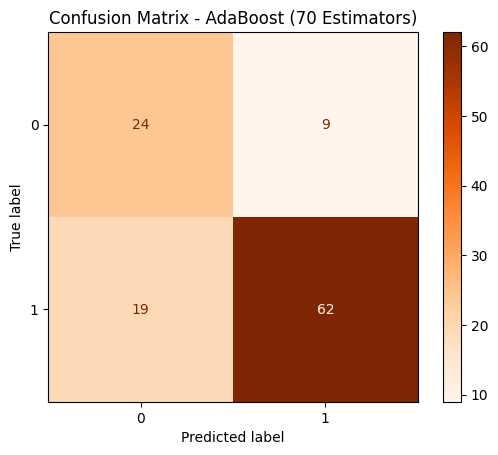

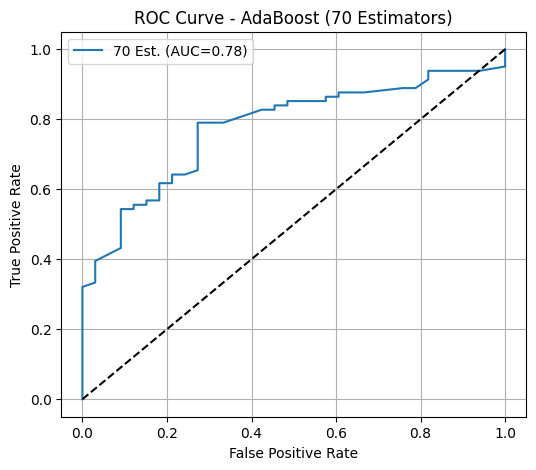


 AdaBoost with 80 Estimators:
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        33
           1       0.86      0.79      0.83        81

    accuracy                           0.76       114
   macro avg       0.72      0.74      0.73       114
weighted avg       0.78      0.76      0.77       114

 Recall (class 1): 0.7901
 Accuracy: 0.7632
 AUC: 0.7793


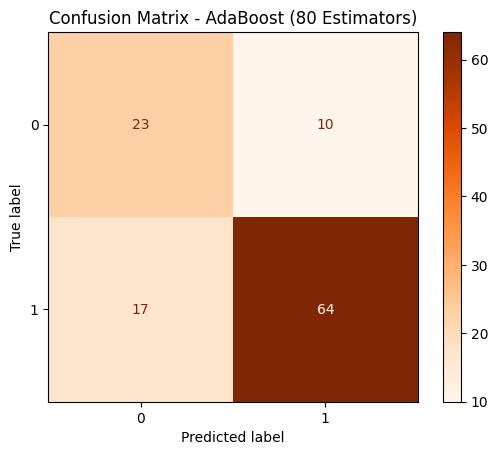

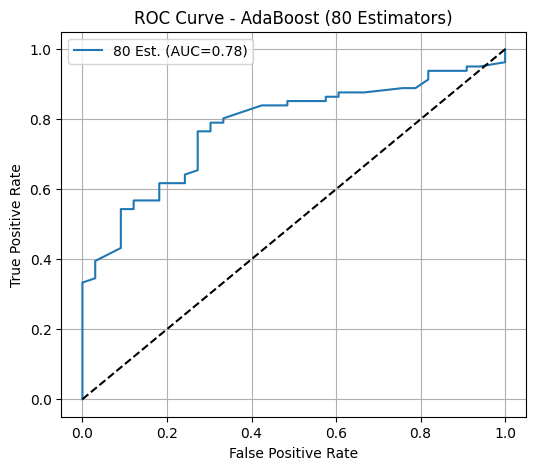


 AdaBoost with 90 Estimators:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61        33
           1       0.86      0.77      0.81        81

    accuracy                           0.75       114
   macro avg       0.70      0.73      0.71       114
weighted avg       0.77      0.75      0.75       114

 Recall (class 1): 0.7654
 Accuracy: 0.7456
 AUC: 0.7800


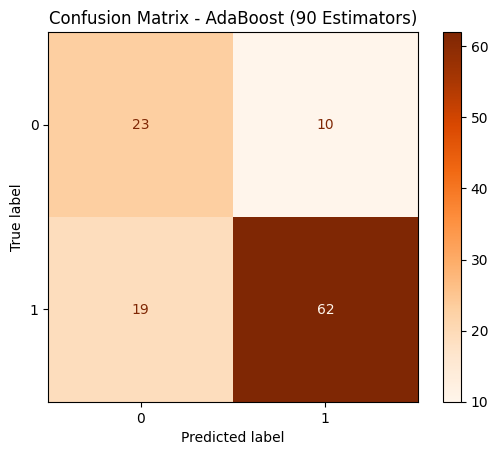

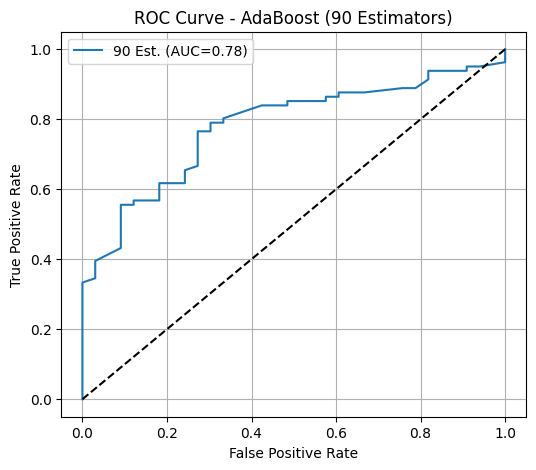


 AdaBoost with 100 Estimators:
              precision    recall  f1-score   support

           0       0.55      0.70      0.61        33
           1       0.86      0.77      0.81        81

    accuracy                           0.75       114
   macro avg       0.70      0.73      0.71       114
weighted avg       0.77      0.75      0.75       114

 Recall (class 1): 0.7654
 Accuracy: 0.7456
 AUC: 0.7843


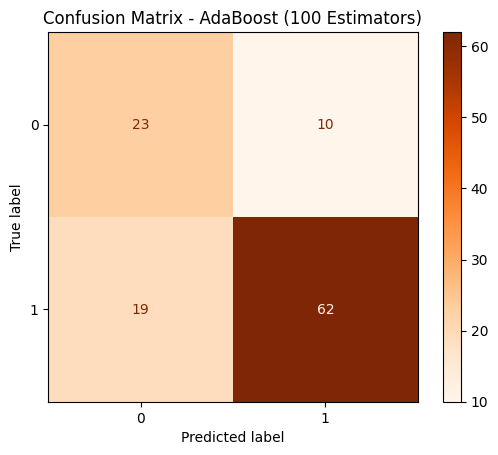

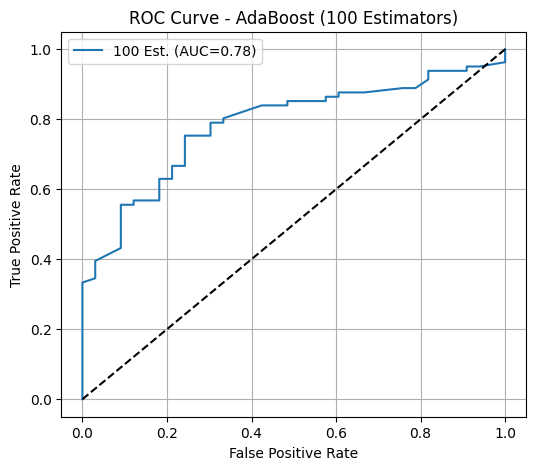


 Best AdaBoost Model:
 Estimators: 80
 Recall: 0.7901
 Accuracy: 0.7632
 AUC: 0.7793


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # Correct imblearn pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ab_results = []

print("\n Evaluating AdaBoost with Varying Estimators (Using SMOTE inside pipeline):\n")
for n_estimators in range(10, 110, 10):
    # imblearn pipeline
    ab_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('ab', AdaBoostClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Train
    ab_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = ab_pipeline.predict(X_val[numerical_features])
    y_val_proba = ab_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    ab_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': ab_pipeline
    })

    # Output
    print(f"\n AdaBoost with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Oranges')
    plt.title(f"Confusion Matrix - AdaBoost ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - AdaBoost ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best model based on recall
best_ab = max(ab_results, key=lambda x: x['recall'])

print("\n Best AdaBoost Model:")
print(f" Estimators: {best_ab['n_estimators']}")
print(f" Recall: {best_ab['recall']:.4f}")
print(f" Accuracy: {best_ab['accuracy']:.4f}")
print(f" AUC: {best_ab['auc']:.4f}")



 Evaluating XGBoost with Varying Estimators (Using SMOTE inside pipeline):


 XGBoost with 10 Estimators:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49        33
           1       0.79      0.80      0.80        81

    accuracy                           0.71       114
   macro avg       0.65      0.64      0.64       114
weighted avg       0.71      0.71      0.71       114

 Recall (class 1): 0.8025
 Accuracy: 0.7105
 AUC: 0.7606


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


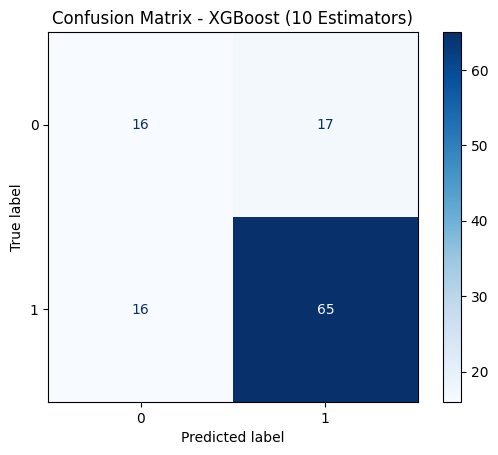

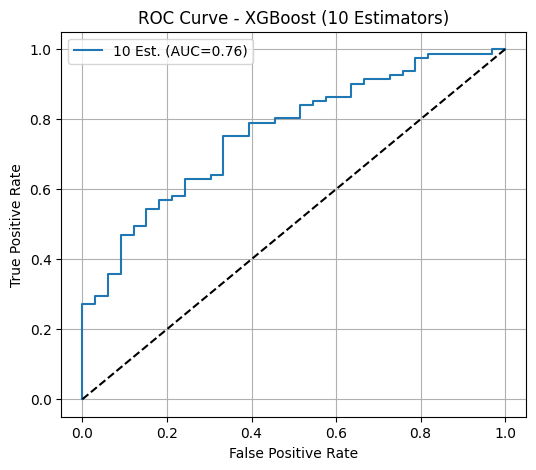


 XGBoost with 20 Estimators:
              precision    recall  f1-score   support

           0       0.50      0.45      0.48        33
           1       0.79      0.81      0.80        81

    accuracy                           0.71       114
   macro avg       0.64      0.63      0.64       114
weighted avg       0.70      0.71      0.71       114

 Recall (class 1): 0.8148
 Accuracy: 0.7105
 AUC: 0.7621


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


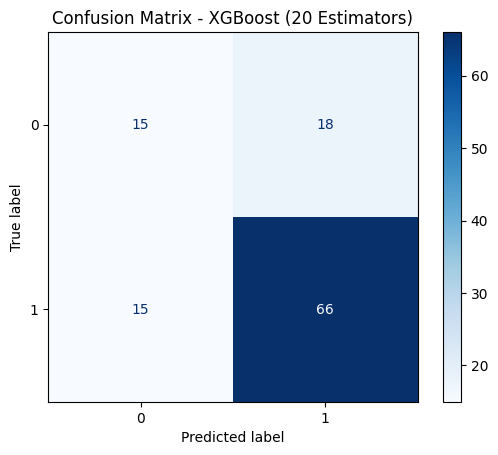

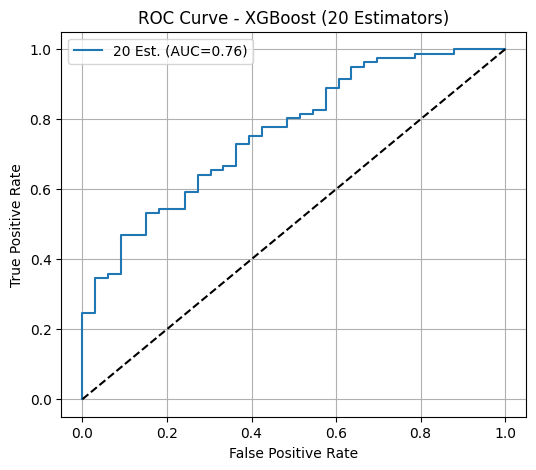


 XGBoost with 30 Estimators:
              precision    recall  f1-score   support

           0       0.54      0.42      0.47        33
           1       0.78      0.85      0.82        81

    accuracy                           0.73       114
   macro avg       0.66      0.64      0.65       114
weighted avg       0.71      0.73      0.72       114

 Recall (class 1): 0.8519
 Accuracy: 0.7281
 AUC: 0.7602


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


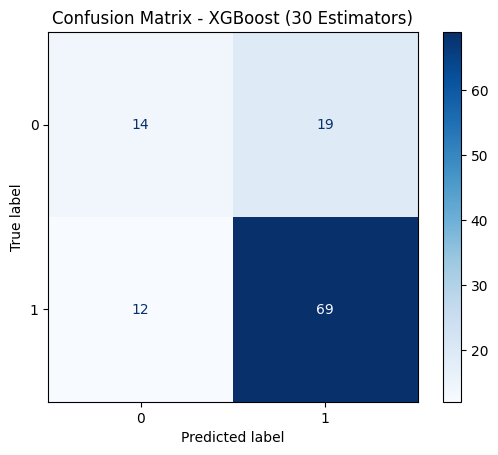

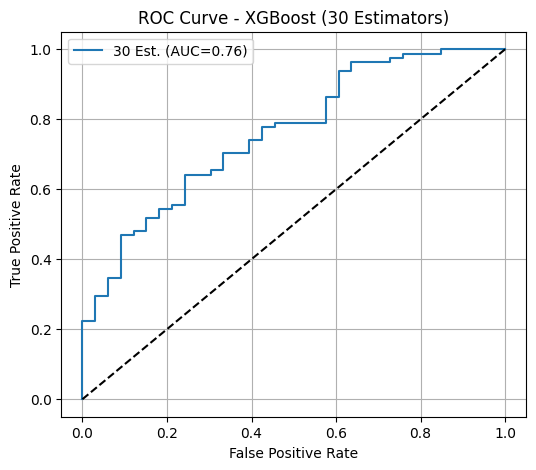

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 40 Estimators:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50        33
           1       0.79      0.89      0.84        81

    accuracy                           0.75       114
   macro avg       0.70      0.66      0.67       114
weighted avg       0.74      0.75      0.74       114

 Recall (class 1): 0.8889
 Accuracy: 0.7544
 AUC: 0.7602


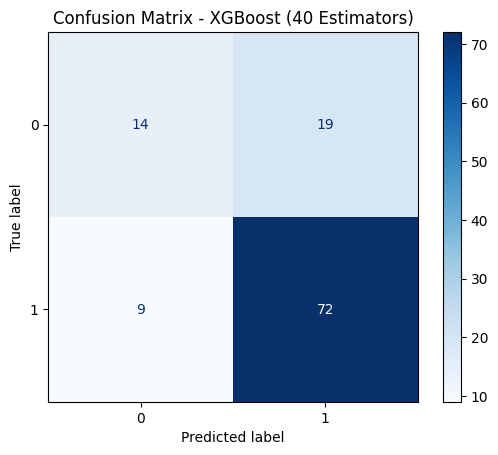

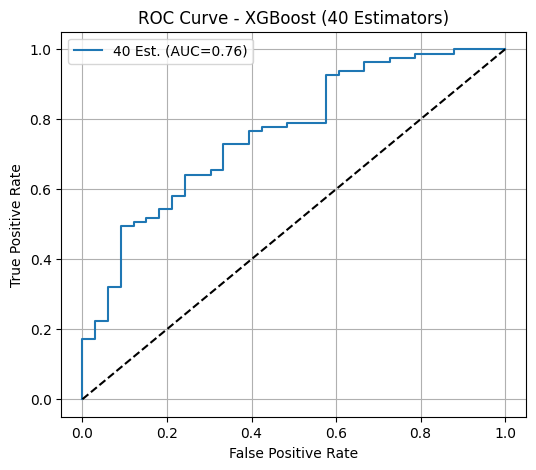

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 50 Estimators:
              precision    recall  f1-score   support

           0       0.64      0.42      0.51        33
           1       0.79      0.90      0.84        81

    accuracy                           0.76       114
   macro avg       0.71      0.66      0.68       114
weighted avg       0.75      0.76      0.75       114

 Recall (class 1): 0.9012
 Accuracy: 0.7632
 AUC: 0.7579


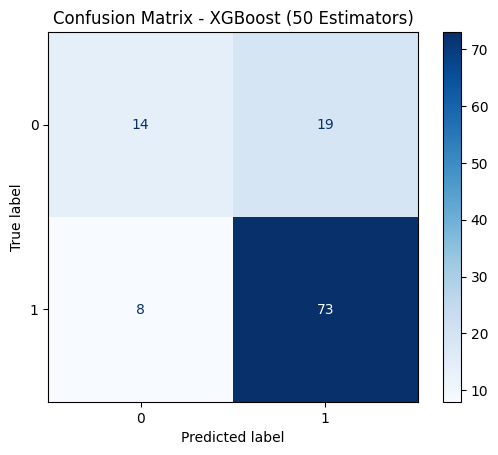

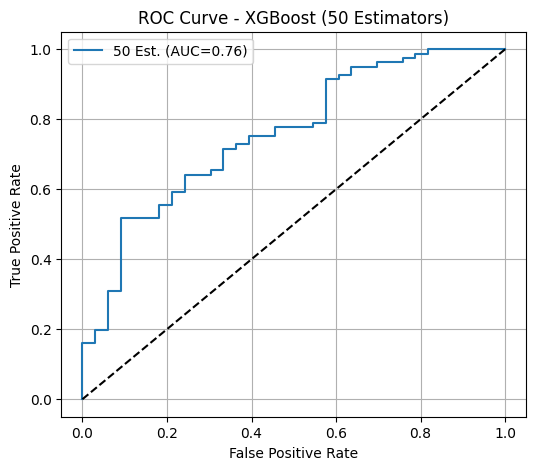

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 60 Estimators:
              precision    recall  f1-score   support

           0       0.54      0.39      0.46        33
           1       0.78      0.86      0.82        81

    accuracy                           0.73       114
   macro avg       0.66      0.63      0.64       114
weighted avg       0.71      0.73      0.71       114

 Recall (class 1): 0.8642
 Accuracy: 0.7281
 AUC: 0.7535


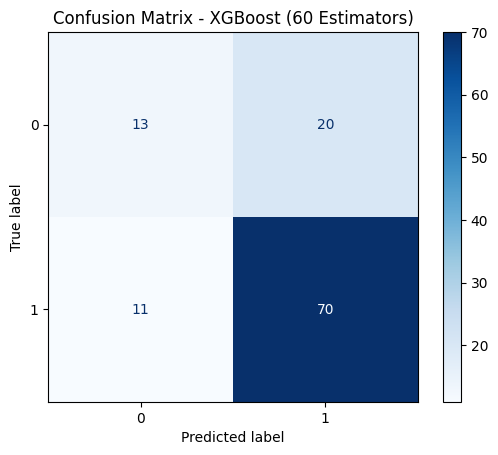

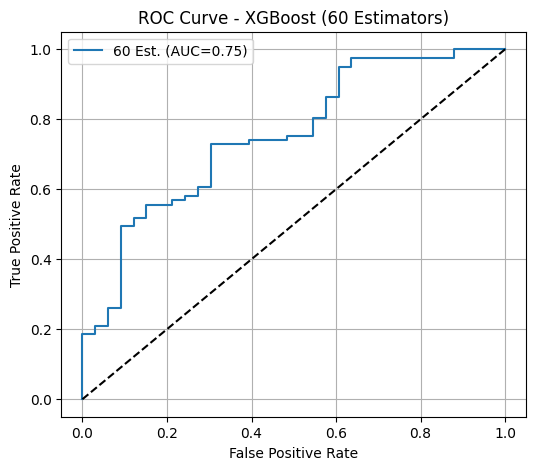

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 70 Estimators:
              precision    recall  f1-score   support

           0       0.57      0.39      0.46        33
           1       0.78      0.88      0.83        81

    accuracy                           0.74       114
   macro avg       0.67      0.64      0.64       114
weighted avg       0.72      0.74      0.72       114

 Recall (class 1): 0.8765
 Accuracy: 0.7368
 AUC: 0.7449


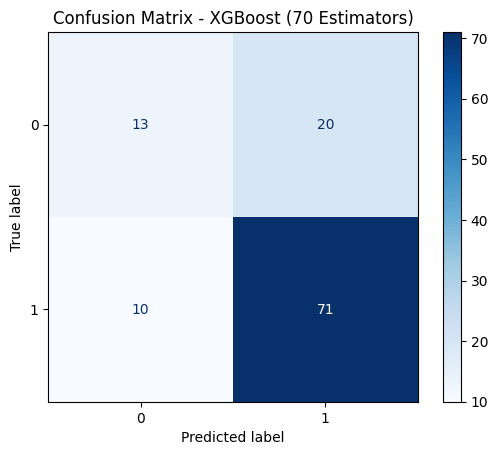

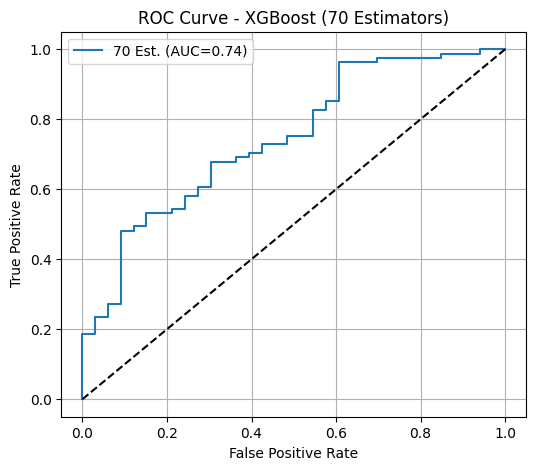

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 80 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        33
           1       0.78      0.85      0.81        81

    accuracy                           0.72       114
   macro avg       0.65      0.62      0.63       114
weighted avg       0.70      0.72      0.71       114

 Recall (class 1): 0.8519
 Accuracy: 0.7193
 AUC: 0.7460


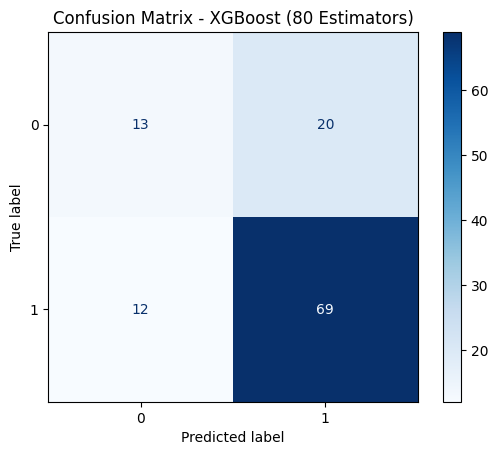

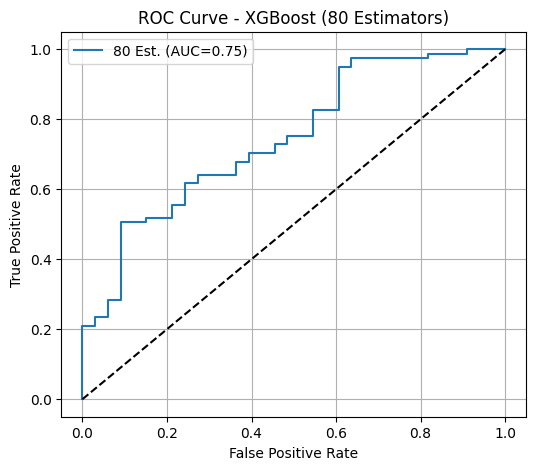

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 90 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        33
           1       0.78      0.85      0.81        81

    accuracy                           0.72       114
   macro avg       0.65      0.62      0.63       114
weighted avg       0.70      0.72      0.71       114

 Recall (class 1): 0.8519
 Accuracy: 0.7193
 AUC: 0.7411


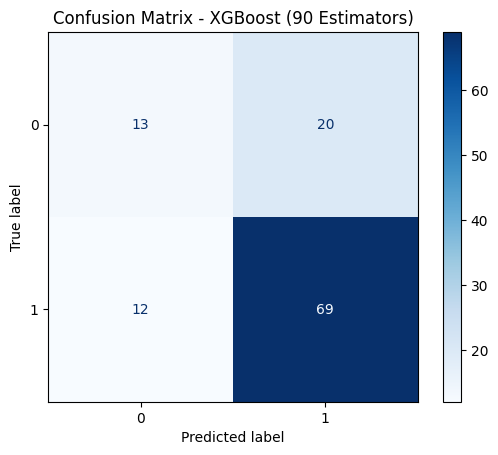

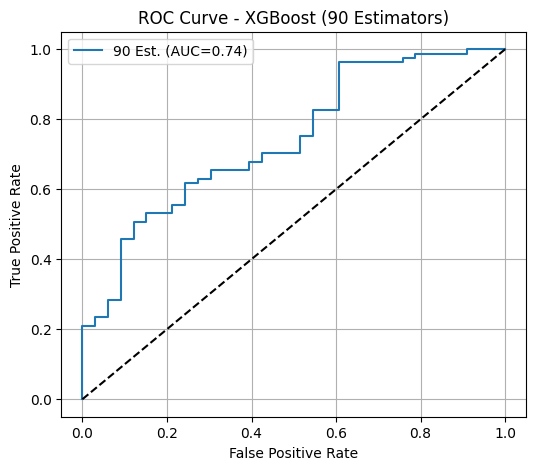

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:31:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 XGBoost with 100 Estimators:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        33
           1       0.78      0.85      0.81        81

    accuracy                           0.72       114
   macro avg       0.65      0.62      0.63       114
weighted avg       0.70      0.72      0.71       114

 Recall (class 1): 0.8519
 Accuracy: 0.7193
 AUC: 0.7411


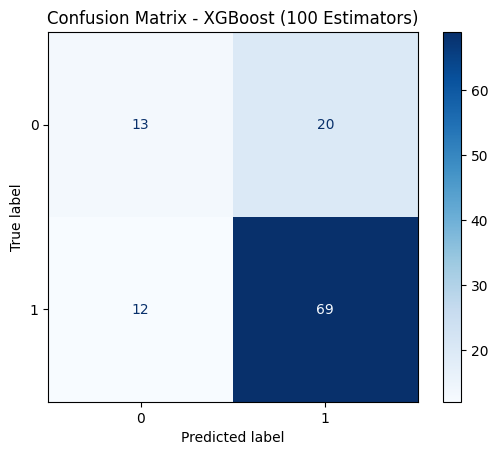

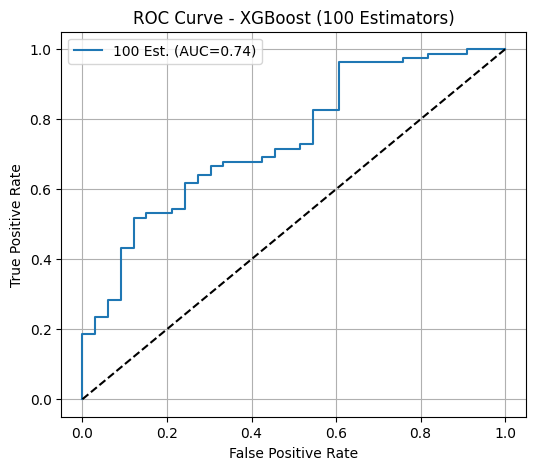


 Best XGBoost Model:
 Estimators: 50
 Recall: 0.9012
 Accuracy: 0.7632
 AUC: 0.7579


In [ ]:
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline  # imblearn pipeline is required
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

xgb_results = []

print("\n Evaluating XGBoost with Varying Estimators (Using SMOTE inside pipeline):\n")

for n_estimators in range(10, 110, 10):
    # Create imblearn pipeline with SMOTE
    xgb_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('xgb', XGBClassifier(
            n_estimators=n_estimators,
            eval_metric='logloss',  # XGBoost recommended metric
            scale_pos_weight=1,
            use_label_encoder=False,
            random_state=42
        ))
    ])

    # Train the pipeline directly
    xgb_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = xgb_pipeline.predict(X_val[numerical_features])
    y_val_proba = xgb_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    xgb_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': xgb_pipeline
    })

    # Output
    print(f"\n XGBoost with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - XGBoost ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - XGBoost ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best XGBoost model based on recall
best_xgb = max(xgb_results, key=lambda x: x['recall'])

print("\n Best XGBoost Model:")
print(f" Estimators: {best_xgb['n_estimators']}")
print(f" Recall: {best_xgb['recall']:.4f}")
print(f" Accuracy: {best_xgb['accuracy']:.4f}")
print(f" AUC: {best_xgb['auc']:.4f}")



 Evaluating Gradient Boosting with Varying Estimators (SMOTE applied inside pipeline):


 Gradient Boosting with 10 Estimators:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        33
           1       0.90      0.74      0.81        81

    accuracy                           0.75       114
   macro avg       0.72      0.76      0.73       114
weighted avg       0.80      0.75      0.76       114

 Recall (class 1): 0.7407
 Accuracy: 0.7544
 AUC: 0.7957


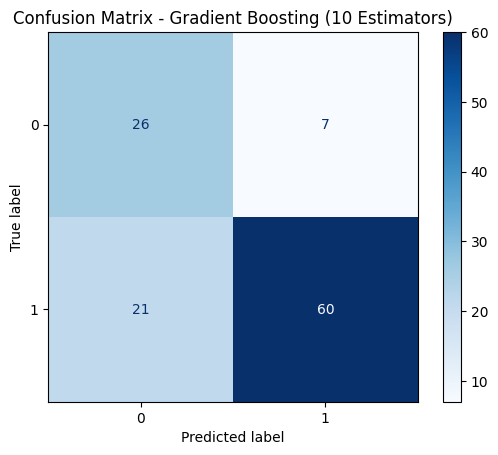

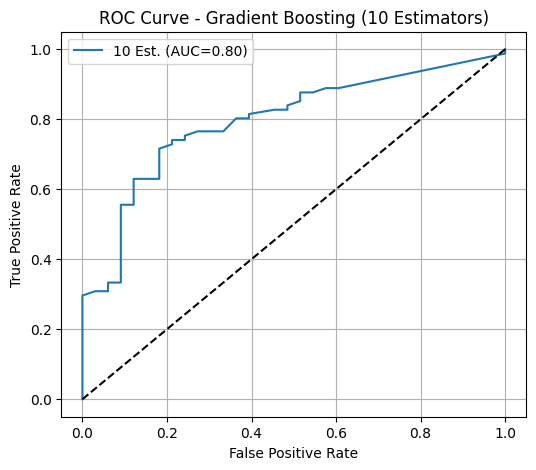


 Gradient Boosting with 20 Estimators:
              precision    recall  f1-score   support

           0       0.54      0.76      0.63        33
           1       0.88      0.74      0.81        81

    accuracy                           0.75       114
   macro avg       0.71      0.75      0.72       114
weighted avg       0.78      0.75      0.76       114

 Recall (class 1): 0.7407
 Accuracy: 0.7456
 AUC: 0.7845


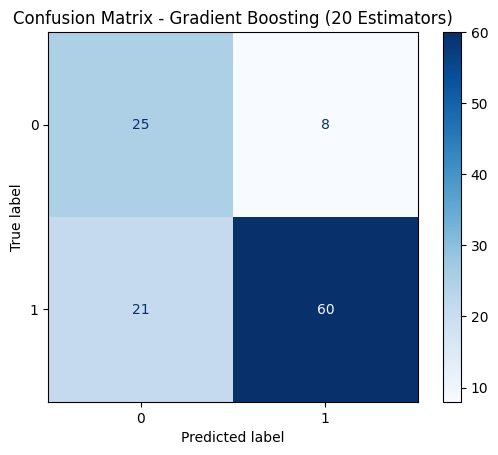

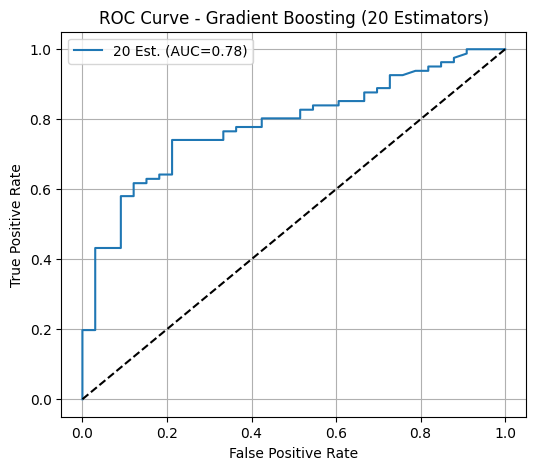


 Gradient Boosting with 30 Estimators:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        33
           1       0.86      0.78      0.82        81

    accuracy                           0.75       114
   macro avg       0.71      0.74      0.72       114
weighted avg       0.78      0.75      0.76       114

 Recall (class 1): 0.7778
 Accuracy: 0.7544
 AUC: 0.7912


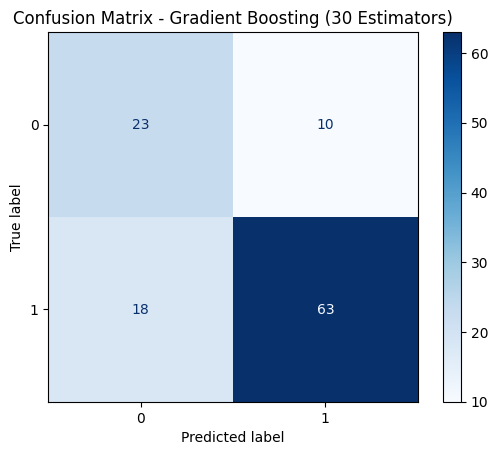

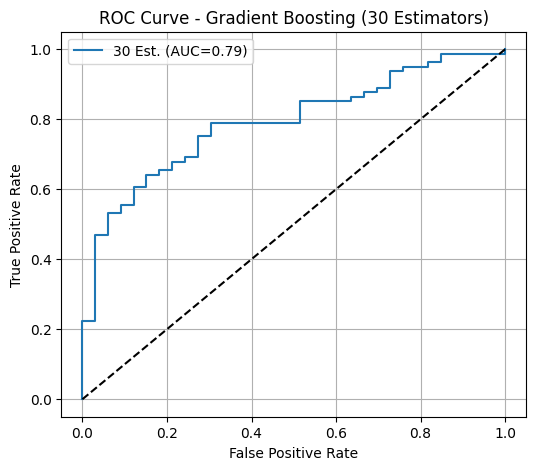


 Gradient Boosting with 40 Estimators:
              precision    recall  f1-score   support

           0       0.57      0.61      0.59        33
           1       0.84      0.81      0.82        81

    accuracy                           0.75       114
   macro avg       0.70      0.71      0.71       114
weighted avg       0.76      0.75      0.76       114

 Recall (class 1): 0.8148
 Accuracy: 0.7544
 AUC: 0.7969


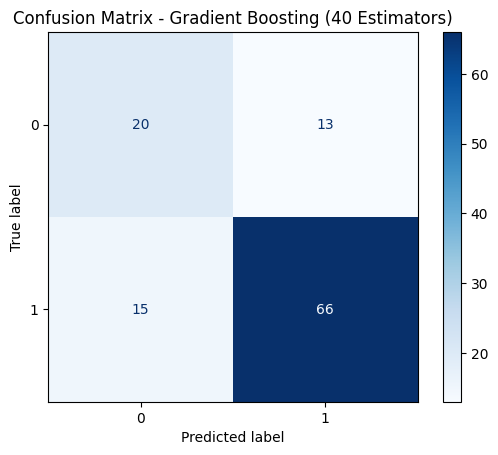

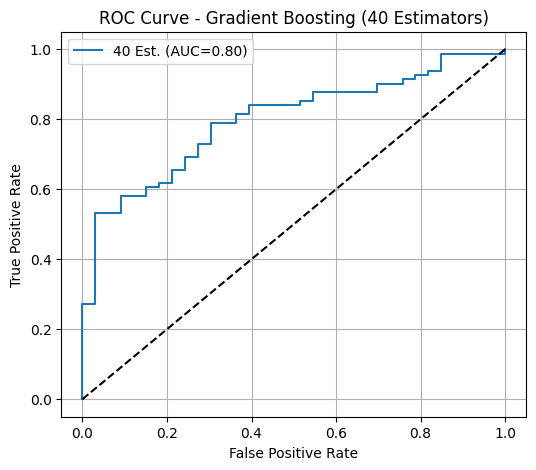


 Gradient Boosting with 50 Estimators:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        33
           1       0.82      0.85      0.84        81

    accuracy                           0.76       114
   macro avg       0.71      0.70      0.70       114
weighted avg       0.76      0.76      0.76       114

 Recall (class 1): 0.8519
 Accuracy: 0.7632
 AUC: 0.7939


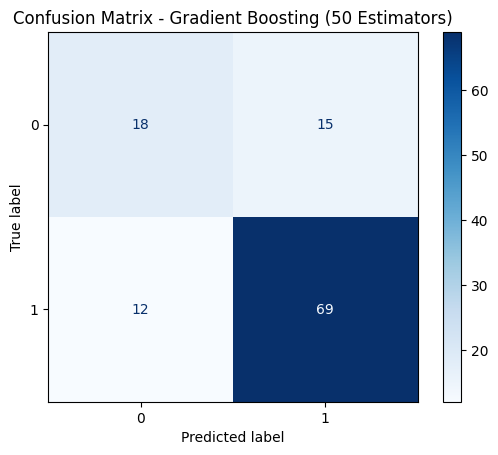

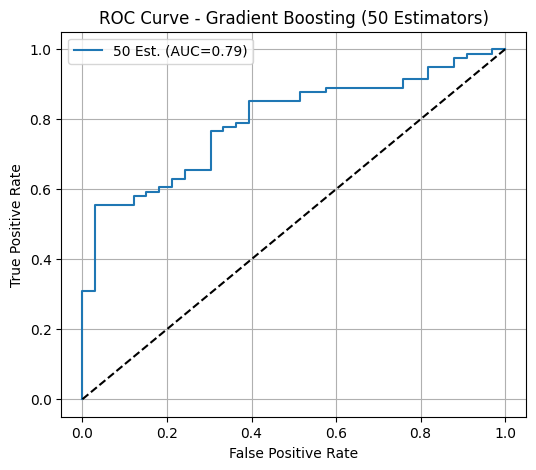


 Gradient Boosting with 60 Estimators:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        33
           1       0.81      0.85      0.83        81

    accuracy                           0.75       114
   macro avg       0.70      0.68      0.69       114
weighted avg       0.75      0.75      0.75       114

 Recall (class 1): 0.8519
 Accuracy: 0.7544
 AUC: 0.7875


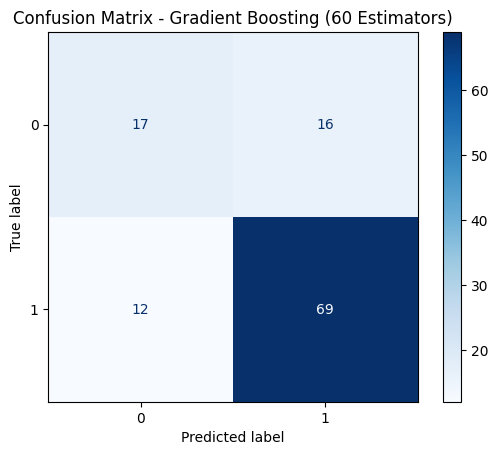

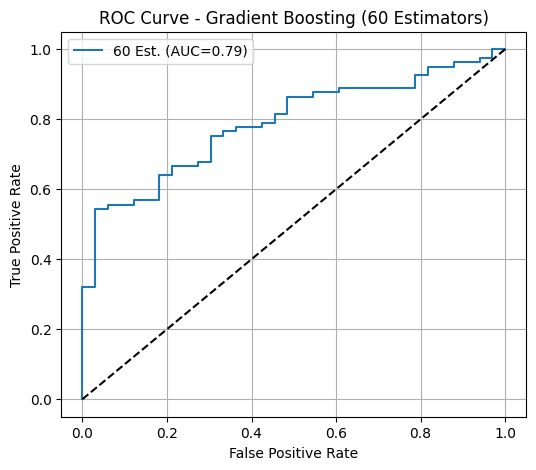


 Gradient Boosting with 70 Estimators:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52        33
           1       0.80      0.85      0.83        81

    accuracy                           0.75       114
   macro avg       0.69      0.67      0.68       114
weighted avg       0.74      0.75      0.74       114

 Recall (class 1): 0.8519
 Accuracy: 0.7456
 AUC: 0.7838


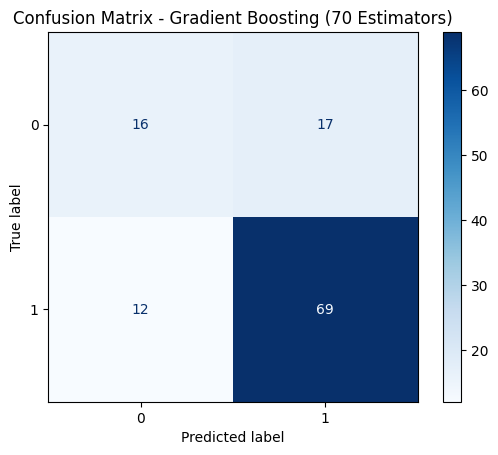

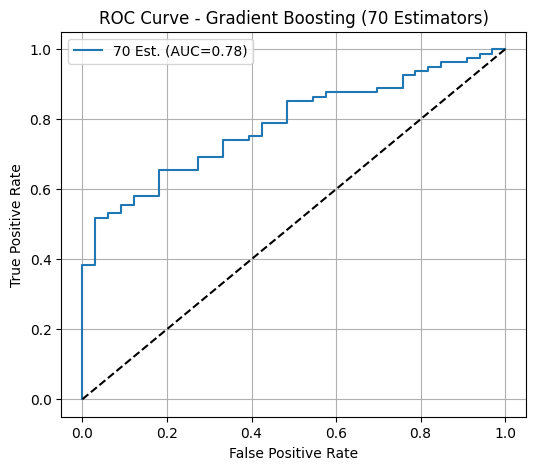


 Gradient Boosting with 80 Estimators:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49        33
           1       0.79      0.88      0.83        81

    accuracy                           0.75       114
   macro avg       0.69      0.65      0.66       114
weighted avg       0.73      0.75      0.73       114

 Recall (class 1): 0.8765
 Accuracy: 0.7456
 AUC: 0.7864


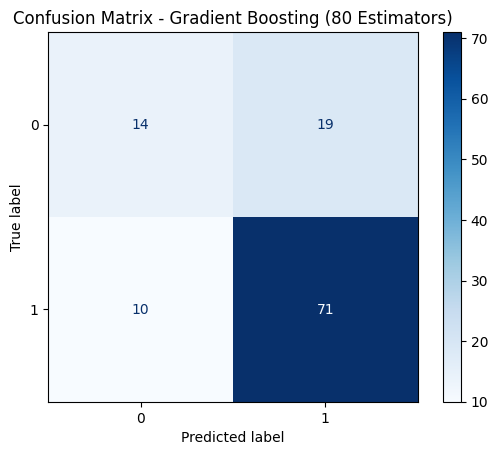

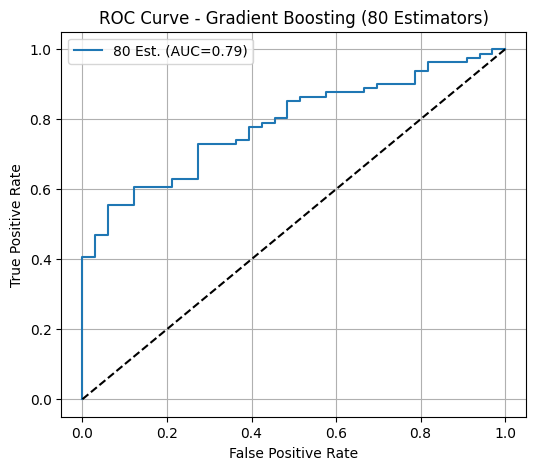


 Gradient Boosting with 90 Estimators:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49        33
           1       0.79      0.88      0.83        81

    accuracy                           0.75       114
   macro avg       0.69      0.65      0.66       114
weighted avg       0.73      0.75      0.73       114

 Recall (class 1): 0.8765
 Accuracy: 0.7456
 AUC: 0.7871


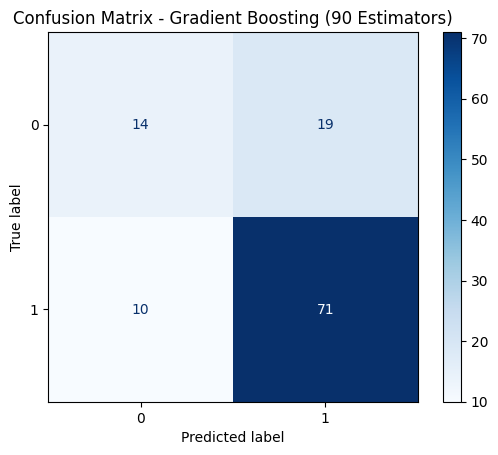

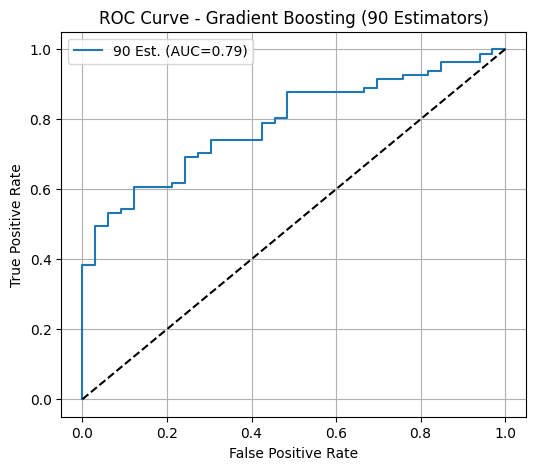


 Gradient Boosting with 100 Estimators:
              precision    recall  f1-score   support

           0       0.62      0.39      0.48        33
           1       0.78      0.90      0.84        81

    accuracy                           0.75       114
   macro avg       0.70      0.65      0.66       114
weighted avg       0.74      0.75      0.74       114

 Recall (class 1): 0.9012
 Accuracy: 0.7544
 AUC: 0.7819


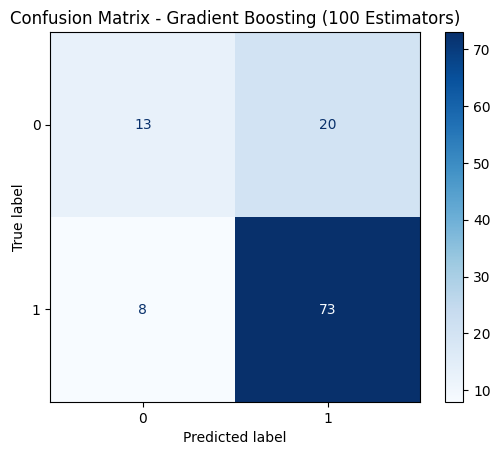

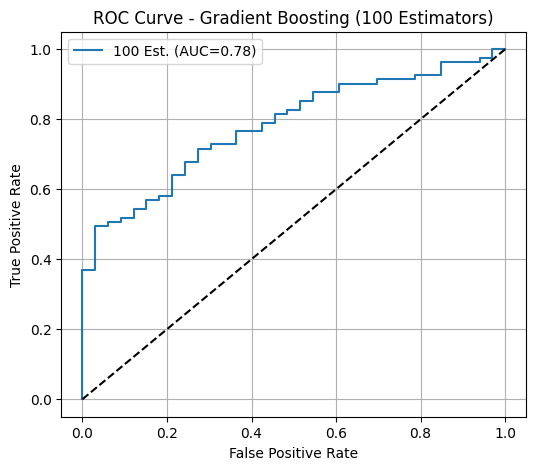


 Best Gradient Boosting Model:
 Estimators: 100
 Recall: 0.9012
 Accuracy: 0.7544
 AUC: 0.7819


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imbalanced-learn's pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

gb_results = []

print("\n Evaluating Gradient Boosting with Varying Estimators (SMOTE applied inside pipeline):\n")

for n_estimators in range(10, 110, 10):
    # Create pipeline with SMOTE
    gb_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),  # SMOTE inside pipeline
        ('gb', GradientBoostingClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Train
    gb_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = gb_pipeline.predict(X_val[numerical_features])
    y_val_proba = gb_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    gb_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': gb_pipeline
    })

    # Output
    print(f"\n Gradient Boosting with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Gradient Boosting ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - Gradient Boosting ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best Gradient Boosting model based on recall
best_gb = max(gb_results, key=lambda x: x['recall'])

print("\n Best Gradient Boosting Model:")
print(f" Estimators: {best_gb['n_estimators']}")
print(f" Recall: {best_gb['recall']:.4f}")
print(f" Accuracy: {best_gb['accuracy']:.4f}")
print(f" AUC: {best_gb['auc']:.4f}")


In [ ]:
# Final summarized results

model_summaries = [
    {
        'Model': 'Gradient Boosting',
        'Estimators': 100,
        'Accuracy': 0.7544,
        'Recall': 0.9012,
        'AUC': 0.7819
    },
    {
        'Model': 'XGBoost',
        'Estimators': 50,
        'Accuracy': 0.7632,
        'Recall': 0.9012,
        'AUC': 0.7579
    },
    {
        'Model': 'AdaBoost',
        'Estimators': 80,
        'Accuracy': 0.7632,
        'Recall': 0.7901,
        'AUC': 0.7793
    },
    {
        'Model': 'Random Forest',
        'Estimators': 30,
        'Accuracy': 0.7193,
        'Recall': 0.8272,
        'AUC': 0.7675
    },
    {
        'Model': 'Decision Tree',
        'Estimators': '-',
        'Accuracy': 0.6667,
        'Recall': 0.7284,
        'AUC': 0.6200
    },
    {
        'Model': 'KNN (Best: k=3)',
        'Estimators': 3,
        'Accuracy': 0.6491,
        'Recall': 0.6543,
        'AUC': 0.6764
    },
    {
        'Model': 'SVM (Poly Kernel)',
        'Estimators': '-',
        'Accuracy': 0.7018,
        'Recall': 0.6914,
        'AUC': 0.7900
    },
    {
        'Model': 'Logistic Regression',
        'Estimators': '-',
        'Accuracy': 0.7281,
        'Recall': 0.6667,
        'AUC': 0.8100
    }
]

# Displaying each model's result like your previous style
for model in model_summaries:
    print(f"\n {model['Model']} Model:")
    print(f" Estimators/Trees: {model['Estimators']}")
    print(f" Recall: {model['Recall']:.4f}")
    print(f" Accuracy: {model['Accuracy']:.4f}")
    print(f" AUC: {model['AUC']:.4f}")



 Gradient Boosting Model:
 Estimators/Trees: 100
 Recall: 0.9012
 Accuracy: 0.7544
 AUC: 0.7819

 XGBoost Model:
 Estimators/Trees: 50
 Recall: 0.9012
 Accuracy: 0.7632
 AUC: 0.7579

 AdaBoost Model:
 Estimators/Trees: 80
 Recall: 0.7901
 Accuracy: 0.7632
 AUC: 0.7793

 Random Forest Model:
 Estimators/Trees: 30
 Recall: 0.8272
 Accuracy: 0.7193
 AUC: 0.7675

 Decision Tree Model:
 Estimators/Trees: -
 Recall: 0.7284
 Accuracy: 0.6667
 AUC: 0.6200

 KNN (Best: k=3) Model:
 Estimators/Trees: 3
 Recall: 0.6543
 Accuracy: 0.6491
 AUC: 0.6764

 SVM (Poly Kernel) Model:
 Estimators/Trees: -
 Recall: 0.6914
 Accuracy: 0.7018
 AUC: 0.7900

 Logistic Regression Model:
 Estimators/Trees: -
 Recall: 0.6667
 Accuracy: 0.7281
 AUC: 0.8100


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Classification Report (Stacking Ensemble with SMOTETomek + Polynomial Features):
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        33
           1       0.77      0.85      0.81        81

    accuracy                           0.71       114
   macro avg       0.63      0.61      0.61       114
weighted avg       0.69      0.71      0.70       114

Accuracy: 0.7105
Recall: 0.8519
AUC: 0.7348


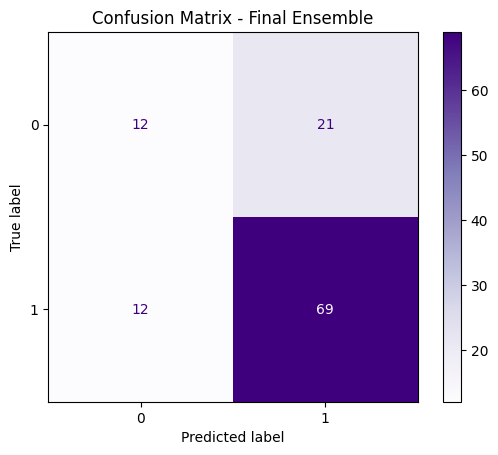

In [ ]:
# Imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import numpy as np

# Base Models (You can use your best tuned models if available)
rf_base = RandomForestClassifier(n_estimators=best_rf['n_trees'], class_weight='balanced', random_state=42)
xgb_base = XGBClassifier(
    n_estimators=best_xgb['n_estimators'],
    learning_rate=0.1,
    max_depth=7,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
gb_base = GradientBoostingClassifier(n_estimators=best_gb['n_estimators'], random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('xgb', xgb_base), ('rf', rf_base), ('gb', gb_base)],
    final_estimator=LogisticRegression(random_state=42),
    cv=5
)

# Full Pipeline
final_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),  # Feature Engineering
    ('scaler', StandardScaler()),
    ('resampler', SMOTETomek(random_state=42)),
    ('classifier', stacking_clf)
])

# Training the pipeline
final_pipeline.fit(X_train[numerical_features], y_train)

# Predictions
y_val_pred = final_pipeline.predict(X_val[numerical_features])
y_val_proba = final_pipeline.predict_proba(X_val[numerical_features])[:, 1]

# Metrics
accuracy = accuracy_score(y_val, y_val_pred)
recall = classification_report(y_val, y_val_pred, output_dict=True)['1']['recall']
auc = roc_auc_score(y_val, y_val_proba)

print("\nClassification Report (Stacking Ensemble with SMOTETomek + Polynomial Features):")
print(classification_report(y_val, y_val_pred, zero_division=0))
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix - Final Ensemble')
plt.grid(False)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

# Apply SMOTE outside the pipeline to save computation
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train[numerical_features], y_train)

# Build the preprocessing pipeline (imputation and scaling)
from sklearn.pipeline import Pipeline
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_resampled = preprocess_pipeline.fit_transform(X_resampled)
X_val_preprocessed = preprocess_pipeline.transform(X_val[numerical_features])

# Define the model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)

# Define smaller search space
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.05, 0.15)
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=10,         # Keep this small to speed up
    cv=2,              # Reduce CV folds to save time
    scoring='recall',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Train
random_search.fit(X_resampled, y_resampled)

print("Best Parameters:", random_search.best_params_)

# Evaluation
y_val_pred = random_search.predict(X_val_preprocessed)
y_val_proba = random_search.predict_proba(X_val_preprocessed)[:, 1]

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

accuracy = accuracy_score(y_val, y_val_pred)
recall = classification_report(y_val, y_val_pred, output_dict=True)['1']['recall']
auc = roc_auc_score(y_val, y_val_proba)

print("\nClassification Report (Tuned XGBoost):")
print(classification_report(y_val, y_val_pred, zero_division=0))
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC: {auc:.4f}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:02:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': np.float64(0.10618101782710437), 'max_depth': 7, 'n_estimators': 64}

Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        33
           1       0.76      0.88      0.81        81

    accuracy                           0.71       114
   macro avg       0.63      0.59      0.59       114
weighted avg       0.68      0.71      0.69       114

Accuracy: 0.7105
Recall: 0.8765
AUC: 0.7695


In [ ]:
# Required Libraries
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Optional: For class balancing without SMOTE
scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

# Preprocessing Pipeline
preprocess_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_preprocessed = preprocess_pipeline.fit_transform(X_train[numerical_features])
X_val_preprocessed = preprocess_pipeline.transform(X_val[numerical_features])

# ----------------------------
# Model 1: Gradient Boosting
# ----------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=100, random_state=42
)

gb_model.fit(X_train_preprocessed, y_train)

y_gb_pred = gb_model.predict(X_val_preprocessed)
y_gb_proba = gb_model.predict_proba(X_val_preprocessed)[:, 1]

gb_acc = accuracy_score(y_val, y_gb_pred)
gb_recall = classification_report(y_val, y_gb_pred, output_dict=True)['1']['recall']
gb_auc = roc_auc_score(y_val, y_gb_proba)

print("\nGradient Boosting Model:")
print(classification_report(y_val, y_gb_pred, zero_division=0))
print(f"Accuracy: {gb_acc:.4f}, Recall: {gb_recall:.4f}, AUC: {gb_auc:.4f}")

# ----------------------------
# Model 2: XGBoost with scale_pos_weight
# ----------------------------
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train_preprocessed, y_train)

y_xgb_pred = xgb_model.predict(X_val_preprocessed)
y_xgb_proba = xgb_model.predict_proba(X_val_preprocessed)[:, 1]

xgb_acc = accuracy_score(y_val, y_xgb_pred)
xgb_recall = classification_report(y_val, y_xgb_pred, output_dict=True)['1']['recall']
xgb_auc = roc_auc_score(y_val, y_xgb_proba)

print("\nXGBoost with scale_pos_weight:")
print(classification_report(y_val, y_xgb_pred, zero_division=0))
print(f"Accuracy: {xgb_acc:.4f}, Recall: {xgb_recall:.4f}, AUC: {xgb_auc:.4f}")

# ----------------------------
# Final Summary
# ----------------------------
print("\n📊 Model Comparison Summary 📊")
print(f"Gradient Boosting - Accuracy: {gb_acc:.4f}, Recall: {gb_recall:.4f}, AUC: {gb_auc:.4f}")
print(f"XGBoost (scale_pos_weight) - Accuracy: {xgb_acc:.4f}, Recall: {xgb_recall:.4f}, AUC: {xgb_auc:.4f}")




Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.60      0.18      0.28        33
           1       0.74      0.95      0.83        81

    accuracy                           0.73       114
   macro avg       0.67      0.57      0.56       114
weighted avg       0.70      0.73      0.67       114

Accuracy: 0.7281, Recall: 0.9506, AUC: 0.7501

XGBoost with scale_pos_weight:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52        33
           1       0.80      0.81      0.81        81

    accuracy                           0.73       114
   macro avg       0.67      0.66      0.67       114
weighted avg       0.73      0.73      0.73       114

Accuracy: 0.7281, Recall: 0.8148, AUC: 0.7561

📊 Model Comparison Summary 📊
Gradient Boosting - Accuracy: 0.7281, Recall: 0.9506, AUC: 0.7501
XGBoost (scale_pos_weight) - Accuracy: 0.7281, Recall: 0.8148, AUC: 0.7561


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
